---
# <font color="blue">1. Introduction</font>

In this project, we will focus on recommender systems and fairness. To achieve this, we will use the **MovieLens 1M dataset**, which contains data on user ratings, movie genres, and other relevant features. Our work will be divided into two main parts.

The first part will involve the development of various recommender systems, where we will explore different approaches such as collaborative filtering and content-based filtering. We will examine the advantages and disadvantages of each approach, analyzing their effectiveness in generating accurate and personalized recommendations.

The second part of the project will focus on applying our knowledge of fairness to evaluate the systems we have developed. We will investigate whether these recommendation algorithms exhibit any biases or disparities across different user groups, considering attributes such as gender, age, or other sensitive factors. By doing so, we aim to understand how fairness can be integrated into recommender systems to ensure equal and unbiased recommendations for all users.

___


In [ ]:
!pip3 install scikit-learn



Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


#  <font color="blue">2. Dataset description & Analysis</font>

The **MovieLens 1M dataset** consists of several files that provide information on user ratings, movie details, and user demographics. These files are structured as follows:

- **ratings.dat**: Contains the ratings given by users to movies. Each row includes:
  - `userId`: Unique identifier for the user.
  - `movieId`: Unique identifier for the movie.
  - `rating`: Rating given to the movie (from 0.5 to 5.0 stars).
  - `timestamp`: The timestamp of when the rating was made.

- **movies.dat**: Contains information about the movies. Each row includes:
  - `movieId`: Unique identifier for the movie.
  - `title`: Title of the movie.
  - `genres`: List of genres associated with the movie (e.g., Action, Drama, Comedy).

- **users.dat**: Contains demographic information about the users. Each row includes:
  - `userId`: Unique identifier for the user.
  - `gender`: Gender of the user (M or F).
  - `age`: Age range of the user.
  - `occupation`: Occupation of the user.
  - `zip-code`: Postal code of the user (not used in the analysis).

These files will be used to create and evaluate the recommendation systems, as well as to analyze fairness across different user groups.

/tmp/ipykernel_656077/4004359974.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=metric, y='Model', data=df, palette=palette, edgecolor='black')
/tmp/ipykernel_656077/4004359974.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_yticklabels([''] * len(df))


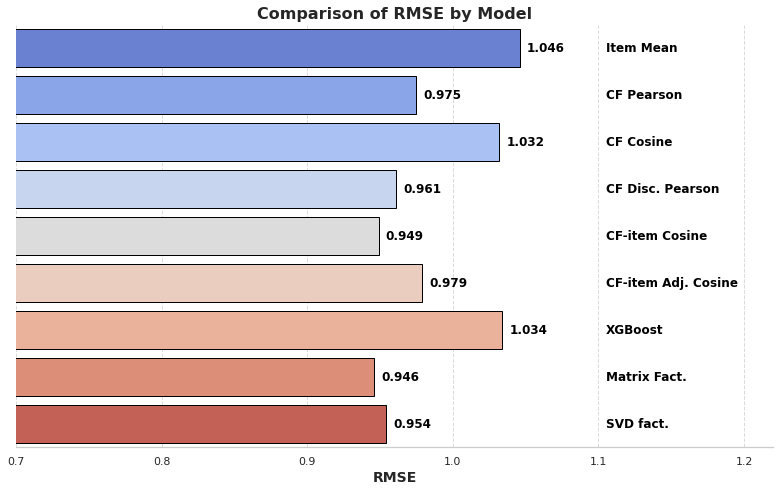

/tmp/ipykernel_656077/4004359974.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=metric, y='Model', data=df, palette=palette, edgecolor='black')
/tmp/ipykernel_656077/4004359974.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_yticklabels([''] * len(df))


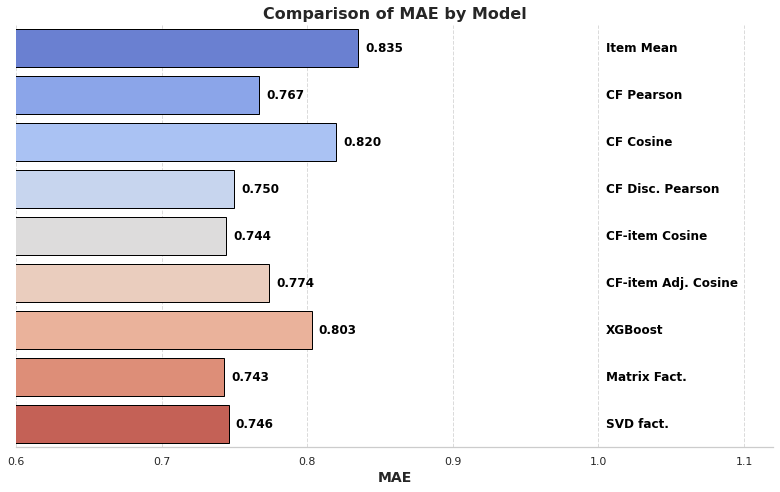

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos
data = {
    'Model': ['Item Mean', 'CF Pearson', 'CF Cosine', 'CF Disc. Pearson',
              'CF-item Cosine', 'CF-item Adj. Cosine', 'XGBoost', 'Matrix Fact.', 'SVD fact.'],
    'RMSE': [1.046, 0.975, 1.032, 0.961, 0.949, 0.979, 1.034, 0.946, 0.954],
    'MAE':  [0.835, 0.767, 0.820, 0.750, 0.744, 0.774, 0.803, 0.743, 0.746]
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(df))

def plot_bars(metric, title, xlim):
    plt.figure(figsize=(11, 7))
    barplot = sns.barplot(x=metric, y='Model', data=df, palette=palette, edgecolor='black')
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(metric, fontsize=14, weight='bold')
    plt.ylabel('')
    plt.xlim(xlim)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Remover etiquetas de eje y para evitar duplicado (los nombres los pondremos manualmente)
    barplot.set_yticklabels([''] * len(df))

    # Agregar valores y nombres de los modelos a la derecha de cada barra
    for i, (value, name) in enumerate(zip(df[metric], df['Model'])):
        barplot.text(value + 0.005, i, f'{value:.3f}', color='black', va='center', fontsize=12, weight='bold')
        barplot.text(xlim[1] + 0.005, i, name, color='black', va='center', fontsize=12, weight='bold')

    # Ajustar límites para dar espacio a los nombres
    plt.xlim(xlim[0], xlim[1] + 0.12)

    sns.despine(left=True, bottom=False)
    plt.tight_layout()
    plt.show()

plot_bars('RMSE', 'Comparison of RMSE by Model', (0.7, 1.1))
plot_bars('MAE', 'Comparison of MAE by Model', (0.6, 1))






/tmp/ipykernel_656077/2338503830.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Training Time (s)', y='Model', data=df, palette=palette, edgecolor='black')
/tmp/ipykernel_656077/2338503830.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_yticklabels([''] * len(df))


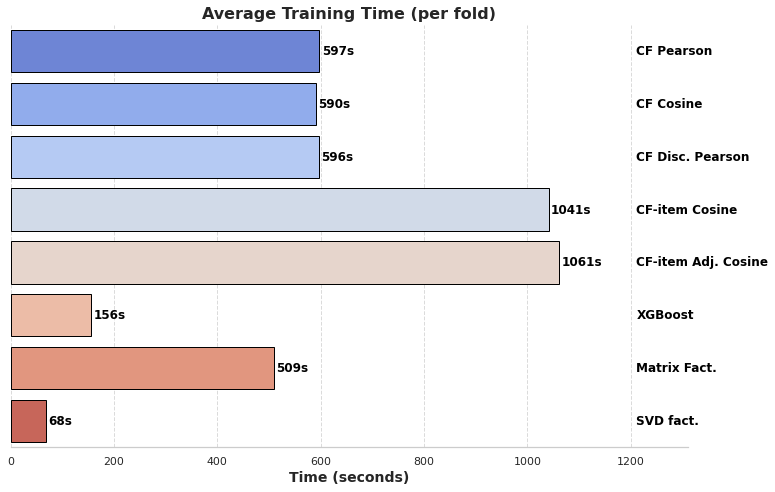

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos de tiempo en segundos
data = {
    'Model': ['CF Pearson', 'CF Cosine', 'CF Disc. Pearson', 
              'CF-item Cosine', 'CF-item Adj. Cosine', 
              'XGBoost', 'Matrix Fact.', 'SVD fact.'],
    'Training Time (s)': [597, 590, 596, 1041, 1061, 156, 509, 68]
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(df))

# Crear gráfico
plt.figure(figsize=(11, 7))
barplot = sns.barplot(x='Training Time (s)', y='Model', data=df, palette=palette, edgecolor='black')
plt.title('Average Training Time (per fold)', fontsize=16, weight='bold')
plt.xlabel('Time (seconds)', fontsize=14, weight='bold')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Quitar etiquetas automáticas del eje Y
barplot.set_yticklabels([''] * len(df))

# Añadir valores y nombres manualmente a la derecha
for i, (value, name) in enumerate(zip(df['Training Time (s)'], df['Model'])):
    barplot.text(value + 5, i, f'{value}s', color='black', va='center', fontsize=12, weight='bold')
    barplot.text(max(df['Training Time (s)']) + 150, i, name, color='black', va='center', fontsize=12, weight='bold')

# Expandir eje X para espacio extra
plt.xlim(0, max(df['Training Time (s)']) + 250)

sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()


/tmp/ipykernel_656077/1546765349.py:79: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


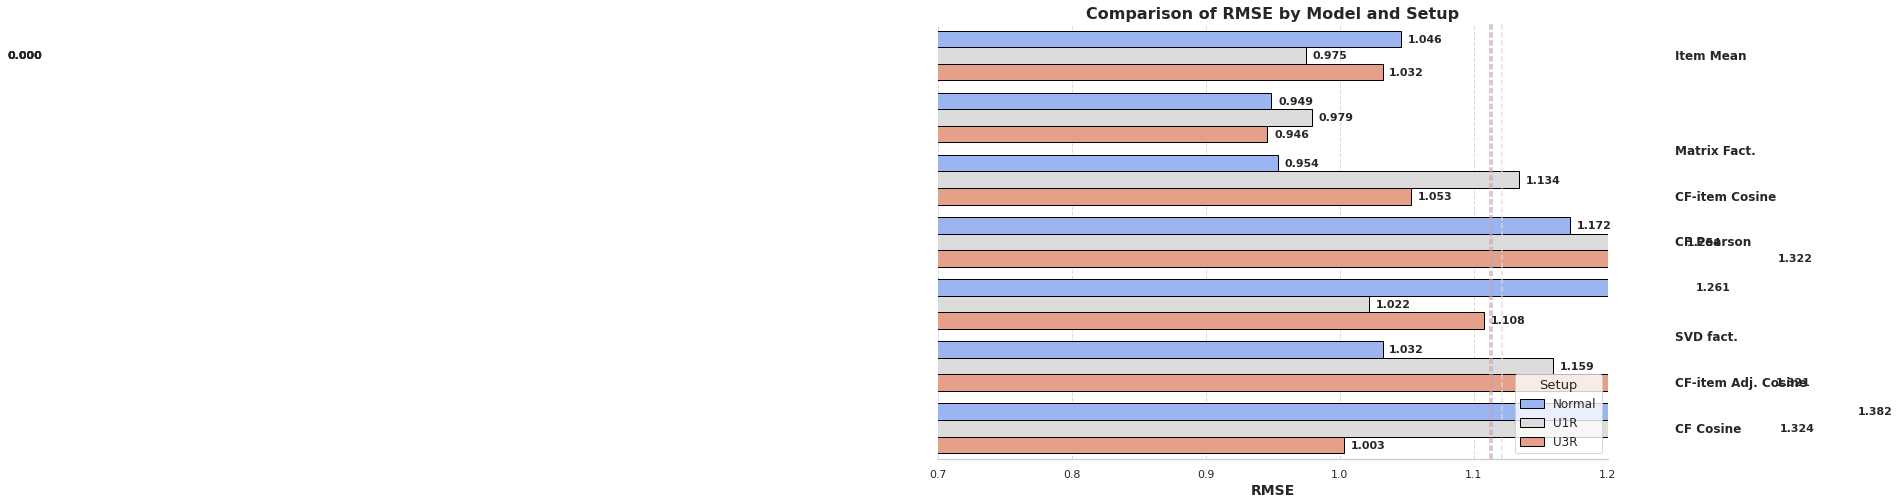

/tmp/ipykernel_656077/1546765349.py:79: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


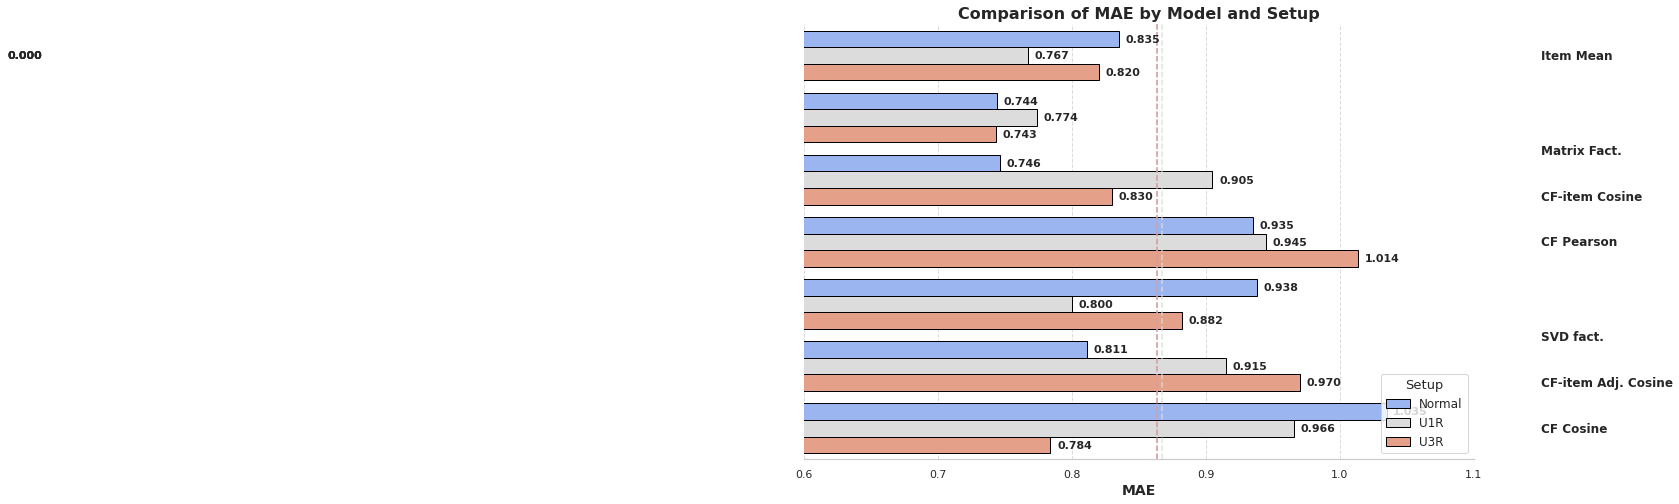

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Datos para cada setup
models = ['Item Mean', 'CF Pearson', 'CF Cosine', 'CF-item Cosine', 'CF-item Adj. Cosine', 'Matrix Fact.', 'SVD fact.']

rmse_normal = [1.046, 0.975, 1.032, 0.949, 0.979, 0.946, 0.954]
rmse_u1r = [1.134, 1.053, 1.172, 1.254, 1.322, 1.261, 1.022]
rmse_u3r = [1.108, 1.032, 1.159, 1.321, 1.382, 1.324, 1.003]

mae_normal = [0.835, 0.767, 0.820, 0.744, 0.774, 0.743, 0.746]
mae_u1r = [0.905, 0.830, 0.935, 0.945, 1.014, 0.938, 0.800]
mae_u3r = [0.882, 0.811, 0.915, 0.970, 1.035, 0.966, 0.784]

# Crear DataFrame en formato largo para seaborn
df_rmse = pd.DataFrame({
    'Model': np.repeat(models, 3),
    'Setup': ['Normal', 'U1R', 'U3R'] * len(models),
    'RMSE': rmse_normal + rmse_u1r + rmse_u3r
})

df_mae = pd.DataFrame({
    'Model': np.repeat(models, 3),
    'Setup': ['Normal', 'U1R', 'U3R'] * len(models),
    'MAE': mae_normal + mae_u1r + mae_u3r
})

sns.set(style="whitegrid")

def plot_bars(df, metric, title, xlim):
    plt.figure(figsize=(12, 8))
    palette = sns.color_palette("coolwarm", 3)
    barplot = sns.barplot(x=metric, y='Model', hue='Setup', data=df, palette=palette, edgecolor='black')

    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(metric, fontsize=14, weight='bold')
    plt.ylabel('')

    plt.xlim(xlim)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Añadir líneas verticales discontinuas para benchmarks de cada setup
    for i, setup in enumerate(['Normal', 'U1R', 'U3R']):
        benchmark = np.mean(df[df['Setup'] == setup][metric])
        plt.axvline(x=benchmark, color=palette[i], linestyle='--', linewidth=1.5, alpha=0.8)

    # Ocultar etiquetas y ticks del eje y (modelos)
    barplot.set_yticklabels([])
    barplot.set_yticks([])

    # Agregar valores al final de cada barra
    for p in barplot.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        barplot.text(width + 0.005, y, f'{width:.3f}', ha='left', va='center', fontsize=11, weight='bold')

    # Añadir nombres de los modelos a la derecha, centrados en el grupo de 3 barras por modelo
    # Se asume que las barras están en orden modelo por modelo (3 barras cada modelo)
    # La altura total de cada barra es aproximadamente 1/total_bars
    total_models = len(models)
    for i, model in enumerate(models):
        # Y posición para centrar nombre en grupo de barras
        # Hay 3 barras por modelo, el alto total es dividido en len(df) barras.
        # Podemos usar el promedio de las posiciones de las 3 barras para el modelo i.
        y_pos = (i * 3 + 1.5) / (3 * total_models) * barplot.get_ylim()[1]
        # O usar las coordenadas de los patches:
        # Mejor usar el y del primer patch del modelo + 1.5 veces height del patch:
        first_patch_idx = i * 3
        y_pos = barplot.patches[first_patch_idx].get_y() + 1.5 * barplot.patches[first_patch_idx].get_height()

        # X posición para texto a la derecha
        x_pos = xlim[1] + 0.05
        plt.text(x_pos, y_pos, model, ha='left', va='center', fontsize=12, weight='bold')

    plt.legend(title='Setup', fontsize=12, title_fontsize=13, loc='lower right')
    sns.despine(left=True, bottom=False)
    plt.tight_layout()
    plt.show()

plot_bars(df_rmse, 'RMSE', 'Comparison of RMSE by Model and Setup', (0.7, 1.2))
plot_bars(df_mae, 'MAE', 'Comparison of MAE by Model and Setup', (0.6, 1.1))




/tmp/ipykernel_656077/2936891417.py:72: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


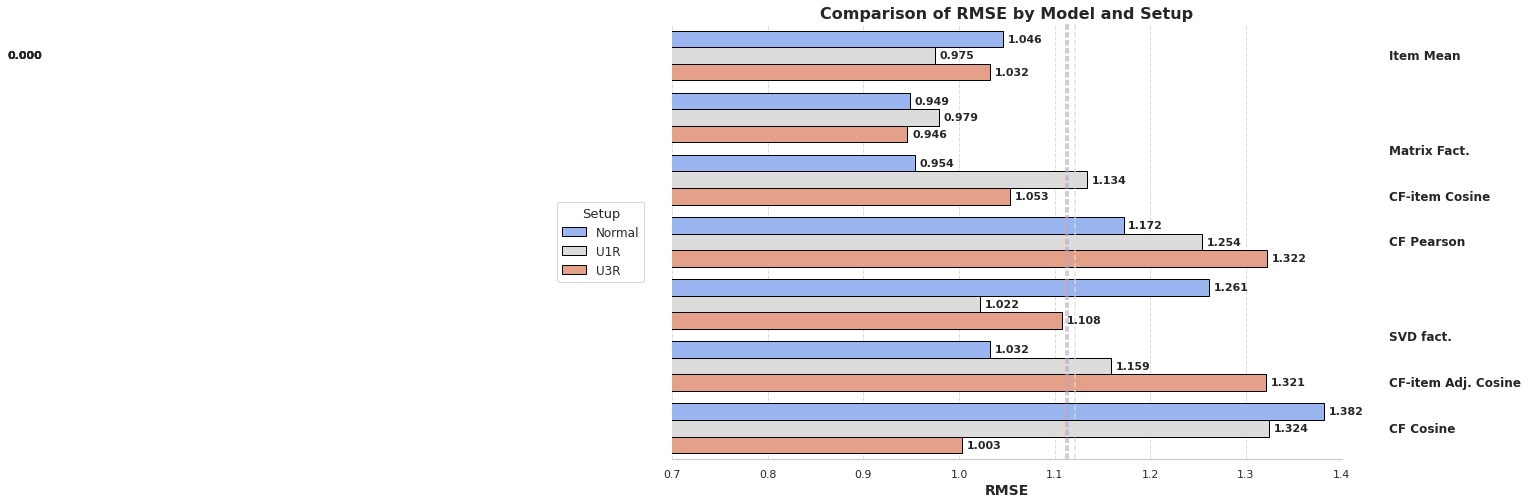

/tmp/ipykernel_656077/2936891417.py:72: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


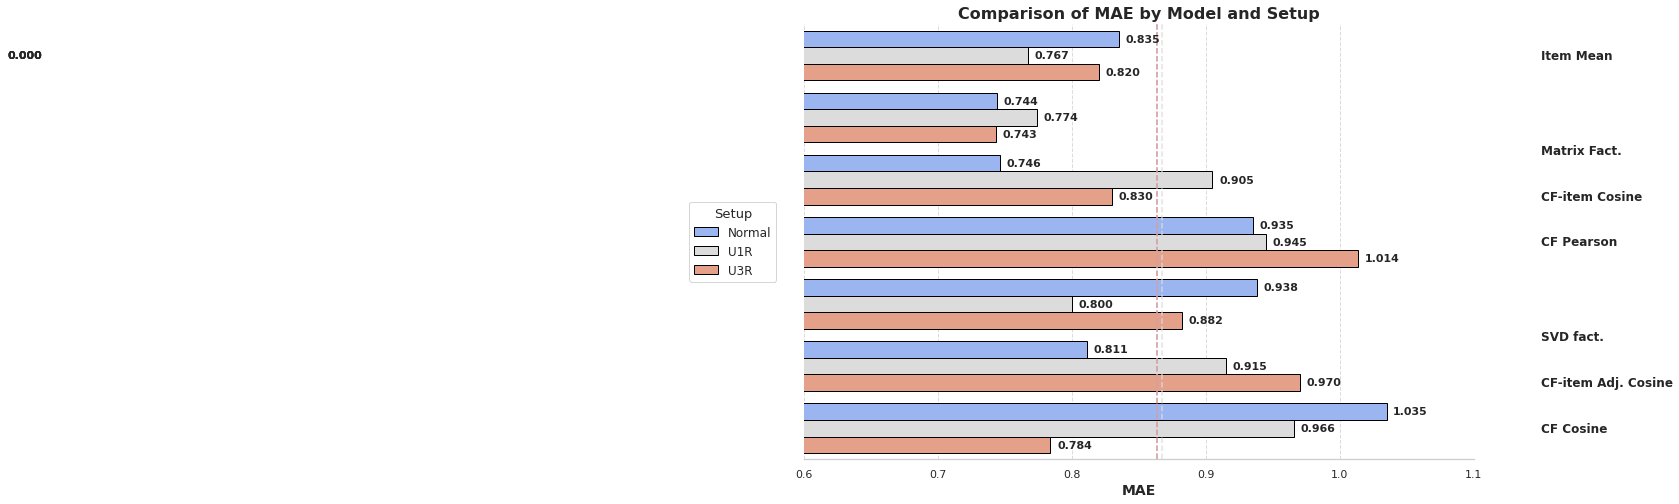

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Datos para cada setup
models = ['Item Mean', 'CF Pearson', 'CF Cosine', 'CF-item Cosine', 'CF-item Adj. Cosine', 'Matrix Fact.', 'SVD fact.']

rmse_normal = [1.046, 0.975, 1.032, 0.949, 0.979, 0.946, 0.954]
rmse_u1r = [1.134, 1.053, 1.172, 1.254, 1.322, 1.261, 1.022]
rmse_u3r = [1.108, 1.032, 1.159, 1.321, 1.382, 1.324, 1.003]

mae_normal = [0.835, 0.767, 0.820, 0.744, 0.774, 0.743, 0.746]
mae_u1r = [0.905, 0.830, 0.935, 0.945, 1.014, 0.938, 0.800]
mae_u3r = [0.882, 0.811, 0.915, 0.970, 1.035, 0.966, 0.784]

# Crear DataFrame en formato largo para seaborn
df_rmse = pd.DataFrame({
    'Model': np.repeat(models, 3),
    'Setup': ['Normal', 'U1R', 'U3R'] * len(models),
    'RMSE': rmse_normal + rmse_u1r + rmse_u3r
})

df_mae = pd.DataFrame({
    'Model': np.repeat(models, 3),
    'Setup': ['Normal', 'U1R', 'U3R'] * len(models),
    'MAE': mae_normal + mae_u1r + mae_u3r
})

sns.set(style="whitegrid")

def plot_bars(df, metric, title, xlim):
    plt.figure(figsize=(12, 8))
    palette = sns.color_palette("coolwarm", 3)
    barplot = sns.barplot(x=metric, y='Model', hue='Setup', data=df, palette=palette, edgecolor='black')

    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(metric, fontsize=14, weight='bold')
    plt.ylabel('')

    plt.xlim(xlim)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Añadir líneas verticales discontinuas para benchmarks de cada setup
    for i, setup in enumerate(['Normal', 'U1R', 'U3R']):
        benchmark = np.mean(df[df['Setup'] == setup][metric])
        plt.axvline(x=benchmark, color=palette[i], linestyle='--', linewidth=1.5, alpha=0.8)

    # Ocultar etiquetas y ticks del eje y (modelos)
    barplot.set_yticklabels([])
    barplot.set_yticks([])

    # Agregar valores al final de cada barra
    for p in barplot.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        barplot.text(width + 0.005, y, f'{width:.3f}', ha='left', va='center', fontsize=11, weight='bold')

    # Añadir nombres de los modelos a la derecha, centrados en el grupo de 3 barras por modelo
    total_models = len(models)
    for i, model in enumerate(models):
        first_patch_idx = i * 3
        y_pos = barplot.patches[first_patch_idx].get_y() + 1.5 * barplot.patches[first_patch_idx].get_height()
        x_pos = xlim[1] + 0.05
        plt.text(x_pos, y_pos, model, ha='left', va='center', fontsize=12, weight='bold')

    # Leyenda a la izquierda fuera del gráfico
    plt.legend(title='Setup', fontsize=12, title_fontsize=13,
               loc='center left', bbox_to_anchor=(-0.18, 0.5))

    sns.despine(left=True, bottom=False)
    plt.tight_layout()
    plt.show()

plot_bars(df_rmse, 'RMSE', 'Comparison of RMSE by Model and Setup', (0.7, 1.4))
plot_bars(df_mae, 'MAE', 'Comparison of MAE by Model and Setup', (0.6, 1.1))


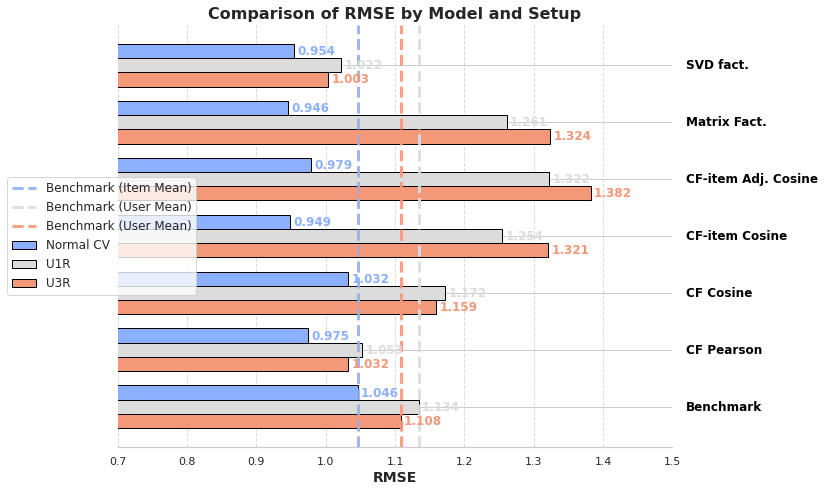

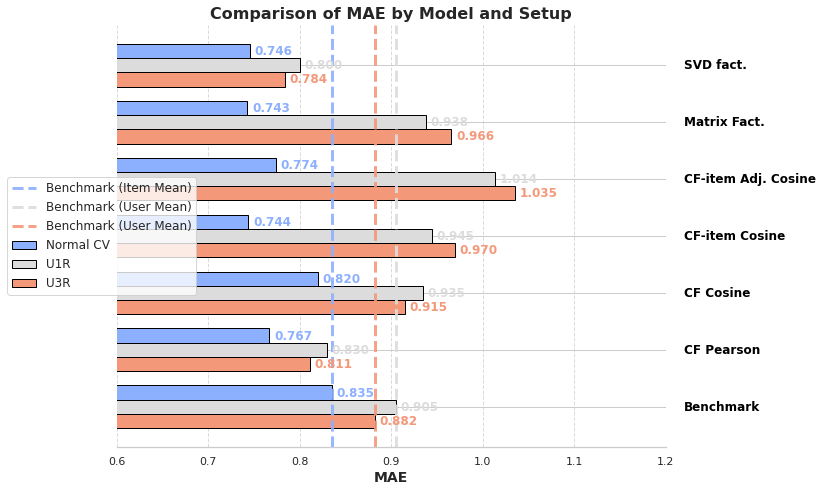

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos con Benchmark primero y renombrado
data = {
    'Model': ['Benchmark', 'CF Pearson', 'CF Cosine', 
              'CF-item Cosine', 'CF-item Adj. Cosine', 'Matrix Fact.', 'SVD fact.'],
    'Normal RMSE': [1.046, 0.975, 1.032, 0.949, 0.979, 0.946, 0.954],
    'U1R RMSE':    [1.134, 1.053, 1.172, 1.254, 1.322, 1.261, 1.022],
    'U3R RMSE':    [1.108, 1.032, 1.159, 1.321, 1.382, 1.324, 1.003],
    'Normal MAE':  [0.835, 0.767, 0.820, 0.744, 0.774, 0.743, 0.746],
    'U1R MAE':     [0.905, 0.830, 0.935, 0.945, 1.014, 0.938, 0.800],
    'U3R MAE':     [0.882, 0.811, 0.915, 0.970, 1.035, 0.966, 0.784]
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 3)
colors = palette.as_hex()
labels = ['Normal CV', 'U1R', 'U3R']

# Benchmarks del modelo Benchmark
benchmark_normal_rmse = df.loc[df['Model'] == 'Benchmark', 'Normal RMSE'].values[0]
benchmark_u1r_rmse = df.loc[df['Model'] == 'Benchmark', 'U1R RMSE'].values[0]
benchmark_u3r_rmse = df.loc[df['Model'] == 'Benchmark', 'U3R RMSE'].values[0]
benchmark_normal_mae = df.loc[df['Model'] == 'Benchmark', 'Normal MAE'].values[0]
benchmark_u1r_mae = df.loc[df['Model'] == 'Benchmark', 'U1R MAE'].values[0]
benchmark_u3r_mae = df.loc[df['Model'] == 'Benchmark', 'U3R MAE'].values[0]

def plot_metric(metric_normal, metric_u1r, metric_u3r, metric_name, xlim):
    plt.figure(figsize=(12, 7))
    width = 0.25
    indices = range(len(df))

    plt.barh([i + width for i in indices], df[metric_normal], height=width, color=colors[0], edgecolor='black', label=labels[0])
    plt.barh(indices, df[metric_u1r], height=width, color=colors[1], edgecolor='black', label=labels[1])
    plt.barh([i - width for i in indices], df[metric_u3r], height=width, color=colors[2], edgecolor='black', label=labels[2])

    # Líneas verticales para benchmarks con etiquetas específicas
    if 'RMSE' in metric_name:
        plt.axvline(x=benchmark_normal_rmse, color=colors[0], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (Item Mean)')
        plt.axvline(x=benchmark_u1r_rmse, color=colors[1], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (User Mean)')
        plt.axvline(x=benchmark_u3r_rmse, color=colors[2], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (User Mean)')
    else:
        plt.axvline(x=benchmark_normal_mae, color=colors[0], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (Item Mean)')
        plt.axvline(x=benchmark_u1r_mae, color=colors[1], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (User Mean)')
        plt.axvline(x=benchmark_u3r_mae, color=colors[2], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (User Mean)')

    plt.yticks(indices, [''] * len(df))
    plt.xlabel(metric_name, fontsize=14, weight='bold')
    plt.title(f'Comparison of {metric_name} by Model and Setup', fontsize=16, weight='bold')
    plt.xlim(xlim)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Nombres y valores más destacados
    for i, model in enumerate(df['Model']):
        plt.text(df[metric_normal][i] + 0.005, i + width, f"{df[metric_normal][i]:.3f}", 
                 va='center', fontsize=12, weight='bold', color=colors[0])
        plt.text(df[metric_u1r][i] + 0.005, i, f"{df[metric_u1r][i]:.3f}", 
                 va='center', fontsize=12, weight='bold', color=colors[1])
        plt.text(df[metric_u3r][i] + 0.005, i - width, f"{df[metric_u3r][i]:.3f}", 
                 va='center', fontsize=12, weight='bold', color=colors[2])
        plt.text(xlim[1] + 0.02, i, model, va='center', fontsize=12, weight='bold', color='black')

    # Leyenda izquierda sin solape
    plt.legend(loc='center left', bbox_to_anchor=(-0.21, 0.5), fontsize=12)

    sns.despine(left=True, bottom=False)
    plt.tight_layout()
    plt.show()

# Gráficos finales
plot_metric('Normal RMSE', 'U1R RMSE', 'U3R RMSE', 'RMSE', (0.7, 1.5))
plot_metric('Normal MAE', 'U1R MAE', 'U3R MAE', 'MAE', (0.6, 1.2))


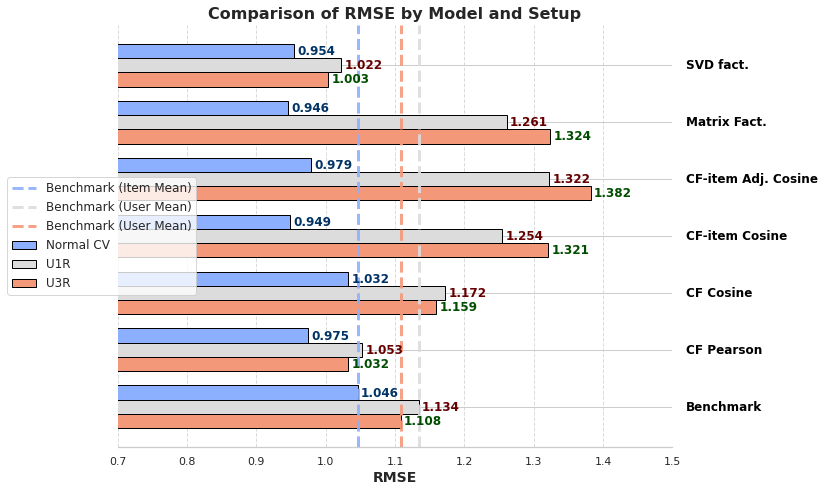

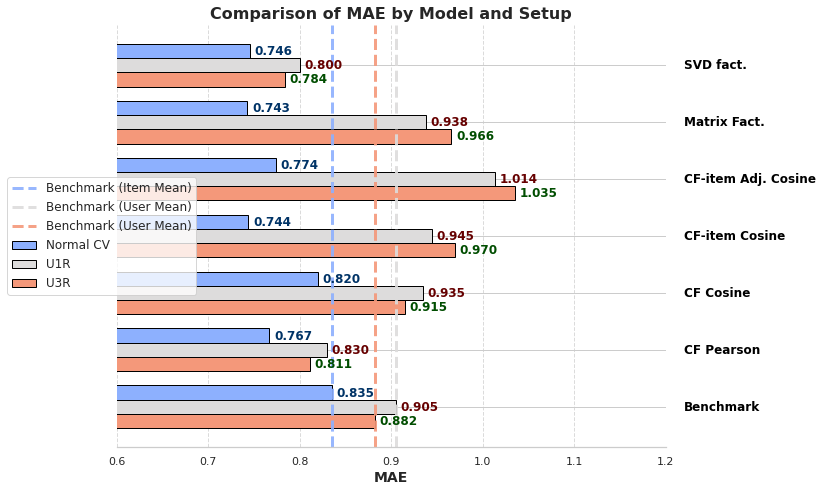

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos con Benchmark primero y renombrado
data = {
    'Model': ['Benchmark', 'CF Pearson', 'CF Cosine', 
              'CF-item Cosine', 'CF-item Adj. Cosine', 'Matrix Fact.', 'SVD fact.'],
    'Normal RMSE': [1.046, 0.975, 1.032, 0.949, 0.979, 0.946, 0.954],
    'U1R RMSE':    [1.134, 1.053, 1.172, 1.254, 1.322, 1.261, 1.022],
    'U3R RMSE':    [1.108, 1.032, 1.159, 1.321, 1.382, 1.324, 1.003],
    'Normal MAE':  [0.835, 0.767, 0.820, 0.744, 0.774, 0.743, 0.746],
    'U1R MAE':     [0.905, 0.830, 0.935, 0.945, 1.014, 0.938, 0.800],
    'U3R MAE':     [0.882, 0.811, 0.915, 0.970, 1.035, 0.966, 0.784]
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 3)
colors = palette.as_hex()
labels = ['Normal CV', 'U1R', 'U3R']
text_colors = ['#003366', '#660000', '#004d00']  # Colores intensos para texto

# Benchmarks del modelo Benchmark
benchmark_normal_rmse = df.loc[df['Model'] == 'Benchmark', 'Normal RMSE'].values[0]
benchmark_u1r_rmse = df.loc[df['Model'] == 'Benchmark', 'U1R RMSE'].values[0]
benchmark_u3r_rmse = df.loc[df['Model'] == 'Benchmark', 'U3R RMSE'].values[0]
benchmark_normal_mae = df.loc[df['Model'] == 'Benchmark', 'Normal MAE'].values[0]
benchmark_u1r_mae = df.loc[df['Model'] == 'Benchmark', 'U1R MAE'].values[0]
benchmark_u3r_mae = df.loc[df['Model'] == 'Benchmark', 'U3R MAE'].values[0]

def plot_metric(metric_normal, metric_u1r, metric_u3r, metric_name, xlim):
    plt.figure(figsize=(12, 7))
    width = 0.25
    indices = range(len(df))

    plt.barh([i + width for i in indices], df[metric_normal], height=width, color=colors[0], edgecolor='black', label=labels[0])
    plt.barh(indices, df[metric_u1r], height=width, color=colors[1], edgecolor='black', label=labels[1])
    plt.barh([i - width for i in indices], df[metric_u3r], height=width, color=colors[2], edgecolor='black', label=labels[2])

    # Líneas verticales para benchmarks con etiquetas específicas
    if 'RMSE' in metric_name:
        plt.axvline(x=benchmark_normal_rmse, color=colors[0], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (Item Mean)')
        plt.axvline(x=benchmark_u1r_rmse, color=colors[1], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (User Mean)')
        plt.axvline(x=benchmark_u3r_rmse, color=colors[2], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (User Mean)')
    else:
        plt.axvline(x=benchmark_normal_mae, color=colors[0], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (Item Mean)')
        plt.axvline(x=benchmark_u1r_mae, color=colors[1], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (User Mean)')
        plt.axvline(x=benchmark_u3r_mae, color=colors[2], linestyle='--', linewidth=3, alpha=0.9, label='Benchmark (User Mean)')

    plt.yticks(indices, [''] * len(df))
    plt.xlabel(metric_name, fontsize=14, weight='bold')
    plt.title(f'Comparison of {metric_name} by Model and Setup', fontsize=16, weight='bold')
    plt.xlim(xlim)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Nombres y valores con colores fuertes
    for i, model in enumerate(df['Model']):
        plt.text(df[metric_normal][i] + 0.005, i + width, f"{df[metric_normal][i]:.3f}", 
                 va='center', fontsize=12, weight='bold', color=text_colors[0])
        plt.text(df[metric_u1r][i] + 0.005, i, f"{df[metric_u1r][i]:.3f}", 
                 va='center', fontsize=12, weight='bold', color=text_colors[1])
        plt.text(df[metric_u3r][i] + 0.005, i - width, f"{df[metric_u3r][i]:.3f}", 
                 va='center', fontsize=12, weight='bold', color=text_colors[2])
        plt.text(xlim[1] + 0.02, i, model, va='center', fontsize=12, weight='bold', color='black')

    # Leyenda izquierda sin solape
    plt.legend(loc='center left', bbox_to_anchor=(-0.21, 0.5), fontsize=12)

    sns.despine(left=True, bottom=False)
    plt.tight_layout()
    plt.show()

# Gráficos finales
plot_metric('Normal RMSE', 'U1R RMSE', 'U3R RMSE', 'RMSE', (0.7, 1.5))
plot_metric('Normal MAE', 'U1R MAE', 'U3R MAE', 'MAE', (0.6, 1.2))


In [26]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 16.3 MB 3.1 MB/s            
     |████████████████████████████████| 359 kB 70.0 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import plotly.io as pio
pio.renderers.default = 'notebook'  # o 'iframe', 'notebook_connected', según el entorno


In [41]:
import plotly.express as px
import pandas as pd

# Datos del Gantt en orden cronológico (de primeras a últimas tareas)
tasks = {
    'Task': [
        'Information search on recommender systems',
        'Information search on fairness',
        'Database search',
        'Integration of fairness and recommender systems',
        'Practical development of recommender systems',
        'Practical development of U1R & U3R evaluation',
        'Analysis of results',
        'Writing of the thesis'
    ],
    'Start': [
        '2025-02-18', '2025-03-01', '2025-04-01', '2025-06-01',
        '2025-04-12', '2025-06-01', '2025-06-05', '2025-04-01'
    ],
    'Finish': [
        '2025-03-28', '2025-04-12', '2025-04-12', '2025-06-15',
        '2025-05-14', '2025-06-15', '2025-06-20', '2025-06-25'
    ]
}

df = pd.DataFrame(tasks)

# Crear gráfico Gantt
fig = px.timeline(
    df,
    x_start="Start",
    x_end="Finish",
    y="Task",
    color="Task",
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Invertir el orden del eje Y (para que empiece por las tareas más antiguas arriba)
fig.update_yaxes(autorange="reversed")

# Estética general
fig.update_layout(
    title=dict(
        text="Master's Thesis Timeline – Recommender Systems & Fairness",
        x=0.5,
        xanchor='center',
        font=dict(size=20, family='Arial Black')
    ),
    yaxis=dict(
        tickfont=dict(size=13, family='Arial Black'),
        automargin=True
    ),
    showlegend=False,
    margin=dict(l=180, r=50, t=80, b=50),
    plot_bgcolor='white'
)

fig.show()








In [44]:
import plotly.express as px
import pandas as pd

# Datos del Gantt en orden cronológico
tasks = {
    'Task': [
        'Information Search on Recommender Systems',
        'Information Search on Fairness',
        'Database Search',
        'Practical Development of Recommender Systems',
        'Writing of the Thesis',
        'Integration of Fairness and Recommender Systems',
        'Practical Development of U1R & U3R Evaluation',
        'Analysis of Results'
    ],
    'Start': [
        '2025-02-18', '2025-03-01', '2025-04-01', '2025-04-12',
        '2025-04-01', '2025-06-01', '2025-06-01', '2025-06-05'
    ],
    'Finish': [
        '2025-03-28', '2025-04-12', '2025-04-12', '2025-05-14',
        '2025-06-25', '2025-06-15', '2025-06-15', '2025-06-20'
    ]
}

df = pd.DataFrame(tasks)

# Crear gráfico Gantt
fig = px.timeline(
    df,
    x_start="Start",
    x_end="Finish",
    y="Task",
    color="Task",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Invertir el orden de las tareas para orden cronológico
fig.update_yaxes(autorange="reversed")

# Estética: texto negro y tareas en negrita
fig.update_layout(
    title=dict(
        text="Master's Thesis Timeline – Recommender Systems & Fairness",
        x=0.5,
        font=dict(size=22, family='Arial Black', color='black')
    ),
    yaxis=dict(
        title='',
        tickfont=dict(size=14, family='Arial Black', color='black'),
        automargin=True
    ),
    xaxis=dict(
        title='',
        tickfont=dict(size=12, family='Arial', color='black'),
        showgrid=True,
        gridcolor='lightgrey'
    ),
    showlegend=False,
    margin=dict(l=200, r=50, t=80, b=40),
    plot_bgcolor='white'
)

fig.show()




## <font color="blue">2.1 Data upload</font>

In this section, we proceed to load the MovieLens 1M dataset. The files are in `.dat` format and use a double colon `::` as the separator. We will read the three main files: `ratings.dat`, `users.dat`, and `movies.dat`, and store them as pandas DataFrames for further analysis.

In [28]:
genre_cols = [
    'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
    'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]


In [22]:
import pandas as pd
import os

# Define the path to your local data folder
data_path = 'MovieLensSmall/'

# Check if the folder exists (opcional)
if not os.path.exists(data_path):
    raise FileNotFoundError(f"The data folder {data_path} does not exist.")

# Load ratings: user id | item id | rating | timestamp
ratings_df = pd.read_csv(
    os.path.join(data_path, 'u.data'),
    sep='\t',
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
    engine='python'
)

# Load users: user id | age | gender | occupation | zip code
users_df = pd.read_csv(
    os.path.join(data_path, 'u.user'),
    sep='|',
    names=['UserID', 'Age', 'Gender', 'Occupation', 'Zip-code'],
    engine='python'
)

# Define genre columns in the same order as in the u.item file
genre_cols = [
    'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
    'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Define full column names for u.item
movie_cols = ['MovieID', 'Title', 'ReleaseDate', 'VideoReleaseDate', 'IMDbURL'] + genre_cols

# Load movies and keep only MovieID, Title, and genre columns
movies_df = pd.read_csv(
    os.path.join(data_path, 'u.item'),
    sep='|',
    names=movie_cols,
    usecols=['MovieID', 'Title'] + genre_cols,
    encoding='latin1',
    engine='python'
)

# Optional: print shape to verify loading
print(f"Ratings data shape: {ratings_df.shape}")
print(f"Users data shape: {users_df.shape}")
print(f"Movies data shape: {movies_df.shape}")






Ratings data shape: (100000, 4)
Users data shape: (943, 5)
Movies data shape: (1682, 21)


In [2]:
from IPython.display import display, HTML

def display_scrollable_dataframe(df, title=""):
    html = f"""
    <h4>{title}</h4>
    <div style="height: 300px; overflow: auto; border: 1px solid #ccc; padding: 10px">
        {df.to_html(index=False)}
    </div>
    """
    display(HTML(html))

# Display each dataset with scrollable output
display_scrollable_dataframe(ratings_df.head(100), title="Ratings Dataset (first 100 rows)")
display_scrollable_dataframe(users_df.head(100), title="Users Dataset (first 100 rows)")
display_scrollable_dataframe(movies_df.head(100), title="Movies Dataset (first 100 rows)")

UserID,MovieID,Rating,Timestamp
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596
298,474,4,884182806
115,265,2,881171488
253,465,5,891628467
305,451,3,886324817
6,86,3,883603013


UserID,Age,Gender,Occupation,Zip-code
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002
10,53,M,lawyer,90703


MovieID,Title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,Babe (1995),0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
9,Dead Man Walking (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,Richard III (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


## <font color="blue">2.2 Basic Dataset Overview</font>

In this section, we take a first look at the structure of the dataset by computing the number of unique users, movies, and the total number of ratings. This provides a quick understanding of the scale and sparsity of the data.

In [3]:
# Number of unique users
num_users = ratings_df['UserID'].nunique()

# Number of unique movies
num_movies = ratings_df['MovieID'].nunique()

# Total number of ratings
num_ratings = ratings_df.shape[0]

# Average number of ratings per user
avg_ratings_per_user = num_ratings / num_users

# Average number of ratings per movie
avg_ratings_per_movie = num_ratings / num_movies

# Display the results
from IPython.display import display, Markdown

summary_md = f"""
**Number of users:** {num_users}
**Number of movies:** {num_movies}
**Number of ratings:** {num_ratings}
**Average ratings per user:** {avg_ratings_per_user:.2f}
**Average ratings per movie:** {avg_ratings_per_movie:.2f}
"""

display(Markdown(summary_md))



**Number of users:** 943
**Number of movies:** 1682
**Number of ratings:** 100000
**Average ratings per user:** 106.04
**Average ratings per movie:** 59.45


## <font color="blue">2.3 Exploratory Analysis of Ratings</font>

We now conduct an initial exploratory analysis to better understand the structure and behavior of the ratings in the MovieLens 1M dataset. This helps uncover potential biases, popularity trends, and data distribution that may impact the recommendation models later on.

### <font color="blue"> 2.3.1 Distribution of Ratings

Here, we analyze the distribution of ratings across the dataset. The ratings are given on a 5-star scale, with users rating movies from 0.5 to 5 stars. This analysis will help us understand how ratings are spread, highlighting trends such as whether most ratings tend to be higher or lower, or if there are any noticeable patterns in user preferences.



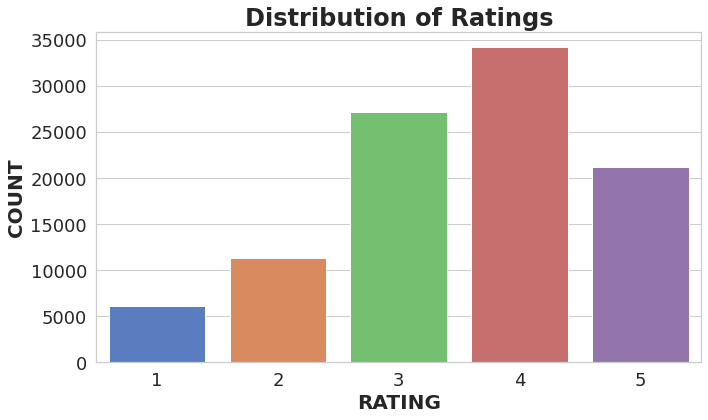

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set general style
sns.set(style="whitegrid", palette="pastel")

# Create figure
plt.figure(figsize=(10, 6))

# Plot
sns.countplot(x='Rating', data=ratings_df, hue='Rating', palette='muted', legend=False)

# Titles and labels
plt.title('Distribution of Ratings', fontsize=24, weight='bold')
plt.xlabel('RATING', fontsize=20, weight='bold')
plt.ylabel('COUNT', fontsize=20, weight='bold')

# Tick label size
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()





In [7]:
plt.savefig('Ratings_distribution.png', dpi=300)


<Figure size 432x288 with 0 Axes>

### <font color="blue"> 2.3.2 Movies with Highest Average Rating (Top 10)



In [ ]:
# Calculate average ratings and number of ratings per movie
movie_ratings = ratings_df.groupby('MovieID').agg({'Rating': ['mean', 'count']})
movie_ratings.columns = ['AverageRating', 'NumRatings']

# Filter for movies with more than 100 ratings to avoid noise
popular_movies = movie_ratings[movie_ratings['NumRatings'] >= 100]
top_movies = popular_movies.sort_values('AverageRating', ascending=False).head(10)

# Merge with movie titles for better display
top_movies = top_movies.merge(movies_df, on='MovieID')
top_movies = top_movies[['Title', 'AverageRating', 'NumRatings']]

# Display top 10 movies with highest ratings
import pandas as pd
from IPython.display import display, HTML

# Display as an HTML table for better readability
display(HTML(top_movies.to_html(index=False)))


Title,AverageRating,NumRatings
"Close Shave, A (1995)",4.491071,112
Schindler's List (1993),4.466443,298
"Wrong Trousers, The (1993)",4.466102,118
Casablanca (1942),4.456790,243
"Shawshank Redemption, The (1994)",4.445230,283
Rear Window (1954),4.387560,209
"Usual Suspects, The (1995)",4.385768,267
Star Wars (1977),4.358491,583
12 Angry Men (1957),4.344000,125
Citizen Kane (1941),4.292929,198


### <font color="blue"> 2.3.3 Movies with Most Ratings (Top 10)

/tmp/ipykernel_53072/1550139126.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


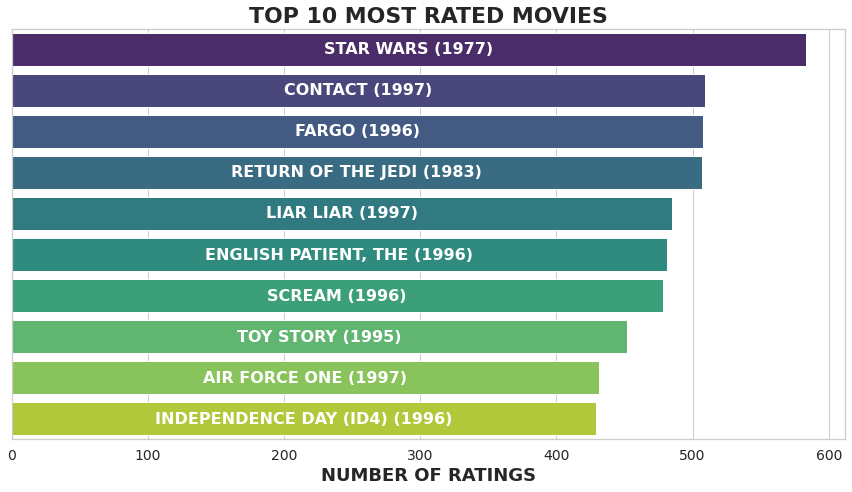

In [10]:
# Group movies by number of ratings and compute counts
movie_ratings_count = ratings_df.groupby('MovieID').size().reset_index(name='RatingCount')

# Merge with movie titles to get movie names
movie_ratings_count = movie_ratings_count.merge(movies_df[['MovieID', 'Title']], on='MovieID', how='left')

# Sort by number of ratings in descending order and select top 10
top_10_most_rated_movies = movie_ratings_count.sort_values(by='RatingCount', ascending=False).head(10)

# Convert movie titles to uppercase for better readability
top_10_most_rated_movies['Title'] = top_10_most_rated_movies['Title'].str.upper()

# Set general Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    x='RatingCount',
    y='Title',
    data=top_10_most_rated_movies,
    palette='viridis',
    legend=False
)

# Add movie titles inside the bars
for i, (count, title) in enumerate(zip(top_10_most_rated_movies['RatingCount'], top_10_most_rated_movies['Title'])):
    plt.text(count / 2, i, title, ha='center', va='center', color='white', fontsize=16, fontweight='bold')

# Customize title and axis labels
plt.title('TOP 10 MOST RATED MOVIES', fontsize=22, fontweight='bold')
plt.xlabel('NUMBER OF RATINGS', fontsize=18, fontweight='bold')
plt.ylabel('')
plt.xticks(fontsize=14)
plt.yticks([])

# Adjust layout to fit everything
plt.tight_layout()
plt.show()




<Figure size 432x288 with 0 Axes>

### <font color="blue">2.3.4 Top 10 Movies with Highest Average Rating (Min. 400 Ratings)</font>


In [24]:
# Filter movies with at least 1000 ratings
movie_ratings_count = ratings_df.groupby('MovieID').size()
movies_with_min_ratings = movie_ratings_count[movie_ratings_count >= 400].index

# Get the average ratings for those movies
avg_ratings_min_1000 = ratings_df[ratings_df['MovieID'].isin(movies_with_min_ratings)] \
    .groupby('MovieID')['Rating'].mean().reset_index()

# Get the count of ratings for those movies
rating_count_min_1000 = ratings_df[ratings_df['MovieID'].isin(movies_with_min_ratings)] \
    .groupby('MovieID').size().reset_index(name='RatingCount')

# Merge with the movie details to get the movie titles
top_movies_with_ratings = avg_ratings_min_1000.merge(movies_df[['MovieID', 'Title']], on='MovieID') \
    .merge(rating_count_min_1000, on='MovieID')

# Sort the movies by average rating
top_movies_with_ratings_sorted = top_movies_with_ratings.sort_values(by='Rating', ascending=False).head(10)

# Display the table with title, average rating, and rating count
top_movies_with_ratings_sorted[['Title', 'Rating', 'RatingCount']]




,Title,Rating,RatingCount
1,Star Wars (1977),4.358491,583
4,"Godfather, The (1972)",4.283293,413
5,Raiders of the Lost Ark (1981),4.252381,420
2,Fargo (1996),4.155512,508
6,Return of the Jedi (1983),4.007890,507
0,Toy Story (1995),3.878319,452
7,Contact (1997),3.803536,509
8,"English Patient, The (1996)",3.656965,481
11,Air Force One (1997),3.631090,431
9,Scream (1996),3.441423,478


# <font color="blue">3. Recommender Systems</font>

In this chapter, we will explore and build three different types of recommender systems. Each system leverages different techniques and methodologies to recommend movies based on user preferences. The three types of recommender systems we will focus on are:

1. **Collaborative Filtering**: This method makes recommendations based on the past behaviors or ratings of users. The assumption is that users who have agreed in the past will agree in the future on new items. We will explore both User-User and Item-Item Collaborative Filtering approaches.

2. **Content-Based Filtering**: This system recommends items based on the content or features of the movies themselves (such as genres, keywords, etc.) and how they match a user's previous preferences. Here, the focus is on movie features rather than the behavior of other users.

3. **Ensemble Methods**: This approach combines different recommendation algorithms to enhance the overall recommendation quality. By integrating multiple methods, such as Collaborative Filtering and Content-Based, ensemble techniques can help overcome the weaknesses of individual algorithms.

Let's proceed step by step in building and evaluating these systems.

## <font color="blue">3.1 Collaborative filtering</font>





### <font color="blue">3.1.1 Collaborative Filtering: Building the Ratings Matrix</font>

The first step in building a Collaborative Filtering system is to construct the **ratings matrix (R)**. This matrix represents the relationship between users and items (in this case, movies) based on the ratings that users have provided.

1. **Ratings Matrix (R):**
   - The rows represent **users**.
   - The columns represent **movies**.
   - The values in the matrix are the **ratings** that users have given to movies (from 1 to 5 stars). Missing values represent unrated movies by that particular user.

In [23]:
import pandas as pd
from IPython.display import display, HTML

# Create the ratings matrix (UserID as rows, MovieID as columns)
ratings_matrix = ratings_df.pivot_table(index='UserID', columns='MovieID', values='Rating')

# Display a smaller subset to keep it readable (e.g., first 10 rows and columns)
subset_matrix = ratings_matrix.iloc[:10, :10]

# Show as styled HTML table
display(HTML(subset_matrix.to_html()))



MovieID,1,2,3,4,5,6,7,8,9,10
UserID,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,NaN
7,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.0,4.0
8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN


In [31]:
# Total number of possible ratings (total cells)
total_cells = ratings_matrix.shape[0] * ratings_matrix.shape[1]

# Number of actual ratings (non-NaN values)
non_missing_ratings = ratings_matrix.count().sum()

# Calculate sparsity: proportion of missing entries
sparsity = 1 - (non_missing_ratings / total_cells)

# Display as percentage
print(f"Sparsity of the ratings matrix: {sparsity:.4f} ({sparsity*100:.2f}%)")


Sparsity of the ratings matrix: 0.9370 (93.70%)


As we can observe, the user-item rating matrix is highly sparse, meaning that most users have rated only a small subset of all available movies. This sparsity can significantly affect the performance of collaborative filtering algorithms. Therefore, it may be necessary to explore preprocessing techniques such as dimensionality reduction, imputation of missing values, or filtering out users/items with very few interactions to improve the quality and accuracy of our recommendation models.


#### <font color="blue">Train & Test Split</font>

In [24]:
import numpy as np
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Step 1: Identify all (user, movie) pairs where a rating is available (not NaN)
observed_indices = list(zip(*np.where(~np.isnan(ratings_matrix.values))))  # <-- .values if ratings_matrix is DataFrame

# Step 2: Define the proportion for the test set (e.g., 10% of observed ratings)
test_size = int(0.05 * len(observed_indices))

# Step 3: Randomly sample indices for the test set
test_indices = random.sample(observed_indices, test_size)

# Step 4: Create the training matrix by copying the full ratings matrix
train_matrix = ratings_matrix.copy()

# Mask the test ratings in the training matrix (set them to NaN)
for user_idx, movie_idx in test_indices:
    train_matrix.iloc[user_idx, movie_idx] = np.nan  # <-- use .iloc here!

# Step 5: Create the test matrix (only containing test ratings, others set to NaN)
test_matrix = pd.DataFrame(np.nan, index=ratings_matrix.index, columns=ratings_matrix.columns)
for user_idx, movie_idx in test_indices:
    test_matrix.iloc[user_idx, movie_idx] = ratings_matrix.iloc[user_idx, movie_idx]

# (Optional) Display basic information
print(f"✅ Number of ratings in train set: {np.count_nonzero(~np.isnan(train_matrix.values))}")
print(f"✅ Number of ratings in test set: {np.count_nonzero(~np.isnan(test_matrix.values))}")



✅ Number of ratings in train set: 95000
✅ Number of ratings in test set: 5000


### <font color="blue">3.1.2 **Collaborative Filtering:**  Neighborhood models</font>


#### <font color="blue">**User-based models**</font>

User-based neighborhood methods aim to identify similar users to the target user for whom rating predictions are being made. The first step in these methods is to define a *similarity function* that measures how similar one user is to another based on their specified ratings. This is crucial for determining the neighborhood of the target user.

Let $R$ be the rating matrix of dimensions $m \times n$, where $m$ represents the users and $n$ represents the items. Each entry $r_{uj}$ in the matrix corresponds to the rating given by user $u$ to item $j$. Since users typically rate only a small subset of available items, the matrix is sparse.

To compute similarity between two users $u$ and $v$, the *mean rating* for each user is first calculated as follows:

$$
\mu_u = \frac{\sum_{k \in I_u} r_{uk}}{|I_u|}
$$

where $I_u$ is the set of items rated by user $u$, and $r_{uk}$ is the rating given by user $u$ to item $k$.

Next, the *Pearson correlation coefficient* is used to measure similarity between two users, defined as:

$$
\text{Sim}(u, v) = \frac{\sum_{k \in I_u \cap I_v} (r_{uk} - \mu_u)(r_{vk} - \mu_v)}{\sqrt{\sum_{k \in I_u \cap I_v} (r_{uk} - \mu_u)^2} \cdot \sqrt{\sum_{k \in I_u \cap I_v} (r_{vk} - \mu_v)^2}}
$$

This formula computes similarity by considering only the items both users have rated, adjusted by their mean ratings.

Finally, the prediction for the rating of item $j$ by user $u$ is computed as:

$$
\hat{r}_{uj} = \mu_u + \frac{\sum_{v \in P_u(j)} \text{Sim}(u, v) \cdot s_{vj}}{\sum_{v \in P_u(j)} |\text{Sim}(u, v)|}
$$

where $P_u(j)$ is the set of the top $k$ most similar users to user $u$ who have rated item $j$, and $s_{vj}$ is the mean-centered rating of user $v$ for item $j$.


##### <font color="bLUE"> PEARSON CORRELATION

###### <font color="Green"> **Full model** </font>

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

R_train = train_matrix.values
R_test = test_matrix.values
num_users, num_items = R_train.shape

user_means = np.array([np.nanmean(R_train[u]) if np.any(~np.isnan(R_train[u])) else 0 for u in range(num_users)])

def pearson_similarity(u, v):
    common_items = ~np.isnan(R_train[u]) & ~np.isnan(R_train[v])
    if np.sum(common_items) == 0:
        return 0
    ru = R_train[u, common_items] - user_means[u]
    rv = R_train[v, common_items] - user_means[v]
    numerator = np.dot(ru, rv)
    denominator = np.sqrt(np.sum(ru ** 2)) * np.sqrt(np.sum(rv ** 2))
    return 0 if denominator == 0 else numerator / denominator

print("Calculating similarity matrix...")
similarity_matrix = np.zeros((num_users, num_users))
for u in tqdm(range(num_users), desc="Similarity matrix"):
    for v in range(num_users):
        if u != v:
            similarity_matrix[u, v] = pearson_similarity(u, v)

def predict_rating(u, j, k=None):
    if not np.isnan(R_train[u, j]):
        return R_train[u, j]
    neighbors = [v for v in range(num_users) if not np.isnan(R_train[v, j]) and v != u]
    if not neighbors:
        return user_means[u]
    sims = [(v, similarity_matrix[u, v]) for v in neighbors]
    sims.sort(key=lambda x: abs(x[1]), reverse=True)
    if k is not None:
        sims = sims[:k]
    numerator = sum(sim * (R_train[v, j] - user_means[v]) for v, sim in sims)
    denominator = sum(abs(sim) for _, sim in sims)
    return user_means[u] if denominator == 0 else user_means[u] + numerator / denominator

k_values = [50, 150, 500, None]
results = []

R_train_filled = np.nan_to_num(R_train)
item_similarity = cosine_similarity(R_train_filled.T)

# Popularity (once, for novelty)
item_popularity = np.sum(~np.isnan(R_train), axis=0)
item_popularity_inv = 1 / (item_popularity + 1)

for k in k_values:
    print(f"\nPredicting missing ratings with k = {'all' if k is None else k}...")
    R_pred = np.copy(R_train)
    for u in tqdm(range(num_users), desc="Predicting ratings"):
        for j in range(num_items):
            if np.isnan(R_train[u, j]):
                R_pred[u, j] = predict_rating(u, j, k)
    
    predicted = []
    actual = []
    test_indices = list(zip(*np.where(~np.isnan(R_test))))
    for u, j in test_indices:
        predicted.append(R_pred[u, j])
        actual.append(R_test[u, j])
    
    rmse = sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)

    # Novelty and Relevance using top-20 per user
    novelty_list = []
    relevance_list = []

    for u in range(num_users):
        if np.all(~np.isnan(R_train[u])):  # Usuario con todo valorado en train
            continue
        user_preds = R_pred[u, :]
        known_train_items = ~np.isnan(R_train[u])
        unknown_items = np.where(~known_train_items)[0]
        if len(unknown_items) == 0:
            continue

        top_20_items = unknown_items[np.argsort(user_preds[unknown_items])[-20:]]
        
        # Novelty
        novelty_u = np.mean([item_popularity_inv[j] for j in top_20_items])
        novelty_list.append(novelty_u)

        # Relevance (solo si el item está en el test)
        rel_ratings = [R_test[u, j] for j in top_20_items if not np.isnan(R_test[u, j])]
        if rel_ratings:
            relevance_list.append(np.mean(rel_ratings))

    novelty = np.mean(novelty_list)
    relevance = np.mean(relevance_list)

    # Serendipity
    serendipity_scores = [abs(R_pred[u, j] - R_test[u, j]) for u, j in test_indices if np.isnan(R_train[u, j])]
    serendipity = np.mean(serendipity_scores)

    # Diversity
    diversity_scores = []
    for u in range(num_users):
        top_5_items = np.argsort(R_pred[u, :])[-5:]
        diversity = 0
        count = 0
        for i in range(len(top_5_items)):
            for j2 in range(i + 1, len(top_5_items)):
                diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
                count += 1
        diversity_scores.append(diversity / count if count > 0 else 0)
    diversity = np.mean(diversity_scores)

    results.append({
        "Model": "Memory-based CF",
        "RMSE": rmse,
        "MAE": mae,
        "k_neighbors": "all" if k is None else k,
        "Similarity": "Pearson",
        "Novelty": novelty,
        "Relevance": relevance,
        "Serendipity": serendipity,
        "Diversity": diversity
    })

results_table = pd.DataFrame(results)

# Print summary
for idx, row in results_table.iterrows():
    print(f"k = {row['k_neighbors']}: RMSE = {row['RMSE']:.4f}, MAE = {row['MAE']:.4f}, Relevance = {row['Relevance']:.4f}, Novelty = {row['Novelty']:.4f}")



Calculating similarity matrix...


Similarity matrix: 100%|██████████| 943/943 [00:48<00:00, 19.29it/s]



Predicting missing ratings with k = 50...


Predicting ratings: 100%|██████████| 943/943 [22:09<00:00,  1.41s/it]



Predicting missing ratings with k = 150...


Predicting ratings: 100%|██████████| 943/943 [22:27<00:00,  1.43s/it]



Predicting missing ratings with k = 500...


Predicting ratings: 100%|██████████| 943/943 [22:18<00:00,  1.42s/it]



Predicting missing ratings with k = all...


Predicting ratings: 100%|██████████| 943/943 [22:26<00:00,  1.43s/it]


k = 50: RMSE = 0.9400, MAE = 0.7336, Relevance = 4.5000, Novelty = 0.3816
k = 150: RMSE = 0.9423, MAE = 0.7371, Relevance = 4.0000, Novelty = 0.3822
k = 500: RMSE = 0.9437, MAE = 0.7390, Relevance = 4.0000, Novelty = 0.3823
k = all: RMSE = 0.9437, MAE = 0.7391, Relevance = 4.0000, Novelty = 0.3823


In [6]:
results_table

,Model,RMSE,MAE,k_neighbors,Similarity,Novelty,Relevance,Serendipity,Diversity
0,Memory-based CF,0.939964,0.733609,50,Pearson,0.381612,4.5,0.733609,0.896768
1,Memory-based CF,0.942289,0.737077,150,Pearson,0.382243,4.0,0.737077,0.896417
2,Memory-based CF,0.943699,0.739042,500,Pearson,0.382289,4.0,0.739042,0.896826
3,Memory-based CF,0.943711,0.739056,all,Pearson,0.382289,4.0,0.739056,0.896826


#####  <font color="bLUE"> RAW COSINE SIMILARITY

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

R_train = train_matrix.values
R_test = test_matrix.values
num_users, num_items = R_train.shape

# Fill NaNs with 0 temporarily for cosine similarity
R_train_filled = np.nan_to_num(R_train)

# Compute cosine similarity between users (raw cosine similarity)
print("Calculating cosine similarity matrix...")
similarity_matrix = cosine_similarity(R_train_filled)

# Optional: set diagonal to 0 to avoid self-similarity
np.fill_diagonal(similarity_matrix, 0)

user_means = np.array([np.nanmean(R_train[u]) if np.any(~np.isnan(R_train[u])) else 0 for u in range(num_users)])

def predict_rating(u, j, k=None):
    if not np.isnan(R_train[u, j]):
        return R_train[u, j]
    neighbors = [v for v in range(num_users) if not np.isnan(R_train[v, j]) and v != u]
    if not neighbors:
        return user_means[u]
    sims = [(v, similarity_matrix[u, v]) for v in neighbors]
    sims.sort(key=lambda x: abs(x[1]), reverse=True)
    if k is not None:
        sims = sims[:k]
    numerator = sum(sim * R_train[v, j] for v, sim in sims)
    denominator = sum(abs(sim) for _, sim in sims)
    return user_means[u] if denominator == 0 else numerator / denominator

# Popularity (for novelty)
item_popularity = np.sum(~np.isnan(R_train), axis=0)
item_popularity_inv = 1 / (item_popularity + 1)

# Item-item similarity for diversity (based on raw cosine similarity)
item_similarity = cosine_similarity(R_train_filled.T)

k_values = [50, 150, 500, None]

for k in k_values:
    print(f"\nPredicting missing ratings with k = {'all' if k is None else k} using raw cosine similarity...")
    R_pred = np.copy(R_train)
    for u in tqdm(range(num_users), desc="Predicting ratings"):
        for j in range(num_items):
            if np.isnan(R_train[u, j]):
                R_pred[u, j] = predict_rating(u, j, k)
    
    predicted = []
    actual = []
    test_indices = list(zip(*np.where(~np.isnan(R_test))))
    for u, j in test_indices:
        predicted.append(R_pred[u, j])
        actual.append(R_test[u, j])
    
    rmse = sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)

    novelty_list = []
    relevance_list = []

    for u in range(num_users):
        if np.all(~np.isnan(R_train[u])):
            continue
        user_preds = R_pred[u, :]
        known_train_items = ~np.isnan(R_train[u])
        unknown_items = np.where(~known_train_items)[0]
        if len(unknown_items) == 0:
            continue

        top_20_items = unknown_items[np.argsort(user_preds[unknown_items])[-20:]]
        
        novelty_u = np.mean([item_popularity_inv[j] for j in top_20_items])
        novelty_list.append(novelty_u)

        rel_ratings = [R_test[u, j] for j in top_20_items if not np.isnan(R_test[u, j])]
        if rel_ratings:
            relevance_list.append(np.mean(rel_ratings))

    novelty = np.mean(novelty_list)
    relevance = np.mean(relevance_list)

    serendipity_scores = [abs(R_pred[u, j] - R_test[u, j]) for u, j in test_indices if np.isnan(R_train[u, j])]
    serendipity = np.mean(serendipity_scores)

    diversity_scores = []
    for u in range(num_users):
        top_5_items = np.argsort(R_pred[u, :])[-5:]
        diversity = 0
        count = 0
        for i in range(len(top_5_items)):
            for j2 in range(i + 1, len(top_5_items)):
                diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
                count += 1
        diversity_scores.append(diversity / count if count > 0 else 0)
    diversity = np.mean(diversity_scores)

    # Append results to existing DataFrame
    results_table = pd.concat([
        results_table,
        pd.DataFrame([{
            "Model": "Memory-based CF",
            "RMSE": rmse,
            "MAE": mae,
            "k_neighbors": "all" if k is None else k,
            "Similarity": "Cosine",
            "Novelty": novelty,
            "Relevance": relevance,
            "Serendipity": serendipity,
            "Diversity": diversity
        }])
    ], ignore_index=True)

# Print summary
for idx, row in results_table.iterrows():
    print(f"k = {row['k_neighbors']}: RMSE = {row['RMSE']:.4f}, MAE = {row['MAE']:.4f}, Relevance = {row['Relevance']:.4f}, Novelty = {row['Novelty']:.4f}")





Calculating cosine similarity matrix...

Predicting missing ratings with k = 50 using raw cosine similarity...


Predicting ratings: 100%|██████████| 943/943 [22:01<00:00,  1.40s/it]



Predicting missing ratings with k = 150 using raw cosine similarity...


Predicting ratings: 100%|██████████| 943/943 [22:16<00:00,  1.42s/it]



Predicting missing ratings with k = 500 using raw cosine similarity...


Predicting ratings: 100%|██████████| 943/943 [22:17<00:00,  1.42s/it]



Predicting missing ratings with k = all using raw cosine similarity...


Predicting ratings: 100%|██████████| 943/943 [22:20<00:00,  1.42s/it]


k = 50: RMSE = 0.9400, MAE = 0.7336, Relevance = 4.5000, Novelty = 0.3816
k = 150: RMSE = 0.9423, MAE = 0.7371, Relevance = 4.0000, Novelty = 0.3822
k = 500: RMSE = 0.9437, MAE = 0.7390, Relevance = 4.0000, Novelty = 0.3823
k = all: RMSE = 0.9437, MAE = 0.7391, Relevance = 4.0000, Novelty = 0.3823
k = 50: RMSE = 1.0146, MAE = 0.8087, Relevance = 4.5126, Novelty = 0.2745
k = 150: RMSE = 1.0234, MAE = 0.8181, Relevance = 4.5155, Novelty = 0.2818
k = 500: RMSE = 1.0263, MAE = 0.8212, Relevance = 4.3984, Novelty = 0.2840
k = all: RMSE = 1.0263, MAE = 0.8212, Relevance = 4.3790, Novelty = 0.2840


In [8]:
results_table


,Model,RMSE,MAE,k_neighbors,Similarity,Novelty,Relevance,Serendipity,Diversity
0,Memory-based CF,0.939964,0.733609,50,Pearson,0.381612,4.500000,0.733609,0.896768
1,Memory-based CF,0.942289,0.737077,150,Pearson,0.382243,4.000000,0.737077,0.896417
2,Memory-based CF,0.943699,0.739042,500,Pearson,0.382289,4.000000,0.739042,0.896826
3,Memory-based CF,0.943711,0.739056,all,Pearson,0.382289,4.000000,0.739056,0.896826
4,Memory-based CF,1.014610,0.808673,50,Cosine,0.274477,4.512626,0.808673,0.897455
5,Memory-based CF,1.023384,0.818071,150,Cosine,0.281799,4.515464,0.818071,0.889278
6,Memory-based CF,1.026280,0.821210,500,Cosine,0.283966,4.398438,0.821210,0.891212
7,Memory-based CF,1.026290,0.821228,all,Cosine,0.283967,4.379032,0.821228,0.891204


#### <font color="bLUE"> Significance Weighting

In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm

R_train = train_matrix.values
R_test = test_matrix.values
num_users, num_items = R_train.shape

print("Calculating discounted Pearson similarity matrix...")

def discounted_pearson_similarity(R):
    sim_matrix = np.zeros((R.shape[0], R.shape[0]))
    for u in tqdm(range(R.shape[0]), desc="Calculating user-user similarity"):
        for v in range(u + 1, R.shape[0]):
            mask = ~np.isnan(R[u]) & ~np.isnan(R[v])
            n_common = np.sum(mask)
            if n_common >= 2:
                r_u = R[u, mask]
                r_v = R[v, mask]
                mean_u = np.mean(r_u)
                mean_v = np.mean(r_v)
                num = np.sum((r_u - mean_u) * (r_v - mean_v))
                denom = np.sqrt(np.sum((r_u - mean_u)**2)) * np.sqrt(np.sum((r_v - mean_v)**2))
                if denom != 0:
                    pearson = num / denom
                    discount = n_common / (n_common + 1)
                    sim = pearson * discount
                    sim_matrix[u, v] = sim
                    sim_matrix[v, u] = sim
    return sim_matrix

similarity_matrix = discounted_pearson_similarity(R_train)

np.fill_diagonal(similarity_matrix, 0)

user_means = np.array([
    np.nanmean(R_train[u]) if np.any(~np.isnan(R_train[u])) else 0 for u in range(num_users)
])

def predict_rating(u, j, k=None):
    if not np.isnan(R_train[u, j]):
        return R_train[u, j]
    neighbors = [v for v in range(num_users) if not np.isnan(R_train[v, j]) and v != u]
    if not neighbors:
        return user_means[u]
    sims = [(v, similarity_matrix[u, v]) for v in neighbors]
    sims.sort(key=lambda x: abs(x[1]), reverse=True)
    if k is not None:
        sims = sims[:k]
    numerator = sum(sim * R_train[v, j] for v, sim in sims)
    denominator = sum(abs(sim) for _, sim in sims)
    return user_means[u] if denominator == 0 else numerator / denominator

# Popularity (for novelty)
item_popularity = np.sum(~np.isnan(R_train), axis=0)
item_popularity_inv = 1 / (item_popularity + 1)

# Item-item similarity for diversity (use Pearson too)
item_similarity = discounted_pearson_similarity(R_train.T)

k_values = [50, 150, 500, None]

for k in k_values:
    print(f"\nPredicting missing ratings with k = {'all' if k is None else k} using discounted Pearson similarity...")
    R_pred = np.copy(R_train)
    for u in tqdm(range(num_users), desc="Predicting ratings"):
        for j in range(num_items):
            if np.isnan(R_train[u, j]):
                R_pred[u, j] = predict_rating(u, j, k)

    predicted = []
    actual = []
    test_indices = list(zip(*np.where(~np.isnan(R_test))))
    for u, j in test_indices:
        predicted.append(R_pred[u, j])
        actual.append(R_test[u, j])

    rmse = sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)

    novelty_list = []
    relevance_list = []

    for u in range(num_users):
        if np.all(~np.isnan(R_train[u])):
            continue
        user_preds = R_pred[u, :]
        known_train_items = ~np.isnan(R_train[u])
        unknown_items = np.where(~known_train_items)[0]
        if len(unknown_items) == 0:
            continue

        top_20_items = unknown_items[np.argsort(user_preds[unknown_items])[-20:]]

        novelty_u = np.mean([item_popularity_inv[j] for j in top_20_items])
        novelty_list.append(novelty_u)

        rel_ratings = [R_test[u, j] for j in top_20_items if not np.isnan(R_test[u, j])]
        if rel_ratings:
            relevance_list.append(np.mean(rel_ratings))

    novelty = np.mean(novelty_list)
    relevance = np.mean(relevance_list)

    serendipity_scores = [abs(R_pred[u, j] - R_test[u, j]) for u, j in test_indices if np.isnan(R_train[u, j])]
    serendipity = np.mean(serendipity_scores)

    diversity_scores = []
    for u in range(num_users):
        top_5_items = np.argsort(R_pred[u, :])[-5:]
        diversity = 0
        count = 0
        for i in range(len(top_5_items)):
            for j2 in range(i + 1, len(top_5_items)):
                diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
                count += 1
        diversity_scores.append(diversity / count if count > 0 else 0)
    diversity = np.mean(diversity_scores)

    # Append results to existing DataFrame
    results_table = pd.concat([
        results_table,
        pd.DataFrame([{
            "Model": "Memory-based CF",
            "RMSE": rmse,
            "MAE": mae,
            "k_neighbors": "all" if k is None else k,
            "Similarity": "Discounted Pearson",
            "Novelty": novelty,
            "Relevance": relevance,
            "Serendipity": serendipity,
            "Diversity": diversity
        }])
    ], ignore_index=True)

# Print summary
for idx, row in results_table.iterrows():
    print(f"k = {row['k_neighbors']}: RMSE = {row['RMSE']:.4f}, MAE = {row['MAE']:.4f}, Relevance = {row['Relevance']:.4f}, Novelty = {row['Novelty']:.4f}")




Calculating discounted Pearson similarity matrix...


Calculating user-user similarity: 100%|██████████| 1682/1682 [00:49<00:00, 33.88it/s] 



Predicting missing ratings with k = 50 using discounted Pearson similarity...


Predicting ratings: 100%|██████████| 943/943 [22:02<00:00,  1.40s/it]



Predicting missing ratings with k = 150 using discounted Pearson similarity...


Predicting ratings: 100%|██████████| 943/943 [22:22<00:00,  1.42s/it]



Predicting missing ratings with k = 500 using discounted Pearson similarity...


Predicting ratings: 100%|██████████| 943/943 [22:08<00:00,  1.41s/it]



Predicting missing ratings with k = all using discounted Pearson similarity...


Predicting ratings: 100%|██████████| 943/943 [22:24<00:00,  1.43s/it]


k = 50: RMSE = 0.9400, MAE = 0.7336, Relevance = 4.5000, Novelty = 0.3816
k = 150: RMSE = 0.9423, MAE = 0.7371, Relevance = 4.0000, Novelty = 0.3822
k = 500: RMSE = 0.9437, MAE = 0.7390, Relevance = 4.0000, Novelty = 0.3823
k = all: RMSE = 0.9437, MAE = 0.7391, Relevance = 4.0000, Novelty = 0.3823
k = 50: RMSE = 1.0146, MAE = 0.8087, Relevance = 4.5126, Novelty = 0.2745
k = 150: RMSE = 1.0234, MAE = 0.8181, Relevance = 4.5155, Novelty = 0.2818
k = 500: RMSE = 1.0263, MAE = 0.8212, Relevance = 4.3984, Novelty = 0.2840
k = all: RMSE = 1.0263, MAE = 0.8212, Relevance = 4.3790, Novelty = 0.2840
k = 50: RMSE = 1.7459, MAE = 1.3155, Relevance = 4.4947, Novelty = 0.3471
k = 150: RMSE = 1.7847, MAE = 1.3694, Relevance = 4.5455, Novelty = 0.3582
k = 500: RMSE = 1.8139, MAE = 1.4054, Relevance = 4.2500, Novelty = 0.3588
k = all: RMSE = 1.8140, MAE = 1.4054, Relevance = 4.2500, Novelty = 0.3588


In [10]:
results_table

,Model,RMSE,MAE,k_neighbors,Similarity,Novelty,Relevance,Serendipity,Diversity
0,Memory-based CF,0.939964,0.733609,50,Pearson,0.381612,4.500000,0.733609,0.896768
1,Memory-based CF,0.942289,0.737077,150,Pearson,0.382243,4.000000,0.737077,0.896417
2,Memory-based CF,0.943699,0.739042,500,Pearson,0.382289,4.000000,0.739042,0.896826
3,Memory-based CF,0.943711,0.739056,all,Pearson,0.382289,4.000000,0.739056,0.896826
4,Memory-based CF,1.014610,0.808673,50,Cosine,0.274477,4.512626,0.808673,0.897455
5,Memory-based CF,1.023384,0.818071,150,Cosine,0.281799,4.515464,0.818071,0.889278
6,Memory-based CF,1.026280,0.821210,500,Cosine,0.283966,4.398438,0.821210,0.891212
7,Memory-based CF,1.026290,0.821228,all,Cosine,0.283967,4.379032,0.821228,0.891204
8,Memory-based CF,1.745855,1.315529,50,Discounted Pearson,0.347101,4.494709,1.315529,0.911918
9,Memory-based CF,1.784735,1.369370,150,Discounted Pearson,0.358223,4.545455,1.369370,0.911629


In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm


R_train = train_matrix.values
R_test = test_matrix.values
num_users, num_items = R_train.shape

def discounted_pearson_similarity(R, beta=50):
    sim_matrix = np.zeros((R.shape[0], R.shape[0]))
    for u in tqdm(range(R.shape[0]), desc="Calculating user-user similarity"):
        for v in range(u + 1, R.shape[0]):
            mask = ~np.isnan(R[u]) & ~np.isnan(R[v])
            n_common = np.sum(mask)
            if n_common >= 2:
                r_u = R[u, mask]
                r_v = R[v, mask]
                mean_u = np.mean(r_u)
                mean_v = np.mean(r_v)
                num = np.sum((r_u - mean_u) * (r_v - mean_v))
                denom = np.sqrt(np.sum((r_u - mean_u)**2)) * np.sqrt(np.sum((r_v - mean_v)**2))
                if denom != 0:
                    pearson = num / denom
                    discount = min(n_common, beta) / beta
                    sim = pearson * discount
                    sim_matrix[u, v] = sim
                    sim_matrix[v, u] = sim
    return sim_matrix

user_means = np.array([
    np.nanmean(R_train[u]) if np.any(~np.isnan(R_train[u])) else 0 for u in range(num_users)
])

def predict_rating(u, j, k=None):
    if not np.isnan(R_train[u, j]):
        return R_train[u, j]
    neighbors = [v for v in range(num_users) if not np.isnan(R_train[v, j]) and v != u]
    if not neighbors:
        return user_means[u]
    sims = [(v, similarity_matrix[u, v]) for v in neighbors]
    sims.sort(key=lambda x: abs(x[1]), reverse=True)
    if k is not None:
        sims = sims[:k]
    numerator = sum(sim * R_train[v, j] for v, sim in sims)
    denominator = sum(abs(sim) for _, sim in sims)
    return user_means[u] if denominator == 0 else numerator / denominator

item_popularity = np.sum(~np.isnan(R_train), axis=0)
item_popularity_inv = 1 / (item_popularity + 1)

k_values = [50, 150, 500, None]
beta_values = [30, 100, 300]

for beta in beta_values:
    print(f"\nUsing discounted Pearson similarity with beta = {beta}")
    similarity_matrix = discounted_pearson_similarity(R_train, beta=beta)
    np.fill_diagonal(similarity_matrix, 0)
    item_similarity = discounted_pearson_similarity(R_train.T, beta=beta)

    for k in k_values:
        print(f"\nPredicting missing ratings with k = {'all' if k is None else k}...")
        R_pred = np.copy(R_train)
        for u in tqdm(range(num_users), desc="Predicting ratings"):
            for j in range(num_items):
                if np.isnan(R_train[u, j]):
                    R_pred[u, j] = predict_rating(u, j, k)

        predicted = []
        actual = []
        test_indices = list(zip(*np.where(~np.isnan(R_test))))
        for u, j in test_indices:
            predicted.append(R_pred[u, j])
            actual.append(R_test[u, j])

        rmse = sqrt(mean_squared_error(actual, predicted))
        mae = mean_absolute_error(actual, predicted)

        novelty_list = []
        relevance_list = []

        for u in range(num_users):
            if np.all(~np.isnan(R_train[u])):
                continue
            user_preds = R_pred[u, :]
            known_train_items = ~np.isnan(R_train[u])
            unknown_items = np.where(~known_train_items)[0]
            if len(unknown_items) == 0:
                continue

            top_20_items = unknown_items[np.argsort(user_preds[unknown_items])[-20:]]

            novelty_u = np.mean([item_popularity_inv[j] for j in top_20_items])
            novelty_list.append(novelty_u)

            rel_ratings = [R_test[u, j] for j in top_20_items if not np.isnan(R_test[u, j])]
            if rel_ratings:
                relevance_list.append(np.mean(rel_ratings))

        novelty = np.mean(novelty_list)
        relevance = np.mean(relevance_list)

        serendipity_scores = [abs(R_pred[u, j] - R_test[u, j]) for u, j in test_indices if np.isnan(R_train[u, j])]
        serendipity = np.mean(serendipity_scores)

        diversity_scores = []
        for u in range(num_users):
            top_5_items = np.argsort(R_pred[u, :])[-5:]
            diversity = 0
            count = 0
            for i in range(len(top_5_items)):
                for j2 in range(i + 1, len(top_5_items)):
                    diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
                    count += 1
            diversity_scores.append(diversity / count if count > 0 else 0)
        diversity = np.mean(diversity_scores)

        results_table = pd.concat([
            results_table,
            pd.DataFrame([{
                "Model": "Memory-based CF",
                "RMSE": rmse,
                "MAE": mae,
                "k_neighbors": "all" if k is None else k,
                "Similarity": f"Discounted Pearson (β={beta})",
                "Novelty": novelty,
                "Relevance": relevance,
                "Serendipity": serendipity,
                "Diversity": diversity
            }])
        ], ignore_index=True)

# Mostrar resultados
print(results_table)



Using discounted Pearson similarity with beta = 30


Calculating user-user similarity: 100%|██████████| 1682/1682 [00:50<00:00, 33.28it/s] 



Predicting missing ratings with k = 50...


Predicting ratings: 100%|██████████| 943/943 [22:12<00:00,  1.41s/it]



Predicting missing ratings with k = 150...


Predicting ratings: 100%|██████████| 943/943 [22:25<00:00,  1.43s/it]



Predicting missing ratings with k = 500...


Predicting ratings: 100%|██████████| 943/943 [22:32<00:00,  1.43s/it]



Predicting missing ratings with k = all...


Predicting ratings: 100%|██████████| 943/943 [22:43<00:00,  1.45s/it]



Using discounted Pearson similarity with beta = 100


Calculating user-user similarity: 100%|██████████| 1682/1682 [00:49<00:00, 34.02it/s] 



Predicting missing ratings with k = 50...


Predicting ratings: 100%|██████████| 943/943 [22:25<00:00,  1.43s/it]



Predicting missing ratings with k = 150...


Predicting ratings: 100%|██████████| 943/943 [22:36<00:00,  1.44s/it]



Predicting missing ratings with k = 500...


Predicting ratings: 100%|██████████| 943/943 [22:33<00:00,  1.44s/it]



Predicting missing ratings with k = all...


Predicting ratings: 100%|██████████| 943/943 [22:44<00:00,  1.45s/it]



Using discounted Pearson similarity with beta = 300


Calculating user-user similarity: 100%|██████████| 1682/1682 [00:48<00:00, 34.70it/s] 



Predicting missing ratings with k = 50...


Predicting ratings: 100%|██████████| 943/943 [22:24<00:00,  1.43s/it]



Predicting missing ratings with k = 150...


Predicting ratings: 100%|██████████| 943/943 [22:43<00:00,  1.45s/it]



Predicting missing ratings with k = 500...


Predicting ratings: 100%|██████████| 943/943 [22:40<00:00,  1.44s/it]



Predicting missing ratings with k = all...


Predicting ratings: 100%|██████████| 943/943 [22:41<00:00,  1.44s/it]


              Model      RMSE       MAE k_neighbors  \
0   Memory-based CF  0.939964  0.733609          50   
1   Memory-based CF  0.942289  0.737077         150   
2   Memory-based CF  0.943699  0.739042         500   
3   Memory-based CF  0.943711  0.739056         all   
4   Memory-based CF  1.014610  0.808673          50   
5   Memory-based CF  1.023384  0.818071         150   
6   Memory-based CF  1.026280  0.821210         500   
7   Memory-based CF  1.026290  0.821228         all   
8   Memory-based CF  1.542159  1.127170          50   
9   Memory-based CF  1.661755  1.252763         150   
10  Memory-based CF  1.706512  1.304199         500   
11  Memory-based CF  1.706559  1.304256         all   
12  Memory-based CF  1.485412  1.081153          50   
13  Memory-based CF  1.606713  1.197023         150   
14  Memory-based CF  1.646199  1.242359         500   
15  Memory-based CF  1.646232  1.242399         all   
16  Memory-based CF  1.482527  1.079516          50   
17  Memory

In [13]:
results_table

,Model,RMSE,MAE,k_neighbors,Similarity,Novelty,Relevance,Serendipity,Diversity
0,Memory-based CF,0.939964,0.733609,50,Pearson,0.381612,4.500000,0.733609,0.896768
1,Memory-based CF,0.942289,0.737077,150,Pearson,0.382243,4.000000,0.737077,0.896417
2,Memory-based CF,0.943699,0.739042,500,Pearson,0.382289,4.000000,0.739042,0.896826
3,Memory-based CF,0.943711,0.739056,all,Pearson,0.382289,4.000000,0.739056,0.896826
4,Memory-based CF,1.014610,0.808673,50,Cosine,0.274477,4.512626,0.808673,0.897455
5,Memory-based CF,1.023384,0.818071,150,Cosine,0.281799,4.515464,0.818071,0.889278
6,Memory-based CF,1.026280,0.821210,500,Cosine,0.283966,4.398438,0.821210,0.891212
7,Memory-based CF,1.026290,0.821228,all,Cosine,0.283967,4.379032,0.821228,0.891204
8,Memory-based CF,1.542159,1.127170,50,Discounted Pearson (β=30),0.321019,4.482667,1.127170,0.926735
9,Memory-based CF,1.661755,1.252763,150,Discounted Pearson (β=30),0.357770,4.500000,1.252763,0.927606


##### <font color="blue">**Clustering for dimensionality reduction of user-based models**</font>

Clustering-based user collaborative filtering offers a scalable alternative to traditional neighborhood methods by replacing the costly nearest-neighbor search with an offline clustering stage. Instead of comparing each user with every other user, this approach groups users with similar rating behaviors into a smaller number of clusters, effectively reducing the computational complexity from $O(m^2)$ to a more efficient scale.

Once user clusters are formed, recommendations are generated by comparing a target user only to others within the same cluster, limiting similarity computations and accelerating predictions. This confined search space enhances efficiency but can slightly compromise accuracy, especially if users in the same cluster are not tightly similar. The trade-off between accuracy and scalability depends heavily on the granularity of the clusters.

Common clustering algorithms such as **k-means** can be adapted to work with sparse rating matrices by computing distances using only co-rated items. These algorithms iteratively update user assignments and cluster centroids, enabling convergence even with missing values.

In large-scale systems, user clustering not only reduces memory and time requirements but also facilitates parallelization and real-time recommendation, making it a compelling strategy for managing complexity without significantly sacrificing quality.



Ejecutando KMeans:   0%|          | 0/10 [00:00<?, ?it/s]/home/jmoral/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Ejecutando KMeans:  10%|█         | 1/10 [00:00<00:04,  1.91it/s]/home/jmoral/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Ejecutando KMeans:  20%|██        | 2/10 [00:01<00:06,  1.17it/s]/home/jmoral/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_i

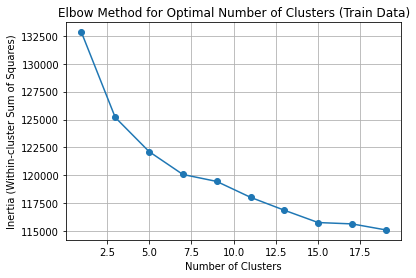

In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barra de progreso

# Usa directamente la train_matrix (asegúrate de que ya existe)
R_train = train_matrix.to_numpy()

# Define the Pearson similarity function
def pearson_similarity(u, v):
    common_items = ~np.isnan(R_train[u]) & ~np.isnan(R_train[v])
    if np.sum(common_items) == 0:
        return 0
    ru = R_train[u, common_items] - np.nanmean(R_train[u, common_items])
    rv = R_train[v, common_items] - np.nanmean(R_train[v, common_items])

    numerator = np.dot(ru, rv)
    denominator = np.sqrt(np.sum(ru ** 2)) * np.sqrt(np.sum(rv ** 2))

    if denominator == 0:
        return 0
    return numerator / denominator

# Create the similarity matrix with progress bar
num_users = R_train.shape[0]
similarity_matrix_train = np.zeros((num_users, num_users))

for i in tqdm(range(num_users), desc="Calculando similitudes"):
    for j in range(i + 1, num_users):
        similarity = pearson_similarity(i, j)
        similarity_matrix_train[i, j] = similarity
        similarity_matrix_train[j, i] = similarity

# Step 2: Apply K-means clustering and find the optimal number of clusters using the elbow method
inertia = []
cluster_range = list(range(1, 21, 2))

for k in tqdm(cluster_range, desc="Ejecutando KMeans"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(similarity_matrix_train)
    inertia.append(kmeans.inertia_)

# Step 3: Plot the elbow curve
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (Train Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid()
plt.show()





/home/jmoral/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


User Clusters:
[2 3 5 5 4 1 1 3 5 6 6 5 7 5 0 0 3 6 5 5 6 4 6 3 5 6 5 0 3 3 5 3 5 5 5 5 3
 5 5 5 3 4 4 4 3 3 5 3 6 5 5 3 3 3 3 4 0 6 1 6 5 1 3 1 5 5 5 3 6 4 5 6 3 5
 3 3 3 5 5 5 3 4 0 0 1 5 4 5 3 6 0 7 5 7 4 5 5 5 4 5 0 4 3 0 5 3 5 3 0 0 5
 5 5 5 3 6 0 3 0 3 6 5 3 5 0 5 5 6 5 4 5 5 5 5 3 5 5 3 5 5 5 3 5 4 2 5 5 5
 3 5 1 5 5 3 5 5 3 1 5 6 5 3 3 5 5 5 3 0 5 5 5 5 5 6 5 3 6 4 5 5 0 5 5 1 5
 5 5 0 6 5 5 3 3 2 0 5 0 1 3 4 1 5 5 3 5 3 4 5 5 4 5 5 6 3 0 6 5 3 5 5 6 2
 0 0 5 5 3 5 5 0 5 3 5 1 3 3 3 5 3 5 5 5 3 1 5 4 5 3 1 6 6 5 0 0 3 0 3 5 3
 5 5 6 6 3 5 3 1 7 1 3 1 3 5 6 0 7 5 5 3 6 5 5 3 5 5 6 3 3 5 4 2 6 7 4 6 6
 6 0 1 5 4 5 7 5 6 5 6 1 5 3 4 6 1 0 3 5 5 6 5 0 3 3 6 5 6 0 1 4 6 0 5 4 5
 1 5 0 5 3 1 5 5 6 1 1 1 4 4 5 3 3 5 3 5 6 5 5 0 5 3 6 6 5 1 5 3 5 3 3 5 5
 5 5 0 0 5 3 5 2 1 6 6 5 5 5 6 5 1 5 1 5 6 6 4 4 0 5 6 4 0 5 3 6 5 5 4 1 1
 5 6 5 0 3 3 3 5 2 2 5 5 5 5 3 3 5 6 3 5 5 7 3 5 5 3 5 2 5 6 5 5 5 5 4 5 5
 6 5 4 5 3 2 5 0 4 0 4 1 7 6 0 3 5 5 6 3 3 0 3 6 5 5 5 4 5 1 5 0 5 6 4 3 5
 5 5 4 5 6

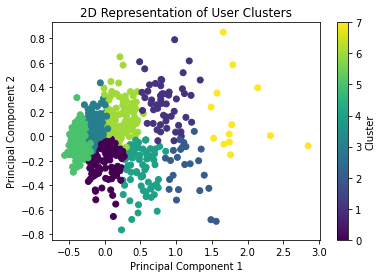

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 4: Apply K-means with the optimal number of clusters (say, we choose k=25 for example)
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
user_clusters = kmeans.fit_predict(similarity_matrix)

# Show the cluster labels for each user
print("User Clusters:")
print(user_clusters)

# Step 5: Visualize the clusters (2D representation for visualization)
pca = PCA(n_components=2)  # Importing PCA correctly
reduced_data = pca.fit_transform(similarity_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=user_clusters, cmap='viridis')
plt.title('2D Representation of User Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()



In [16]:
# Step 3: Group users by their cluster assignments
clusters = {i: [] for i in range(optimal_k)}  # Dictionary to store users by cluster

# Assign users to their respective clusters
for user_id, cluster_id in enumerate(user_clusters):
    clusters[cluster_id].append(user_id)

# Step 4: Display the length (number of users) in each cluster
for cluster_id, users in clusters.items():
    print(f"Cluster {cluster_id + 1}: {len(users)} users")

Cluster 1: 95 users
Cluster 2: 51 users
Cluster 3: 24 users
Cluster 4: 187 users
Cluster 5: 69 users
Cluster 6: 397 users
Cluster 7: 107 users
Cluster 8: 13 users


In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

cluster_results = []

# Para acumular resultados globales
global_metrics = {
    "predicted": [],
    "actual": [],
    "novelty_list": [],
    "relevance_list": [],
    "serendipity_scores": [],
    "diversity_scores": []
}

for cluster_id, users in clusters.items():
    if len(users) <= 2:
        print(f"Skipping cluster {cluster_id + 1} (too small)")
        continue

    print(f"\nProcessing Cluster {cluster_id + 1} with {len(users)} users")

    R_train = train_matrix.iloc[users].to_numpy()
    R_test = test_matrix.iloc[users].to_numpy()
    num_users, num_items = R_train.shape

    user_means = np.array([np.nanmean(R_train[u]) if np.any(~np.isnan(R_train[u])) else 0 for u in range(num_users)])

    def pearson_similarity(u, v):
        common_items = ~np.isnan(R_train[u]) & ~np.isnan(R_train[v])
        if np.sum(common_items) == 0:
            return 0
        ru = R_train[u, common_items] - user_means[u]
        rv = R_train[v, common_items] - user_means[v]
        numerator = np.dot(ru, rv)
        denominator = np.sqrt(np.sum(ru ** 2)) * np.sqrt(np.sum(rv ** 2))
        return 0 if denominator == 0 else numerator / denominator

    print("Calculating similarity matrix...")
    similarity_matrix = np.zeros((num_users, num_users))
    for u in tqdm(range(num_users), desc="Similarity matrix"):
        for v in range(num_users):
            if u != v:
                similarity_matrix[u, v] = pearson_similarity(u, v)

    def predict_rating(u, j):
        if not np.isnan(R_train[u, j]):
            return R_train[u, j]
        neighbors = [v for v in range(num_users) if not np.isnan(R_train[v, j]) and v != u]
        if not neighbors:
            return user_means[u]
        sims = [(v, similarity_matrix[u, v]) for v in neighbors]
        sims.sort(key=lambda x: abs(x[1]), reverse=True)
        numerator = sum(sim * (R_train[v, j] - user_means[v]) for v, sim in sims)
        denominator = sum(abs(sim) for _, sim in sims)
        return user_means[u] if denominator == 0 else user_means[u] + numerator / denominator

    print(f"\nPredicting missing ratings for cluster {cluster_id + 1} using all neighbors...")
    R_pred = np.copy(R_train)
    for u in tqdm(range(num_users), desc="Predicting ratings"):
        for j in range(num_items):
            if np.isnan(R_train[u, j]):
                R_pred[u, j] = predict_rating(u, j)

    predicted = []
    actual = []
    test_indices = list(zip(*np.where(~np.isnan(R_test))))
    for u, j in test_indices:
        predicted.append(R_pred[u, j])
        actual.append(R_test[u, j])

    rmse = sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)

    R_train_filled = np.nan_to_num(R_train)
    item_similarity = cosine_similarity(R_train_filled.T)
    item_popularity = np.sum(~np.isnan(R_train), axis=0)
    item_popularity_inv = 1 / (item_popularity + 1)

    novelty_list = []
    relevance_list = []

    for u in range(num_users):
        if np.all(~np.isnan(R_train[u])):
            continue
        user_preds = R_pred[u, :]
        known_train_items = ~np.isnan(R_train[u])
        unknown_items = np.where(~known_train_items)[0]
        if len(unknown_items) == 0:
            continue

        top_20_items = unknown_items[np.argsort(user_preds[unknown_items])[-20:]]
        novelty_u = np.mean([item_popularity_inv[j] for j in top_20_items])
        novelty_list.append(novelty_u)

        rel_ratings = [R_test[u, j] for j in top_20_items if not np.isnan(R_test[u, j])]
        if rel_ratings:
            relevance_list.append(np.mean(rel_ratings))

    novelty = np.mean(novelty_list) if novelty_list else np.nan
    relevance = np.mean(relevance_list) if relevance_list else np.nan

    serendipity_scores = [abs(R_pred[u, j] - R_test[u, j]) for u, j in test_indices if np.isnan(R_train[u, j])]
    serendipity = np.mean(serendipity_scores) if serendipity_scores else np.nan

    diversity_scores = []
    for u in range(num_users):
        top_5_items = np.argsort(R_pred[u, :])[-5:]
        diversity = 0
        count = 0
        for i in range(len(top_5_items)):
            for j2 in range(i + 1, len(top_5_items)):
                diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
                count += 1
        diversity_scores.append(diversity / count if count > 0 else 0)
    diversity = np.mean(diversity_scores) if diversity_scores else np.nan

    cluster_results.append({
        "Cluster": cluster_id + 1,
        "k_neighbors": "all",
        "RMSE": rmse,
        "MAE": mae,
        "Novelty": novelty,
        "Relevance": relevance,
        "Serendipity": serendipity,
        "Diversity": diversity
    })

    # Acumular para cálculo global
    global_metrics["predicted"].extend(predicted)
    global_metrics["actual"].extend(actual)
    global_metrics["novelty_list"].extend(novelty_list)
    global_metrics["relevance_list"].extend(relevance_list)
    global_metrics["serendipity_scores"].extend(serendipity_scores)
    global_metrics["diversity_scores"].append(diversity)

# Resultados globales
if global_metrics["predicted"] and global_metrics["actual"]:
    rmse_global = sqrt(mean_squared_error(global_metrics["actual"], global_metrics["predicted"]))
    mae_global = mean_absolute_error(global_metrics["actual"], global_metrics["predicted"])
    novelty_global = np.mean(global_metrics["novelty_list"]) if global_metrics["novelty_list"] else np.nan
    relevance_global = np.mean(global_metrics["relevance_list"]) if global_metrics["relevance_list"] else np.nan
    serendipity_global = np.mean(global_metrics["serendipity_scores"]) if global_metrics["serendipity_scores"] else np.nan
    diversity_global = np.mean(global_metrics["diversity_scores"]) if global_metrics["diversity_scores"] else np.nan

    cluster_results.append({
        "Cluster": "Global",
        "k_neighbors": "all",
        "RMSE": rmse_global,
        "MAE": mae_global,
        "Novelty": novelty_global,
        "Relevance": relevance_global,
        "Serendipity": serendipity_global,
        "Diversity": diversity_global
    })

# Mostrar resultados
results_df = pd.DataFrame(cluster_results)
print("\nSummary results per cluster and global:")
display(results_df)







Processing Cluster 1 with 95 users
Calculating similarity matrix...


Similarity matrix: 100%|██████████| 95/95 [00:00<00:00, 132.64it/s]



Predicting missing ratings for cluster 1 using all neighbors...


Predicting ratings: 100%|██████████| 95/95 [00:13<00:00,  6.85it/s]



Processing Cluster 2 with 51 users
Calculating similarity matrix...


Similarity matrix: 100%|██████████| 51/51 [00:00<00:00, 321.67it/s]



Predicting missing ratings for cluster 2 using all neighbors...


Predicting ratings: 100%|██████████| 51/51 [00:04<00:00, 12.69it/s]



Processing Cluster 3 with 24 users
Calculating similarity matrix...


Similarity matrix: 100%|██████████| 24/24 [00:00<00:00, 332.03it/s]



Predicting missing ratings for cluster 3 using all neighbors...


Predicting ratings: 100%|██████████| 24/24 [00:01<00:00, 23.56it/s]



Processing Cluster 4 with 187 users
Calculating similarity matrix...


Similarity matrix: 100%|██████████| 187/187 [00:02<00:00, 83.27it/s]



Predicting missing ratings for cluster 4 using all neighbors...


Predicting ratings: 100%|██████████| 187/187 [00:52<00:00,  3.59it/s]



Processing Cluster 5 with 69 users
Calculating similarity matrix...


Similarity matrix: 100%|██████████| 69/69 [00:00<00:00, 275.70it/s]



Predicting missing ratings for cluster 5 using all neighbors...


Predicting ratings: 100%|██████████| 69/69 [00:07<00:00,  9.00it/s]



Processing Cluster 6 with 397 users
Calculating similarity matrix...


Similarity matrix: 100%|██████████| 397/397 [00:08<00:00, 48.62it/s]



Predicting missing ratings for cluster 6 using all neighbors...


Predicting ratings: 100%|██████████| 397/397 [03:57<00:00,  1.67it/s]



Processing Cluster 7 with 107 users
Calculating similarity matrix...


Similarity matrix: 100%|██████████| 107/107 [00:00<00:00, 181.48it/s]



Predicting missing ratings for cluster 7 using all neighbors...


Predicting ratings: 100%|██████████| 107/107 [00:17<00:00,  6.08it/s]



Processing Cluster 8 with 13 users
Calculating similarity matrix...


Similarity matrix: 100%|██████████| 13/13 [00:00<00:00, 465.89it/s]



Predicting missing ratings for cluster 8 using all neighbors...


Predicting ratings: 100%|██████████| 13/13 [00:00<00:00, 31.67it/s]



Summary results per cluster and global:


,Cluster,k_neighbors,RMSE,MAE,Novelty,Relevance,Serendipity,Diversity
0,1,all,1.028770,0.803914,0.450399,4.250000,0.803914,0.875701
1,2,all,0.884922,0.687371,0.405605,3.000000,0.687371,0.679830
2,3,all,0.975861,0.770035,0.399375,4.944444,0.770035,0.614235
3,4,all,1.023245,0.814100,0.471525,NaN,0.814100,0.789111
4,5,all,0.922760,0.706435,0.421443,4.333333,0.706435,0.843054
5,6,all,1.088487,0.845361,0.436809,4.000000,0.845361,0.862009
6,7,all,1.027961,0.806955,0.454789,4.000000,0.806955,0.846762
7,8,all,0.899558,0.681573,0.379819,3.700000,0.681573,0.428721
8,Global,all,0.992602,0.771954,0.442552,4.250000,0.771954,0.742428


#### <font color="blue">**Item-based models**</font>

Item-based collaborative filtering is a method where recommendations are based on the similarity between items rather than users. The core idea is that if a user rates two items similarly, they will likely rate other similar items similarly. The similarity between two items $i$ and $j$ is usually calculated using either **Cosine Similarity** or **Adjusted Cosine Similarity**.

Cosine similarity measures the cosine of the angle between two vectors. In this context, the vectors represent the ratings of items across users. The formula for cosine similarity between items $i$ and $j$ is:

$$
\text{sim}(i, j) = \frac{\sum_{u \in U_{ij}} (r_{ui} - \bar{r}_i)(r_{uj} - \bar{r}_j)}{\sqrt{\sum_{u \in U_{ij}} (r_{ui} - \bar{r}_i)^2} \sqrt{\sum_{u \in U_{ij}} (r_{uj} - \bar{r}_j)^2}}
$$

where $r_{ui}$ is the rating of user $u$ for item $i$, $\bar{r}_i$ is the mean rating of item $i$, and $U_{ij}$ is the set of users who have rated both items $i$ and $j$.


The adjusted cosine similarity addresses the bias that may occur due to users’ overall rating tendencies. It adjusts for this by subtracting the user’s average rating from their ratings for each item. The formula for adjusted cosine similarity is:

$$
\text{sim}_{\text{adj}}(i, j) = \frac{\sum_{u \in U_{ij}} (r_{ui} - \bar{r}_u)(r_{uj} - \bar{r}_u)}{\sqrt{\sum_{u \in U_{ij}} (r_{ui} - \bar{r}_u)^2} \sqrt{\sum_{u \in U_{ij}} (r_{uj} - \bar{r}_u)^2}}
$$

where $\bar{r}_u$ is the mean rating of user $u$, which helps to eliminate the effect of individual user biases on the similarity computation.

Once the similarity between items is calculated, the predicted rating $\hat{r}_{uj}$ for user $u$ and item $j$ is given by:

$$
\hat{r}_{uj} = \bar{r}_j + \frac{\sum_{i \in N_k(j)} \text{sim}(j, i) \cdot (r_{ui} - \bar{r}_i)}{\sum_{i \in N_k(j)} |\text{sim}(j, i)|}
$$

where $N_k(j)$ is the set of the $k$ most similar items to item $j$, and $\bar{r}_j$ is the mean rating for item $j$.

In this method, **item-item similarity** is precomputed, which leads to improved scalability compared to user-based collaborative filtering, especially in large datasets. However, item-based collaborative filtering also faces challenges like the cold-start problem for new items with insufficient ratings. Despite this, it remains an effective and widely-used technique, especially in systems with many items.


##### <font color="Green"> **Full model** </font>

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

R_train = train_matrix.values
R_test = test_matrix.values
num_users, num_items = R_train.shape

item_means = np.array([np.nanmean(R_train[:, j]) if np.any(~np.isnan(R_train[:, j])) else 0 for j in range(num_items)])
R_train_filled = np.nan_to_num(R_train)
item_similarity = cosine_similarity(R_train_filled.T)

item_popularity = np.sum(~np.isnan(R_train), axis=0)
item_popularity_inv = 1 / (item_popularity + 1)

def predict_rating_item_based(u, j, k=None):
    if not np.isnan(R_train[u, j]):
        return R_train[u, j]
    neighbors = [i for i in range(num_items) if not np.isnan(R_train[u, i]) and i != j]
    if not neighbors:
        return item_means[j]
    sims = [(i, item_similarity[j, i]) for i in neighbors]
    sims.sort(key=lambda x: abs(x[1]), reverse=True)
    if k is not None:
        sims = sims[:k]
    numerator = sum(sim * (R_train[u, i] - item_means[i]) for i, sim in sims)
    denominator = sum(abs(sim) for _, sim in sims)
    return item_means[j] if denominator == 0 else item_means[j] + numerator / denominator

k_values = [20, 50, 150, None]  # None = usar todos los ítems posibles
results = []

for k in k_values:
    print(f"\n🔁 Predicting ratings with k = {'all' if k is None else k}...")
    R_pred = np.copy(R_train)
    for u in tqdm(range(num_users), desc="Predicting ratings"):
        for j in range(num_items):
            if np.isnan(R_train[u, j]):
                R_pred[u, j] = predict_rating_item_based(u, j, k)

    predicted = []
    actual = []
    test_indices = list(zip(*np.where(~np.isnan(R_test))))
    for u, j in test_indices:
        predicted.append(R_pred[u, j])
        actual.append(R_test[u, j])
    rmse = sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)

    novelty_list = []
    relevance_list = []
    for u in range(num_users):
        if np.all(~np.isnan(R_train[u])):
            continue
        user_preds = R_pred[u, :]
        known_train_items = ~np.isnan(R_train[u])
        unknown_items = np.where(~known_train_items)[0]
        if len(unknown_items) == 0:
            continue
        top_20_items = unknown_items[np.argsort(user_preds[unknown_items])[-20:]]
        novelty_u = np.mean([item_popularity_inv[j] for j in top_20_items])
        novelty_list.append(novelty_u)
        rel_ratings = [R_test[u, j] for j in top_20_items if not np.isnan(R_test[u, j])]
        if rel_ratings:
            relevance_list.append(np.mean(rel_ratings))
    novelty = np.mean(novelty_list)
    relevance = np.mean(relevance_list)

    serendipity_scores = [abs(R_pred[u, j] - R_test[u, j]) for u, j in test_indices if np.isnan(R_train[u, j])]
    serendipity = np.mean(serendipity_scores)

    diversity_scores = []
    for u in range(num_users):
        top_5_items = np.argsort(R_pred[u, :])[-5:]
        diversity = 0
        count = 0
        for i in range(len(top_5_items)):
            for j2 in range(i + 1, len(top_5_items)):
                diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
                count += 1
        diversity_scores.append(diversity / count if count > 0 else 0)
    diversity = np.mean(diversity_scores)

    results.append({
        "Model": "Item-based CF",
        "RMSE": rmse,
        "MAE": mae,
        "k_neighbors": "all" if k is None else k,
        "Similarity": "Cosine",
        "Novelty": novelty,
        "Relevance": relevance,
        "Serendipity": serendipity,
        "Diversity": diversity
    })

results_table = pd.DataFrame(results)

# Mostrar resumen
for idx, row in results_table.iterrows():
    print(f"k = {row['k_neighbors']}: RMSE = {row['RMSE']:.4f}, MAE = {row['MAE']:.4f}, Relevance = {row['Relevance']:.4f}, Novelty = {row['Novelty']:.4f}, Diversity = {row['Diversity']:.4f}")



🔁 Predicting ratings with k = 20...


Predicting ratings: 100%|██████████| 943/943 [39:49<00:00,  2.53s/it]



🔁 Predicting ratings with k = 50...


Predicting ratings: 100%|██████████| 943/943 [39:55<00:00,  2.54s/it]



🔁 Predicting ratings with k = 150...


Predicting ratings: 100%|██████████| 943/943 [40:22<00:00,  2.57s/it]



🔁 Predicting ratings with k = all...


Predicting ratings: 100%|██████████| 943/943 [40:29<00:00,  2.58s/it]


k = 20: RMSE = 0.9294, MAE = 0.7258, Relevance = 4.5931, Novelty = 0.2830, Diversity = 0.9472
k = 50: RMSE = 0.9361, MAE = 0.7308, Relevance = 4.5331, Novelty = 0.2908, Diversity = 0.9403
k = 150: RMSE = 0.9461, MAE = 0.7402, Relevance = 4.4926, Novelty = 0.2927, Diversity = 0.9371
k = all: RMSE = 0.9497, MAE = 0.7436, Relevance = 4.4697, Novelty = 0.2931, Diversity = 0.9365


In [34]:
results_table

,Model,RMSE,MAE,k_neighbors,Similarity,Novelty,Relevance,Serendipity,Diversity
0,Item-based CF,0.929431,0.725824,20,Cosine,0.283034,4.593137,0.725824,0.947230
1,Item-based CF,0.936094,0.730806,50,Cosine,0.290773,4.533120,0.730806,0.940317
2,Item-based CF,0.946098,0.740209,150,Cosine,0.292732,4.492647,0.740209,0.937117
3,Item-based CF,0.949668,0.743633,all,Cosine,0.293126,4.469697,0.743633,0.936526


<font color="BLue"> Adjusted cosine

In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

R_train = train_matrix.values
R_test = test_matrix.values
num_users, num_items = R_train.shape

# Media por usuario (ignorando NaNs)
user_means = np.array([np.nanmean(R_train[u, :]) if np.any(~np.isnan(R_train[u, :])) else 0 for u in range(num_users)])

# Ajustar R_train restando media de cada usuario para adjusted cosine
R_train_centered = np.copy(R_train)
for u in range(num_users):
    for j in range(num_items):
        if not np.isnan(R_train[u, j]):
            R_train_centered[u, j] -= user_means[u]
        else:
            R_train_centered[u, j] = 0  # rellenar NaNs con 0 para similarity

# Similitud ajustada por usuario
item_similarity_adjusted = cosine_similarity(R_train_centered.T)

# Similitud coseno normal (rellenando NaNs con 0)
R_train_filled = np.nan_to_num(R_train)
item_similarity_cosine = cosine_similarity(R_train_filled.T)

item_means = np.array([np.nanmean(R_train[:, j]) if np.any(~np.isnan(R_train[:, j])) else 0 for j in range(num_items)])
item_popularity = np.sum(~np.isnan(R_train), axis=0)
item_popularity_inv = 1 / (item_popularity + 1)

def predict_rating_item_based(u, j, similarity_matrix, k=None):
    if not np.isnan(R_train[u, j]):
        return R_train[u, j]
    neighbors = [i for i in range(num_items) if not np.isnan(R_train[u, i]) and i != j]
    if not neighbors:
        return item_means[j]
    sims = [(i, similarity_matrix[j, i]) for i in neighbors]
    sims.sort(key=lambda x: abs(x[1]), reverse=True)
    if k is not None:
        sims = sims[:k]
    numerator = sum(sim * (R_train[u, i] - item_means[i]) for i, sim in sims)
    denominator = sum(abs(sim) for _, sim in sims)
    return item_means[j] if denominator == 0 else item_means[j] + numerator / denominator

k_values = [20, 50, 150, None]  # None = usar todos los ítems posibles
results = []

for similarity_name, similarity_matrix in [("Cosine", item_similarity_cosine), ("Adjusted Cosine", item_similarity_adjusted)]:
    for k in k_values:
        print(f"\n🔁 Predicting ratings with similarity = {similarity_name} and k = {'all' if k is None else k}...")
        R_pred = np.copy(R_train)
        for u in tqdm(range(num_users), desc="Predicting ratings"):
            for j in range(num_items):
                if np.isnan(R_train[u, j]):
                    R_pred[u, j] = predict_rating_item_based(u, j, similarity_matrix, k)

        predicted = []
        actual = []
        test_indices = list(zip(*np.where(~np.isnan(R_test))))
        for u, j in test_indices:
            predicted.append(R_pred[u, j])
            actual.append(R_test[u, j])
        rmse = sqrt(mean_squared_error(actual, predicted))
        mae = mean_absolute_error(actual, predicted)

        novelty_list = []
        relevance_list = []
        for u in range(num_users):
            if np.all(~np.isnan(R_train[u])):
                continue
            user_preds = R_pred[u, :]
            known_train_items = ~np.isnan(R_train[u])
            unknown_items = np.where(~known_train_items)[0]
            if len(unknown_items) == 0:
                continue
            top_20_items = unknown_items[np.argsort(user_preds[unknown_items])[-20:]]
            novelty_u = np.mean([item_popularity_inv[j] for j in top_20_items])
            novelty_list.append(novelty_u)
            rel_ratings = [R_test[u, j] for j in top_20_items if not np.isnan(R_test[u, j])]
            if rel_ratings:
                relevance_list.append(np.mean(rel_ratings))
        novelty = np.mean(novelty_list)
        relevance = np.mean(relevance_list)

        serendipity_scores = [abs(R_pred[u, j] - R_test[u, j]) for u, j in test_indices if np.isnan(R_train[u, j])]
        serendipity = np.mean(serendipity_scores)

        diversity_scores = []
        for u in range(num_users):
            top_5_items = np.argsort(R_pred[u, :])[-5:]
            diversity = 0
            count = 0
            for i in range(len(top_5_items)):
                for j2 in range(i + 1, len(top_5_items)):
                    diversity += 1 - similarity_matrix[top_5_items[i], top_5_items[j2]]
                    count += 1
            diversity_scores.append(diversity / count if count > 0 else 0)
        diversity = np.mean(diversity_scores)

        results.append({
            "Model": f"Item-based CF ({similarity_name})",
            "RMSE": rmse,
            "MAE": mae,
            "k_neighbors": "all" if k is None else k,
            "Novelty": novelty,
            "Relevance": relevance,
            "Serendipity": serendipity,
            "Diversity": diversity
        })

results_table = pd.DataFrame(results)
print(results_table)



🔁 Predicting ratings with similarity = Cosine and k = 20...


Predicting ratings: 100%|██████████| 943/943 [39:48<00:00,  2.53s/it]



🔁 Predicting ratings with similarity = Cosine and k = 50...


Predicting ratings: 100%|██████████| 943/943 [39:45<00:00,  2.53s/it]



🔁 Predicting ratings with similarity = Cosine and k = 150...


Predicting ratings: 100%|██████████| 943/943 [40:33<00:00,  2.58s/it]



🔁 Predicting ratings with similarity = Cosine and k = all...


Predicting ratings: 100%|██████████| 943/943 [40:49<00:00,  2.60s/it]



🔁 Predicting ratings with similarity = Adjusted Cosine and k = 20...


Predicting ratings: 100%|██████████| 943/943 [39:46<00:00,  2.53s/it]



🔁 Predicting ratings with similarity = Adjusted Cosine and k = 50...


Predicting ratings: 100%|██████████| 943/943 [40:13<00:00,  2.56s/it]



🔁 Predicting ratings with similarity = Adjusted Cosine and k = 150...


Predicting ratings: 100%|██████████| 943/943 [40:48<00:00,  2.60s/it]



🔁 Predicting ratings with similarity = Adjusted Cosine and k = all...


Predicting ratings: 100%|██████████| 943/943 [40:24<00:00,  2.57s/it]


                             Model      RMSE       MAE k_neighbors   Novelty  \
0           Item-based CF (Cosine)  0.929431  0.725824          20  0.283034   
1           Item-based CF (Cosine)  0.936094  0.730806          50  0.290773   
2           Item-based CF (Cosine)  0.946098  0.740209         150  0.292732   
3           Item-based CF (Cosine)  0.949668  0.743633         all  0.293126   
4  Item-based CF (Adjusted Cosine)  0.971498  0.763717          20  0.277092   
5  Item-based CF (Adjusted Cosine)  0.977859  0.773216          50  0.289694   
6  Item-based CF (Adjusted Cosine)  0.987294  0.783567         150  0.293215   
7  Item-based CF (Adjusted Cosine)  0.989982  0.786009         all  0.293401   

   Relevance  Serendipity  Diversity  
0   4.593137     0.725824   0.947230  
1   4.533120     0.730806   0.940317  
2   4.492647     0.740209   0.937117  
3   4.469697     0.743633   0.936526  
4   4.548544     0.763717   0.989000  
5   4.571429     0.773216   0.989455  
6   4.

In [36]:
results_table

,Model,RMSE,MAE,k_neighbors,Novelty,Relevance,Serendipity,Diversity
0,Item-based CF (Cosine),0.929431,0.725824,20,0.283034,4.593137,0.725824,0.947230
1,Item-based CF (Cosine),0.936094,0.730806,50,0.290773,4.533120,0.730806,0.940317
2,Item-based CF (Cosine),0.946098,0.740209,150,0.292732,4.492647,0.740209,0.937117
3,Item-based CF (Cosine),0.949668,0.743633,all,0.293126,4.469697,0.743633,0.936526
4,Item-based CF (Adjusted Cosine),0.971498,0.763717,20,0.277092,4.548544,0.763717,0.989000
5,Item-based CF (Adjusted Cosine),0.977859,0.773216,50,0.289694,4.571429,0.773216,0.989455
6,Item-based CF (Adjusted Cosine),0.987294,0.783567,150,0.293215,4.622093,0.783567,0.989863
7,Item-based CF (Adjusted Cosine),0.989982,0.786009,all,0.293401,4.635294,0.786009,0.989645


 <font color="BLue"> Adaptacion del coseno

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm

def cosine_sim_nan(v1, v2):
    mask = (~np.isnan(v1)) & (~np.isnan(v2))
    if np.sum(mask) == 0:
        return 0
    v1_common = v1[mask]
    v2_common = v2[mask]
    numerator = np.dot(v1_common, v2_common)
    denominator = np.linalg.norm(v1_common) * np.linalg.norm(v2_common)
    if denominator == 0:
        return 0
    return numerator / denominator

def build_similarity_matrix(R):
    n_items = R.shape[1]
    sim_matrix = np.zeros((n_items, n_items))
    for i in tqdm(range(n_items), desc="Calculando matriz similitud"):
        for j in range(i, n_items):
            sim = cosine_sim_nan(R[:, i], R[:, j])
            sim_matrix[i, j] = sim
            sim_matrix[j, i] = sim
    return sim_matrix

def predict_rating_item_based(u, j, R_train, item_means, item_similarity, k=None):
    if not np.isnan(R_train[u, j]):
        return R_train[u, j]
    neighbors = [i for i in range(R_train.shape[1]) if not np.isnan(R_train[u, i]) and i != j]
    if not neighbors:
        return item_means[j]
    sims = [(i, item_similarity[j, i]) for i in neighbors]
    sims.sort(key=lambda x: abs(x[1]), reverse=True)
    if k is not None:
        sims = sims[:k]
    numerator = sum(sim * (R_train[u, i] - item_means[i]) for i, sim in sims)
    denominator = sum(abs(sim) for _, sim in sims)
    if denominator == 0:
        return item_means[j]
    return item_means[j] + numerator / denominator

# --- Asumiendo que ya tienes R_train y R_test definidos ---

num_users, num_items = R_train.shape
item_means = np.array([np.nanmean(R_train[:, j]) if np.any(~np.isnan(R_train[:, j])) else 0 for j in range(num_items)])
item_similarity = build_similarity_matrix(R_train)

k_values = [20, 50, 150, None]
results = []

for k in k_values:
    print(f"\n🔁 Predicting ratings with k = {'all' if k is None else k}...")
    R_pred = np.copy(R_train)
    for u in tqdm(range(num_users), desc="Predicting ratings"):
        for j in range(num_items):
            if np.isnan(R_train[u, j]):
                R_pred[u, j] = predict_rating_item_based(u, j, R_train, item_means, item_similarity, k)
    
    predicted = []
    actual = []
    test_indices = list(zip(*np.where(~np.isnan(R_test))))
    for u, j in test_indices:
        predicted.append(R_pred[u, j])
        actual.append(R_test[u, j])
    
    rmse = sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    
    item_popularity = np.sum(~np.isnan(R_train), axis=0)
    item_popularity_inv = 1 / (item_popularity + 1)
    
    novelty_list = []
    relevance_list = []
    for u in range(num_users):
        if np.all(~np.isnan(R_train[u])):
            continue
        user_preds = R_pred[u, :]
        known_train_items = ~np.isnan(R_train[u])
        unknown_items = np.where(~known_train_items)[0]
        if len(unknown_items) == 0:
            continue
        top_20_items = unknown_items[np.argsort(user_preds[unknown_items])[-20:]]
        novelty_u = np.mean([item_popularity_inv[j] for j in top_20_items])
        novelty_list.append(novelty_u)
        rel_ratings = [R_test[u, j] for j in top_20_items if not np.isnan(R_test[u, j])]
        if rel_ratings:
            relevance_list.append(np.mean(rel_ratings))
    
    novelty = np.mean(novelty_list)
    relevance = np.mean(relevance_list)
    
    serendipity_scores = [abs(R_pred[u, j] - R_test[u, j]) for u, j in test_indices if np.isnan(R_train[u, j])]
    serendipity = np.mean(serendipity_scores)
    
    diversity_scores = []
    for u in range(num_users):
        top_5_items = np.argsort(R_pred[u, :])[-5:]
        diversity = 0
        count = 0
        for i1 in range(len(top_5_items)):
            for i2 in range(i1 + 1, len(top_5_items)):
                diversity += 1 - item_similarity[top_5_items[i1], top_5_items[i2]]
                count += 1
        diversity_scores.append(diversity / count if count > 0 else 0)
    diversity = np.mean(diversity_scores)
    
    results.append({
        "Model": "Item-based CF (Cosine with common ratings)",
        "RMSE": rmse,
        "MAE": mae,
        "k_neighbors": "all" if k is None else k,
        "Novelty": novelty,
        "Relevance": relevance,
        "Serendipity": serendipity,
        "Diversity": diversity
    })

results_df = pd.DataFrame(results)
print(results_df)


### <font color="blue">3.1.3 **Collaborative Filtering:**  Naive Bayes </font>

### <font color="blue">3.1.4 **Collaborative Filtering:**  Random Forest & XGBoost </font>

#### <font color="blue"> Train-Test Split

In [3]:
# 1. Eliminar Timestamp
ratings_df = ratings_df.drop(columns=["Timestamp"])

In [4]:
from sklearn.model_selection import train_test_split
# 2. Dividir en train/test (filas)
train_df, test_df = train_test_split(ratings_df, test_size=0.05, random_state=42)


# 3. Crear matrices usuario-item
train_matrix = train_df.pivot(index="UserID", columns="MovieID", values="Rating")
test_matrix = test_df.pivot(index="UserID", columns="MovieID", values="Rating")

# Unificar índices y columnas
all_users = train_matrix.index.union(test_matrix.index)
all_items = train_matrix.columns.union(test_matrix.columns)

train_matrix = train_matrix.reindex(index=all_users, columns=all_items)
test_matrix = test_matrix.reindex(index=all_users, columns=all_items)

#### <font color="blue"> Train the model

In [71]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm

R_train = train_matrix.values
R_test = test_matrix.values
n_users, n_items = R_train.shape

R_pred = np.full(R_train.shape, np.nan)

# Para novelty, necesitamos la popularidad de cada ítem en train
item_popularity = np.sum(~np.isnan(R_train), axis=0)
item_popularity_inv = 1 / (item_popularity + 1)  # +1 para evitar división por 0

for item_idx in tqdm(range(n_items), desc="Training XGBoost models per item"):
    y = R_train[:, item_idx]
    X = np.delete(R_train, item_idx, axis=1)

    train_mask = ~np.isnan(y)
    if np.sum(train_mask) < 1:
        # Si pocos datos, rellenamos con media del ítem o global
        fill_value = np.nanmean(y) if np.sum(train_mask) > 0 else np.nanmean(R_train)
        R_pred[:, item_idx] = fill_value
        continue

    X_train = X[train_mask]
    y_train = y[train_mask]

    model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    R_pred[:, item_idx] = model.predict(X)

# Evaluar solo donde hay datos en test
test_mask = ~np.isnan(R_test)
predicted = R_pred[test_mask]
actual = R_test[test_mask]

# En caso de NaNs en predicción (raro), filtramos
valid_mask = ~np.isnan(predicted)
predicted = predicted[valid_mask]
actual = actual[valid_mask]

rmse = sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

# Cálculo de métricas adicionales

novelty_list = []
relevance_list = []

for u in range(n_users):
    # Ítems conocidos en train para usuario u
    known_train_items = ~np.isnan(R_train[u])
    # Ítems no conocidos (para recomendar)
    unknown_items = np.where(~known_train_items)[0]
    if len(unknown_items) == 0:
        continue

    user_preds = R_pred[u, unknown_items]
    # Top 20 ítems recomendados
    top_20_idx = unknown_items[np.argsort(user_preds)[-20:]]

    # Novelty = promedio de popularidad inversa
    novelty_u = np.mean(item_popularity_inv[top_20_idx])
    novelty_list.append(novelty_u)

    # Relevance = promedio rating real en test de los top 20 (si existe)
    rel_ratings = [R_test[u, j] for j in top_20_idx if not np.isnan(R_test[u, j])]
    if rel_ratings:
        relevance_list.append(np.mean(rel_ratings))

novelty = np.mean(novelty_list) if novelty_list else np.nan
relevance = np.mean(relevance_list) if relevance_list else np.nan

# Serendipity: diferencia absoluta entre predicción y test en posiciones test no en train
serendipity_scores = [abs(R_pred[u, j] - R_test[u, j])
                      for u, j in zip(*np.where(test_mask))
                      if np.isnan(R_train[u, j])]
serendipity = np.mean(serendipity_scores) if serendipity_scores else np.nan

# Diversity: 1 - promedio similitud coseno entre top 5 ítems por usuario
from sklearn.metrics.pairwise import cosine_similarity

# Rellenamos NaNs con 0 para calcular similitud
R_train_filled = np.nan_to_num(R_train)
item_similarity = cosine_similarity(R_train_filled.T)

diversity_scores = []
for u in range(n_users):
    top_5_items = np.argsort(R_pred[u, :])[-5:]
    count = 0
    diversity = 0
    for i in range(len(top_5_items)):
        for j2 in range(i + 1, len(top_5_items)):
            diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
            count += 1
    diversity_scores.append(diversity / count if count > 0 else 0)

diversity = np.mean(diversity_scores)

# Guardar resultados en DataFrame
results = pd.DataFrame([{
    "Model": "XGBoost per item",
    "RMSE": rmse,
    "MAE": mae,
    "k_neighbors": "N/A",
    "Novelty": novelty,
    "Relevance": relevance,
    "Serendipity": serendipity,
    "Diversity": diversity
}])






Training XGBoost models per item: 100%|██████████| 1682/1682 [02:49<00:00,  9.92it/s]


In [72]:
results

,Model,RMSE,MAE,k_neighbors,Novelty,Relevance,Serendipity,Diversity
0,XGBoost per item,1.065823,0.827813,N/A,0.260188,4.640625,0.827813,0.818075


In [5]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm
from itertools import product
from sklearn.metrics.pairwise import cosine_similarity

R_train = train_matrix.values
R_test = test_matrix.values
n_users, n_items = R_train.shape

# Popularidad de ítems (para novelty)
item_popularity = np.sum(~np.isnan(R_train), axis=0)
item_popularity_inv = 1 / (item_popularity + 1)

# Hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.05, 0.1, 0.5]
}

results = []

# Iterar sobre todas las combinaciones
for n_est, depth, lr in product(param_grid['n_estimators'], param_grid['max_depth'], param_grid['learning_rate']):
    R_pred = np.full(R_train.shape, np.nan)

    for item_idx in tqdm(range(n_items), desc=f"n_est={n_est}, depth={depth}, lr={lr}"):
        y = R_train[:, item_idx]
        X = np.delete(R_train, item_idx, axis=1)

        train_mask = ~np.isnan(y)
        if np.sum(train_mask) < 1:
            fill_value = np.nanmean(y) if np.sum(train_mask) > 0 else np.nanmean(R_train)
            R_pred[:, item_idx] = fill_value
            continue

        X_train = X[train_mask]
        y_train = y[train_mask]

        model = XGBRegressor(n_estimators=n_est, max_depth=depth,
                             learning_rate=lr, random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)
        R_pred[:, item_idx] = model.predict(X)

    # Evaluar
    test_mask = ~np.isnan(R_test)
    predicted = R_pred[test_mask]
    actual = R_test[test_mask]

    valid_mask = ~np.isnan(predicted)
    predicted = predicted[valid_mask]
    actual = actual[valid_mask]

    rmse = sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)

    # === Métricas adicionales ===
    novelty_list = []
    relevance_list = []

    for u in range(n_users):
        known_train_items = ~np.isnan(R_train[u])
        unknown_items = np.where(~known_train_items)[0]
        if len(unknown_items) == 0:
            continue

        user_preds = R_pred[u, unknown_items]
        top_20_idx = unknown_items[np.argsort(user_preds)[-20:]]

        novelty_u = np.mean(item_popularity_inv[top_20_idx])
        novelty_list.append(novelty_u)

        rel_ratings = [R_test[u, j] for j in top_20_idx if not np.isnan(R_test[u, j])]
        if rel_ratings:
            relevance_list.append(np.mean(rel_ratings))

    novelty = np.mean(novelty_list) if novelty_list else np.nan
    relevance = np.mean(relevance_list) if relevance_list else np.nan

    serendipity_scores = [abs(R_pred[u, j] - R_test[u, j])
                          for u, j in zip(*np.where(test_mask))
                          if np.isnan(R_train[u, j])]
    serendipity = np.mean(serendipity_scores) if serendipity_scores else np.nan

    R_train_filled = np.nan_to_num(R_train)
    item_similarity = cosine_similarity(R_train_filled.T)

    diversity_scores = []
    for u in range(n_users):
        top_5_items = np.argsort(R_pred[u, :])[-5:]
        count = 0
        diversity = 0
        for i in range(len(top_5_items)):
            for j2 in range(i + 1, len(top_5_items)):
                diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
                count += 1
        diversity_scores.append(diversity / count if count > 0 else 0)

    diversity = np.mean(diversity_scores)

    results.append({
        "Model": "XGBoost per item",
        "n_estimators": n_est,
        "max_depth": depth,
        "learning_rate": lr,
        "RMSE": rmse,
        "MAE": mae,
        "Novelty": novelty,
        "Relevance": relevance,
        "Serendipity": serendipity,
        "Diversity": diversity
    })

# Convertir a DataFrame final
results_df = pd.DataFrame(results)


n_est=200, depth=10, lr=0.5: 100%|██████████| 1682/1682 [03:08<00:00,  8.92it/s]


In [6]:
results_df

,Model,n_estimators,max_depth,learning_rate,RMSE,MAE,Novelty,Relevance,Serendipity,Diversity
0,XGBoost per item,50,3,0.05,1.003321,0.784150,0.271293,4.500000,0.784150,1.000000
1,XGBoost per item,50,3,0.10,1.015507,0.790747,0.269226,4.416667,0.790747,0.987273
2,XGBoost per item,50,3,0.50,1.082726,0.844851,0.256403,4.473545,0.844851,0.827448
3,XGBoost per item,50,5,0.05,1.027239,0.800334,0.256792,4.677419,0.800334,0.999937
4,XGBoost per item,50,5,0.10,1.039434,0.807831,0.257761,4.500000,0.807831,0.972519
5,XGBoost per item,50,5,0.50,1.088680,0.847533,0.247175,4.578704,0.847533,0.793489
6,XGBoost per item,50,10,0.05,1.066377,0.830237,0.250634,4.545455,0.830237,1.000000
7,XGBoost per item,50,10,0.10,1.081599,0.837537,0.249371,4.466667,0.837537,0.969755
8,XGBoost per item,50,10,0.50,1.105436,0.859987,0.235700,4.382353,0.859987,0.780675
9,XGBoost per item,100,3,0.05,1.012671,0.788644,0.269772,4.363636,0.788644,0.990739


### <font color="blue">3.1.5 **Collaborative Filtering:**  Latent Factor Models</font>


#### <font color="blue">**Unconstrained Optimization**</font>

Unconstrained matrix factorization represents the most fundamental form of matrix decomposition, in which no constraints are imposed on the factor matrices $U$ and $V$. Although this approach is often referred to as **SVD** in recommendation literature, it is technically not the same as Singular Value Decomposition, since SVD requires the factor matrices to be orthogonal. To avoid confusion, we refer to this method as **unconstrained matrix factorization**.

Given a user-item rating matrix $R$, the goal is to approximate it using two lower-dimensional matrices such that:

$$
R \approx UV^T
$$

Here:
- $U \in \mathbb{R}^{m \times k}$ is the user latent matrix
- $V \in \mathbb{R}^{n \times k}$ is the item latent matrix
- $k$ is the number of latent features

The optimization objective is to minimize the squared error between the observed ratings and the predicted ones. For a fully observed matrix $R$, this is done by minimizing the squared Frobenius norm of the residual:

$$
J = \frac{1}{2} \| R - UV^T \|_F^2
$$

However, in real-world scenarios, $R$ is incomplete—we only observe a subset of the ratings. Let $S$ be the set of observed entries:

$$
S = \{(i, j) \mid R_{ij} \text{ is observed} \}
$$

Then, the predicted value for a given $(i,j)$ is:

$$
\hat{R}_{ij} = \sum_{s=1}^k U_{is} V_{js}
$$

The error for an observed entry is:

$$
e_{ij} = R_{ij} - \hat{R}_{ij}
$$

And the loss function becomes:

$$
J = \frac{1}{2} \sum_{(i,j) \in S} \left( R_{ij} - \sum_{s=1}^k U_{is} V_{js} \right)^2
$$

To minimize this loss, we can use **gradient descent** or **stochastic gradient descent (SGD)**. In SGD, parameters are updated using one random observed entry at a time, which makes it suitable for large and sparse datasets.

The update rules are:

$$
U_{iq} \leftarrow U_{iq} + \alpha \cdot e_{ij} \cdot V_{jq} \\
V_{jq} \leftarrow V_{jq} + \alpha \cdot e_{ij} \cdot U_{iq}
$$

where $\alpha$ is the learning rate.

Since $R$ is not only incomplete but also highly sparse, we introduce **regularization** to prevent overfitting. This is done by penalizing large values in the latent matrices:

$$
J = \frac{1}{2} \sum_{(i,j) \in S} e_{ij}^2 + \frac{\lambda}{2} \left( \sum_{i=1}^m \sum_{s=1}^k U_{is}^2 + \sum_{j=1}^n \sum_{s=1}^k V_{js}^2 \right)
$$

The regularization parameter $\lambda$ controls the balance between minimizing error and avoiding overfitting. Fine-tuning this parameter is crucial for robust model performance.

In this section, we will implement this unconstrained matrix factorization model using **Stochastic Gradient Descent** and use it to estimate missing values in $R$.


##### <font color="red"> **Demo** </font>

<font color="red"> **Train/Test Split for Recommender Systems** </font>: n recommendation systems, the user-item ratings matrix is typically very sparse — meaning most users have rated only a few items. When building models, it’s crucial to evaluate their performance realistically, avoiding overfitting.

If we train and evaluate the model on the same set of observed ratings, we risk overestimating its accuracy, because the model is being tested on the very data it was optimized to predict.

To avoid this, we split the observed entries into:

- A training set $S - E$ , which the model uses to learn.

- A test set $E$ , used solely for evaluating how well the model generalizes.

This is conceptually the same as the hold-out method in classification and regression problems. By randomly selecting individual observed entries (not entire users or items) for the test set, we ensure that:

- No user is completely ignored during training.

- The evaluation is fair and representative of the model’s ability to predict unknown ratings.

###### <font color="Green"> **Without overfitting control** </font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import random

# 1️⃣ Create a sample matrix with NaN for missing values
R_full = np.array([
    [5, 3, np.nan, 1, np.nan, 2, np.nan, 4],
    [4, np.nan, np.nan, 1, np.nan, np.nan, 2, 5],
    [1, 1, np.nan, 5, 4, np.nan, np.nan, 3],
    [np.nan, np.nan, 5, 4, np.nan, 3, 2, np.nan],
    [np.nan, 1, 5, 4, np.nan, np.nan, 1, np.nan],
    [2, 3, 4, np.nan, 5, 2, np.nan, 1],
    [5, np.nan, 3, np.nan, 1, np.nan, 2, np.nan],
    [np.nan, 4, 2, 1, np.nan, 5, 3, np.nan],
    [3, 2, np.nan, 4, 1, np.nan, np.nan, 2],
    [1, np.nan, 2, np.nan, 3, 4, 5, np.nan]
])

# 2️⃣ Identify observed entries and split into training and test sets
observed = list(zip(*np.where(~np.isnan(R_full))))
random.seed(42)
test_size = int(0.1 * len(observed))
test_indices = random.sample(observed, test_size)
train_indices = [x for x in observed if x not in test_indices]

R_train = np.copy(R_full)
for i, j in test_indices:
    R_train[i, j] = np.nan

# 3️⃣ Define matrix factorization function (unconstrained model)
def train_matrix_factorization(R, k=3, steps=5000, alpha=0.005, lambda_reg=0.02):
    m, n = R.shape
    U = np.random.rand(m, k)
    V = np.random.rand(n, k)

    for step in range(steps):
        for i in range(m):
            for j in range(n):
                if not np.isnan(R[i, j]):
                    eij = R[i, j] - np.dot(U[i, :], V[j, :])
                    for r in range(k):
                        U[i, r] += alpha * (eij * V[j, r] - lambda_reg * U[i, r])
                        V[j, r] += alpha * (eij * U[i, r] - lambda_reg * V[j, r])
    return U, V

# 4️⃣ Train the model on the training matrix
U, V = train_matrix_factorization(R_train, k=3, steps=5000, alpha=0.005, lambda_reg=0.02)

# 5️⃣ Compute the full predicted rating matrix using dot product
R_pred = np.dot(U, V.T)

# 6️⃣ Evaluate model performance only on test entries
predicted = []
actual = []
for i, j in test_indices:
    predicted.append(R_pred[i, j])
    actual.append(R_full[i, j])

rmse = sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

# 7️⃣ Show test results with comparisons of predicted vs actual ratings
print("🔍 Test Ratings (actual vs predicted):")
for idx, (i, j) in enumerate(test_indices):
    print(f"User {i}, Item {j} — Actual: {actual[idx]}, Predicted: {predicted[idx]:.2f}")

print(f"\n✅ RMSE: {rmse:.4f}")
print(f"✅ MAE:  {mae:.4f}")

# 8️⃣ Display the full original, training, and predicted matrices as DataFrames
print("\n📄 Original Matrix (R_full):")
display(pd.DataFrame(R_full))

print("\n📘 Training Matrix (R_train):")
display(pd.DataFrame(R_train))

print("\n📊 Predicted Matrix (R_pred):")
display(pd.DataFrame(R_pred))


🔍 Test Ratings (actual vs predicted):
User 8, Item 4 — Actual: 1.0, Predicted: 0.93
User 1, Item 6 — Actual: 2.0, Predicted: 1.71
User 0, Item 1 — Actual: 3.0, Predicted: 2.98
User 3, Item 6 — Actual: 2.0, Predicted: 0.17

✅ RMSE: 0.9281
✅ MAE:  0.5516

📄 Original Matrix (R_full):


,0,1,2,3,4,5,6,7
0,5.0,3.0,NaN,1.0,NaN,2.0,NaN,4.0
1,4.0,NaN,NaN,1.0,NaN,NaN,2.0,5.0
2,1.0,1.0,NaN,5.0,4.0,NaN,NaN,3.0
3,NaN,NaN,5.0,4.0,NaN,3.0,2.0,NaN
4,NaN,1.0,5.0,4.0,NaN,NaN,1.0,NaN
5,2.0,3.0,4.0,NaN,5.0,2.0,NaN,1.0
6,5.0,NaN,3.0,NaN,1.0,NaN,2.0,NaN
7,NaN,4.0,2.0,1.0,NaN,5.0,3.0,NaN
8,3.0,2.0,NaN,4.0,1.0,NaN,NaN,2.0
9,1.0,NaN,2.0,NaN,3.0,4.0,5.0,NaN



📘 Training Matrix (R_train):


,0,1,2,3,4,5,6,7
0,5.0,NaN,NaN,1.0,NaN,2.0,NaN,4.0
1,4.0,NaN,NaN,1.0,NaN,NaN,NaN,5.0
2,1.0,1.0,NaN,5.0,4.0,NaN,NaN,3.0
3,NaN,NaN,5.0,4.0,NaN,3.0,NaN,NaN
4,NaN,1.0,5.0,4.0,NaN,NaN,1.0,NaN
5,2.0,3.0,4.0,NaN,5.0,2.0,NaN,1.0
6,5.0,NaN,3.0,NaN,1.0,NaN,2.0,NaN
7,NaN,4.0,2.0,1.0,NaN,5.0,3.0,NaN
8,3.0,2.0,NaN,4.0,NaN,NaN,NaN,2.0
9,1.0,NaN,2.0,NaN,3.0,4.0,5.0,NaN



📊 Predicted Matrix (R_pred):


,0,1,2,3,4,5,6,7
0,4.951402,2.984034,0.358455,0.981584,-2.319546,2.153187,0.847157,3.902539
1,3.976201,2.169813,1.590341,1.000286,-0.009764,3.080284,1.706223,4.981169
2,1.211016,1.256996,3.525557,4.722140,4.252502,2.537464,-0.939920,2.765267
3,-1.518075,-0.763344,4.831053,4.027525,7.676474,3.067887,0.168485,3.057225
4,1.555012,0.973817,4.830236,4.064479,5.928887,4.385160,1.045102,5.581421
5,1.944681,2.745987,4.222477,9.012597,4.751589,1.922097,-4.278069,1.099550
6,5.011792,2.830112,2.801544,2.205625,1.106774,4.386088,1.977307,6.771947
7,7.146390,3.870113,2.011259,1.042887,-1.211406,4.902159,3.005820,8.233436
8,2.774498,2.283900,1.811227,3.921670,0.934921,1.643921,-1.312931,2.040897
9,0.914953,-0.715970,2.294448,-2.523691,2.796780,3.926034,4.926701,6.278504


###### <font color="Green"> **With overfitting control** </font>

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# 1️⃣ Create a slightly larger matrix with NaN values representing missing ratings
R_original = np.array([
    [5, 3, np.nan, 1, np.nan, 2, np.nan, 4],
    [4, np.nan, np.nan, 1, np.nan, np.nan, 2, 5],
    [1, 1, np.nan, 5, 4, np.nan, np.nan, 3],
    [np.nan, np.nan, 5, 4, np.nan, 3, 2, np.nan],
    [np.nan, 1, 5, 4, np.nan, np.nan, 1, np.nan],
    [2, 3, 4, np.nan, 5, 2, np.nan, 1],
    [5, np.nan, 3, np.nan, 1, np.nan, 2, np.nan],
    [np.nan, 4, 2, 1, np.nan, 5, 3, np.nan],
    [3, 2, np.nan, 4, 1, np.nan, np.nan, 2],
    [1, np.nan, 2, np.nan, 3, 4, 5, np.nan]
])

# 2️⃣ Create train/test split by holding out random observed entries for testing
observed_indices = list(zip(*np.where(~np.isnan(R_original))))
test_size = int(0.1 * len(observed_indices))
random.seed(42)
test_indices = random.sample(observed_indices, test_size)
train_indices = [idx for idx in observed_indices if idx not in test_indices]

R_train = np.copy(R_original)
for i, j in test_indices:
    R_train[i, j] = np.nan

# 3️⃣ Matrix Factorization function with Regularization and SGD
def matrix_factorization(R, k=3, steps=5000, alpha=0.005, lambda_reg=0.02):
    m, n = R.shape
    U = np.random.rand(m, k)
    V = np.random.rand(n, k)

    for step in range(steps):
        for i, j in train_indices:
            if not np.isnan(R[i, j]):
                prediction = np.dot(U[i, :], V[j, :])
                error = R[i, j] - prediction

                # Update latent factors with regularization
                for r in range(k):
                    U[i, r] += alpha * (error * V[j, r] - lambda_reg * U[i, r])
                    V[j, r] += alpha * (error * U[i, r] - lambda_reg * V[j, r])
    return U, V

# 4️⃣ Train the model
U, V = matrix_factorization(R_train, k=3, steps=5000, alpha=0.005, lambda_reg=0.02)

# 5️⃣ Reconstruct the full predicted rating matrix
R_pred = np.dot(U, V.T)

# 6️⃣ Evaluate the model on test entries
actual, predicted = [], []
for i, j in test_indices:
    actual.append(R_original[i, j])
    predicted.append(R_pred[i, j])

rmse = sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

# 7️⃣ Show test comparisons
print("🔍 Test Ratings (Actual vs Predicted):")
for idx, (i, j) in enumerate(test_indices):
    print(f"User {i}, Item {j} — Actual: {actual[idx]}, Predicted: {predicted[idx]:.2f}")

print(f"\n✅ RMSE: {rmse:.4f}")
print(f"✅ MAE:  {mae:.4f}")

# 8️⃣ Display matrices
print("\n📄 Original Matrix (with NaN):")
display(pd.DataFrame(R_original))

print("\n📄 Training Matrix (with NaN in test positions):")
display(pd.DataFrame(R_train))

print("\n📄 Predicted Ratings Matrix (Complete):")
display(pd.DataFrame(np.round(R_pred, 2)))


🔍 Test Ratings (Actual vs Predicted):
User 8, Item 4 — Actual: 1.0, Predicted: 3.29
User 1, Item 6 — Actual: 2.0, Predicted: -1.39
User 0, Item 1 — Actual: 3.0, Predicted: 0.80
User 3, Item 6 — Actual: 2.0, Predicted: 2.42

✅ RMSE: 2.3342
✅ MAE:  2.0779

📄 Original Matrix (with NaN):


,0,1,2,3,4,5,6,7
0,5.0,3.0,NaN,1.0,NaN,2.0,NaN,4.0
1,4.0,NaN,NaN,1.0,NaN,NaN,2.0,5.0
2,1.0,1.0,NaN,5.0,4.0,NaN,NaN,3.0
3,NaN,NaN,5.0,4.0,NaN,3.0,2.0,NaN
4,NaN,1.0,5.0,4.0,NaN,NaN,1.0,NaN
5,2.0,3.0,4.0,NaN,5.0,2.0,NaN,1.0
6,5.0,NaN,3.0,NaN,1.0,NaN,2.0,NaN
7,NaN,4.0,2.0,1.0,NaN,5.0,3.0,NaN
8,3.0,2.0,NaN,4.0,1.0,NaN,NaN,2.0
9,1.0,NaN,2.0,NaN,3.0,4.0,5.0,NaN



📄 Training Matrix (with NaN in test positions):


,0,1,2,3,4,5,6,7
0,5.0,NaN,NaN,1.0,NaN,2.0,NaN,4.0
1,4.0,NaN,NaN,1.0,NaN,NaN,NaN,5.0
2,1.0,1.0,NaN,5.0,4.0,NaN,NaN,3.0
3,NaN,NaN,5.0,4.0,NaN,3.0,NaN,NaN
4,NaN,1.0,5.0,4.0,NaN,NaN,1.0,NaN
5,2.0,3.0,4.0,NaN,5.0,2.0,NaN,1.0
6,5.0,NaN,3.0,NaN,1.0,NaN,2.0,NaN
7,NaN,4.0,2.0,1.0,NaN,5.0,3.0,NaN
8,3.0,2.0,NaN,4.0,NaN,NaN,NaN,2.0
9,1.0,NaN,2.0,NaN,3.0,4.0,5.0,NaN



📄 Predicted Ratings Matrix (Complete):


,0,1,2,3,4,5,6,7
0,4.98,0.80,3.39,1.02,0.67,1.96,-0.32,3.94
1,3.98,-0.59,3.05,1.01,0.58,0.16,-1.39,4.96
2,1.11,0.86,3.59,4.90,4.09,-0.34,2.06,2.87
3,4.96,2.63,4.93,4.01,3.33,2.99,2.42,3.27
4,4.40,1.02,4.89,4.01,3.20,1.06,1.01,4.99
5,1.91,3.01,4.08,5.56,4.81,2.03,4.15,1.03
6,4.91,3.04,3.03,1.17,1.02,4.36,1.95,0.88
7,3.62,3.86,2.02,0.99,1.01,4.96,3.07,-1.51
8,2.90,2.12,3.76,3.90,3.29,1.88,2.48,2.08
9,1.08,4.27,1.91,3.26,3.06,3.94,4.91,-2.89


##### <font color="Blue"> **Full matrix for movie recomendations** </font>

In [15]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_distances

# ========== CONFIGURACIÓN ==========
k = 10
steps = 1000
alpha = 0.001
lambda_reg = 0.02

# ========== MATRICES ==========
R_original = ratings_matrix.values
R_train = train_matrix.values
R_test = test_matrix.values

# ========== INDICES DE TEST ==========
test_indices = list(zip(*np.where(~np.isnan(R_test))))

# ========== FACTORIZACIÓN ==========
def matrix_factorization(R, k=10, steps=1000, alpha=0.001, lambda_reg=0.02):
    m, n = R.shape
    U = np.random.randn(m, k) * 0.01
    V = np.random.randn(n, k) * 0.01

    for step in tqdm(range(steps), desc="🔧 Training MF"):
        for i in range(m):
            for j in range(n):
                if np.isnan(R[i, j]):
                    continue
                prediction = np.dot(U[i, :], V[j, :])
                error = R[i, j] - prediction
                for r in range(k):
                    U[i, r] += alpha * (error * V[j, r] - lambda_reg * U[i, r])
                    V[j, r] += alpha * (error * U[i, r] - lambda_reg * V[j, r])
    return U, V

# ========== ENTRENAMIENTO ==========
U, V = matrix_factorization(R_train, k=k, steps=steps, alpha=alpha, lambda_reg=lambda_reg)

# ========== RECONSTRUCCIÓN ==========
R_pred = np.dot(U, V.T)

# ========== EVALUACIÓN ==========
actual = [R_original[i, j] for i, j in test_indices]
predicted = [R_pred[i, j] for i, j in test_indices]

rmse = sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

# ========== MÉTRICAS ADICIONALES ==========
def compute_metrics(R_pred, test_indices, V, R_train):
    item_popularity = np.nansum(~np.isnan(R_train), axis=0)

    # Novelty: 1 / popularidad media de ítems predichos
    novelty = np.mean([1 / (item_popularity[j] + 1e-10) for _, j in test_indices])

    # Diversity: media de distancias coseno entre ítems
    diversity = np.mean(cosine_distances(V))

    # Relevance: predicciones medias hechas
    relevance = np.mean([R_pred[i, j] for i, j in test_indices])

    # Serendipity: disimilitud con ítems más populares
    most_popular_items = np.argsort(-item_popularity)[:5]
    serendipity = np.mean([
        1 - np.mean([np.dot(V[j], V[p]) for p in most_popular_items])
        for _, j in test_indices
    ])

    return diversity, novelty, serendipity, relevance

diversity, novelty, serendipity, relevance = compute_metrics(R_pred, test_indices, V, R_train)

# ========== RESULTADOS ==========
results = pd.DataFrame([{
    "RMSE": rmse,
    "MAE": mae,
    "Diversity": diversity,
    "Novelty": novelty,
    "Serendipity": serendipity,
    "Relevance": relevance
}])

print("\n✅ Resultados:")
display(results)



🔧 Training MF: 100%|██████████| 1000/1000 [57:52<00:00,  3.47s/it]



✅ Resultados:


,RMSE,MAE,Diversity,Novelty,Serendipity,Relevance
0,0.972108,0.748332,0.355785,1.600000e+07,-2.709066,3.48072


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_distances
from tqdm import tqdm
from math import sqrt

# ========== MATRICES ==========
R_original = ratings_matrix.values
R_train = train_matrix.values
R_test = test_matrix.values

test_indices = list(zip(*np.where(~np.isnan(R_test))))
num_users, num_items = R_train.shape

# ========== HIPERPARÁMETROS ==========
k_values = [3, 10, 30]
alpha_values = [0.001, 0.005]
lambda_values = [0.01, 0.05]

results = []

# ========== FUNCIÓN DE FACTORIZACIÓN ==========
def matrix_factorization(R, k, steps, alpha, lambda_reg):
    m, n = R.shape
    U = np.random.randn(m, k) * 0.01
    V = np.random.randn(n, k) * 0.01

    for step in tqdm(range(steps), desc=f"🔧 k={k} α={alpha} λ={lambda_reg}", leave=False):
        for i in range(m):
            for j in range(n):
                if np.isnan(R[i, j]):
                    continue
                pred = np.dot(U[i], V[j])
                err = R[i, j] - pred
                for r in range(k):
                    U[i, r] += alpha * (err * V[j, r] - lambda_reg * U[i, r])
                    V[j, r] += alpha * (err * U[i, r] - lambda_reg * V[j, r])
    return U, V

# ========== LOOP DE HPO ==========
for k in k_values:
    for alpha in alpha_values:
        for lambda_reg in lambda_values:
            start_time = time.time()
            U, V = matrix_factorization(R_train, k=k, steps=1000, alpha=alpha, lambda_reg=lambda_reg)
            end_time = time.time()
            training_time = end_time - start_time

            R_pred = np.dot(U, V.T)

            # ===== EVALUACIÓN RMSE/MAE =====
            actual = [R_original[i, j] for i, j in test_indices]
            predicted = [R_pred[i, j] for i, j in test_indices]
            rmse = sqrt(mean_squared_error(actual, predicted))
            mae = mean_absolute_error(actual, predicted)

            # ===== MÉTRICAS ADICIONALES =====
            item_popularity = np.nansum(~np.isnan(R_train), axis=0)
            item_popularity_inv = 1 / (item_popularity + 1e-10)

            novelty_list = []
            relevance_list = []

            for u in range(num_users):
                if np.all(~np.isnan(R_train[u])):
                    continue
                user_preds = R_pred[u]
                known_items = ~np.isnan(R_train[u])
                unknown_items = np.where(~known_items)[0]
                if len(unknown_items) == 0:
                    continue
                top_20 = unknown_items[np.argsort(user_preds[unknown_items])[-20:]]
                novelty_u = np.mean([item_popularity_inv[j] for j in top_20])
                novelty_list.append(novelty_u)

                rel_ratings = [R_test[u, j] for j in top_20 if not np.isnan(R_test[u, j])]
                if rel_ratings:
                    relevance_list.append(np.mean(rel_ratings))

            novelty = np.mean(novelty_list)
            relevance = np.mean(relevance_list)

            diversity = np.mean(cosine_distances(V))
            most_popular_items = np.argsort(-item_popularity)[:5]
            serendipity = np.mean([
                1 - np.mean([np.dot(V[j], V[p]) for p in most_popular_items])
                for _, j in test_indices
            ])

            results.append({
                "Latent Factors (k)": k,
                "Alpha": alpha,
                "Lambda": lambda_reg,
                "Training Time (s)": training_time,
                "RMSE": rmse,
                "MAE": mae,
                "Diversity": diversity,
                "Novelty": novelty,
                "Serendipity": serendipity,
                "Relevance": relevance
            })

# ========== MOSTRAR RESULTADOS ==========
results_df = pd.DataFrame(results)
print("\n✅ Resultados HPO con tiempo de entrenamiento:")
display(results_df.sort_values(by="RMSE"))


🔧 k=30 α=0.005 λ=0.05: 100%|█████████▉| 998/1000 [1:53:43<00:13,  6.88s/it] 

In [25]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from math import sqrt

# ========== MATRICES ==========
R_original = ratings_matrix.values
R_train = train_matrix.values
R_test = test_matrix.values
test_mask = ~np.isnan(R_test)

num_users, num_items = R_train.shape
test_indices = list(zip(*np.where(test_mask)))

# ========== HIPERPARÁMETROS ==========
k_values = [3, 5, 10, 20]
alpha_values = [0.001,0.005]
lambda_values = [0.01,0.05]

results = []

# ========== FUNCIÓN DE FACTORIZACIÓN ==========
def matrix_factorization(R, k, steps, alpha, lambda_reg):
    m, n = R.shape
    U = np.random.randn(m, k) * 0.01
    V = np.random.randn(n, k) * 0.01

    for step in tqdm(range(steps), desc=f"🔧 k={k} α={alpha} λ={lambda_reg}", leave=False):
        for i in range(m):
            for j in range(n):
                if np.isnan(R[i, j]):
                    continue
                pred = np.dot(U[i], V[j])
                err = R[i, j] - pred
                for r in range(k):
                    U[i, r] += alpha * (err * V[j, r] - lambda_reg * U[i, r])
                    V[j, r] += alpha * (err * U[i, r] - lambda_reg * V[j, r])
    return U, V

# ========== LOOP DE HPO ==========
for k in k_values:
    for alpha in alpha_values:
        for lambda_reg in lambda_values:
            start_time = time.time()
            U, V = matrix_factorization(R_train, k=k, steps=100, alpha=alpha, lambda_reg=lambda_reg)
            end_time = time.time()
            training_time = end_time - start_time

            R_pred = np.dot(U, V.T)

            # ===== EVALUACIÓN RMSE/MAE =====
            actual = [R_original[i, j] for i, j in test_indices]
            predicted = [R_pred[i, j] for i, j in test_indices]
            rmse = sqrt(mean_squared_error(actual, predicted))
            mae = mean_absolute_error(actual, predicted)

            # ===== MÉTRICAS ADICIONALES =====
            item_popularity = np.nansum(~np.isnan(R_train), axis=0)
            item_popularity_inv = 1 / (item_popularity + 1e-10)

            novelty_list = []
            relevance_list = []

            for u in range(num_users):
                known_train_items = ~np.isnan(R_train[u])
                unknown_items = np.where(~known_train_items)[0]
                if len(unknown_items) == 0:
                    continue

                user_preds = R_pred[u, unknown_items]
                top_20_idx = unknown_items[np.argsort(user_preds)[-20:]]

                novelty_u = np.mean(item_popularity_inv[top_20_idx])
                novelty_list.append(novelty_u)

                rel_ratings = [R_test[u, j] for j in top_20_idx if not np.isnan(R_test[u, j])]
                if rel_ratings:
                    relevance_list.append(np.mean(rel_ratings))

            novelty = np.mean(novelty_list) if novelty_list else np.nan
            relevance = np.mean(relevance_list) if relevance_list else np.nan

            # === SERENDIPITY ===
            serendipity_scores = [abs(R_pred[u, j] - R_test[u, j])
                                  for u, j in zip(*np.where(test_mask))
                                  if np.isnan(R_train[u, j])]
            serendipity = np.mean(serendipity_scores) if serendipity_scores else np.nan

            # === DIVERSITY ===
            R_train_filled = np.nan_to_num(R_train)
            item_similarity = cosine_similarity(R_train_filled.T)

            diversity_scores = []
            for u in range(num_users):
                top_5_items = np.argsort(R_pred[u, :])[-5:]
                count = 0
                diversity = 0
                for i in range(len(top_5_items)):
                    for j2 in range(i + 1, len(top_5_items)):
                        diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
                        count += 1
                diversity_scores.append(diversity / count if count > 0 else 0)

            diversity = np.mean(diversity_scores)

            results.append({
                "Latent Factors (k)": k,
                "Alpha": alpha,
                "Lambda": lambda_reg,
                "Training Time (s)": training_time,
                "RMSE": rmse,
                "MAE": mae,
                "Diversity": diversity,
                "Novelty": novelty,
                "Serendipity": serendipity,
                "Relevance": relevance
            })

# ========== MOSTRAR RESULTADOS ==========
results_df = pd.DataFrame(results)
print("\n✅ Resultados HPO con tiempo de entrenamiento:")
display(results_df.sort_values(by="RMSE"))



✅ Resultados HPO con tiempo de entrenamiento:


,Latent Factors (k),Alpha,Lambda,Training Time (s),RMSE,MAE,Diversity,Novelty,Serendipity,Relevance
11,10,0.005,0.05,407.673647,0.920070,0.718662,0.782278,0.110729,0.718662,4.353079
7,5,0.005,0.05,332.912678,0.921245,0.719956,0.849778,0.135388,0.719956,4.395735
15,20,0.005,0.05,557.776950,0.926690,0.722063,0.760898,0.097066,0.722063,4.395079
3,3,0.005,0.05,284.678770,0.926836,0.727013,0.880565,0.145148,0.727013,4.333333
2,3,0.005,0.01,287.325941,0.931261,0.725703,0.822987,0.126868,0.725703,4.360697
6,5,0.005,0.01,331.360970,0.936624,0.726915,0.748017,0.087772,0.726915,4.362207
10,10,0.005,0.01,411.894458,0.957331,0.739543,0.742133,0.062746,0.739543,4.297721
12,20,0.001,0.01,559.738527,0.957562,0.745822,0.584707,0.016167,0.745822,4.350138
8,10,0.001,0.01,407.672199,0.960664,0.748103,0.585548,0.015549,0.748103,4.355806
4,5,0.001,0.01,331.975185,0.962622,0.749721,0.583305,0.016277,0.749721,4.346273


In [26]:
results_df = pd.DataFrame(results)
results_df

,Latent Factors (k),Alpha,Lambda,Training Time (s),RMSE,MAE,Diversity,Novelty,Serendipity,Relevance
0,3,0.001,0.01,289.000309,0.966528,0.752797,0.587408,0.016203,0.752797,4.330231
1,3,0.001,0.05,287.786338,0.972894,0.761044,0.584775,0.011121,0.761044,4.289275
2,3,0.005,0.01,287.325941,0.931261,0.725703,0.822987,0.126868,0.725703,4.360697
3,3,0.005,0.05,284.678770,0.926836,0.727013,0.880565,0.145148,0.727013,4.333333
4,5,0.001,0.01,331.975185,0.962622,0.749721,0.583305,0.016277,0.749721,4.346273
5,5,0.001,0.05,331.836104,0.966790,0.755799,0.587455,0.011407,0.755799,4.339858
6,5,0.005,0.01,331.360970,0.936624,0.726915,0.748017,0.087772,0.726915,4.362207
7,5,0.005,0.05,332.912678,0.921245,0.719956,0.849778,0.135388,0.719956,4.395735
8,10,0.001,0.01,407.672199,0.960664,0.748103,0.585548,0.015549,0.748103,4.355806
9,10,0.001,0.05,407.919176,0.971387,0.759861,0.584735,0.011582,0.759861,4.294850


##### <font color="blue">**Clustering**</font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import random

# Suponemos que ratings_matrix y clusters ya están definidos

def train_matrix_factorization(R, k=3, steps=5000, alpha=0.005, lambda_reg=0.02):
    m, n = R.shape
    U = np.random.rand(m, k)
    V = np.random.rand(n, k)

    for step in range(steps):
        for i in range(m):
            for j in range(n):
                if not np.isnan(R[i, j]):
                    eij = R[i, j] - np.dot(U[i, :], V[j, :])
                    for r in range(k):
                        U[i, r] += alpha * (eij * V[j, r] - lambda_reg * U[i, r])
                        V[j, r] += alpha * (eij * U[i, r] - lambda_reg * V[j, r])
    return U, V

for cluster_id, users in clusters.items():
    if len(users) <= 2:
        print(f"\U0001F538 Cluster {cluster_id + 1} skipped (only {len(users)} user(s))\n")
        continue

    print(f"\n\U0001F537 Cluster {cluster_id + 1} — {len(users)} users")

    # Crear submatriz de ratings solo con los usuarios del cluster
    R_full = ratings_matrix.iloc[users].to_numpy()
    num_users, num_items = R_full.shape

    # Identificar índices observados (no-NaN)
    observed = list(zip(*np.where(~np.isnan(R_full))))
    test_size = int(0.1 * len(observed))
    random.seed(42)
    test_indices = random.sample(observed, test_size)

    # Crear matriz de entrenamiento enmascarando test
    R_train = np.copy(R_full)
    for u, j in test_indices:
        R_train[u, j] = np.nan

    # Entrenar factorización matricial
    U, V = train_matrix_factorization(R_train, k=3, steps=5000, alpha=0.005, lambda_reg=0.02)

    # Obtener matriz de predicciones
    R_pred = np.dot(U, V.T)

    # Evaluación
    predicted = [R_pred[u, j] for u, j in test_indices]
    actual = [R_full[u, j] for u, j in test_indices]
    rmse = sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)

    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAE:  {mae:.4f}")

    # Mostrar primeras filas de la matriz con predicciones
    print("\n📊 Primeras filas de R_pred:")
    display(pd.DataFrame(R_pred).head())
    print("-" * 60)


🔷 Cluster 1 — 145 users
✅ RMSE: 1.5225
✅ MAE:  1.1207

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.117952,4.280233,3.276271,3.676846,4.386605,2.238587,4.786417,4.924194,4.225900,4.764312,...,1.745872,1.877776,5.331892,3.180443,1.761628,5.624200,2.381653,2.005935,2.840571,1.928947
1,4.037128,3.972472,3.211010,3.633895,4.451720,1.318792,4.422552,4.799196,3.854840,4.301953,...,1.623428,1.864225,5.715842,2.972262,1.584345,5.205650,2.323885,1.980853,2.680698,1.699621
2,4.770389,3.745137,2.533033,4.490032,5.531592,-1.583371,3.670781,5.496193,3.386926,3.243108,...,1.284771,2.189839,8.493178,2.525705,1.354944,4.745463,2.751257,2.178264,2.775092,1.433948
3,4.432178,4.802783,3.849330,3.913317,4.683731,3.029661,5.493214,5.338726,4.786896,5.521619,...,2.022848,2.029313,5.396182,3.645173,1.998464,6.348567,2.559705,2.203636,3.135935,2.182915
4,4.259580,3.880146,1.918475,3.959112,4.475323,0.841829,3.811529,4.960610,3.729261,3.703584,...,1.287075,1.868785,6.321720,2.503185,1.575930,4.948396,2.497370,1.849486,2.740860,1.804404


------------------------------------------------------------

🔷 Cluster 2 — 135 users
✅ RMSE: 1.3386
✅ MAE:  1.0102

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,3.752852,2.100819,2.498688,0.322066,2.834770,4.123430,3.379253,1.690598,1.794411,5.775721,...,2.936834,0.740390,1.728191,2.816599,2.705748,3.680978,3.473156,1.721164,1.706501,3.144868
1,4.931036,6.507345,3.732794,0.635287,1.158501,3.079709,3.889906,1.206264,1.093074,4.274382,...,3.196702,0.706782,1.824492,1.454972,4.856756,4.972957,1.015311,3.035293,2.151685,5.247672
2,4.026069,2.118883,2.703977,0.382448,2.973537,5.047594,4.111968,1.814660,1.597486,5.444908,...,2.827069,0.828077,1.993300,2.753419,3.027893,4.246847,4.229900,1.762995,1.608866,2.758225
3,4.688097,4.317447,3.323833,0.497347,2.384618,4.084523,3.964149,1.653897,1.677031,5.733445,...,3.375945,0.804241,1.954957,2.510157,3.964982,4.654338,2.728485,2.500755,2.095011,4.443255
4,4.150576,2.942845,2.835784,0.388960,2.719253,4.146049,3.622328,1.703806,1.794785,5.884857,...,3.156557,0.773628,1.831216,2.761870,3.198771,4.077996,3.235295,2.034349,1.884005,3.692253


------------------------------------------------------------

🔷 Cluster 3 — 641 users
✅ RMSE: 0.9080
✅ MAE:  0.7066

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,3.370985,1.969690,1.744245,2.128683,1.265423,3.293822,1.634570,1.750961,2.816561,2.265201,...,3.396590,0.389516,0.763098,1.948236,3.526414,2.793605,3.282341,2.628580,3.504174,2.994815
1,3.890631,3.236710,2.759125,3.023292,2.646881,3.768516,2.907299,3.354876,2.228970,3.253352,...,2.516540,1.091396,0.936247,1.456832,3.438457,3.142770,4.085831,3.520050,5.050532,3.941780
2,3.815454,3.176312,2.709508,2.980307,2.627683,3.675974,2.856781,3.336434,2.166430,3.212286,...,2.472110,1.075682,0.915357,1.446344,3.326048,3.086402,3.977931,3.463275,4.946773,3.857526
3,4.172317,2.982020,2.625181,3.267681,2.883615,3.624076,2.674448,3.879579,2.529166,3.614615,...,3.572918,0.931781,0.911292,2.393240,3.023667,3.511942,3.576523,3.752466,4.719711,3.778297
4,4.604966,3.506415,3.058888,3.697320,3.373741,4.042028,3.171226,4.470387,2.606563,4.080785,...,3.611457,1.161809,1.025556,2.415611,3.308478,3.846472,4.088488,4.224579,5.455051,4.301595


------------------------------------------------------------
🔸 Cluster 4 skipped (only 1 user(s))


🔷 Cluster 5 — 450 users


#### <font color="blue">**Singular Value Decomposition**</font>



##### <font color="red"> **Demo** </font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import random

# 1️⃣ Sample matrix with missing values
R_full = np.array([
    [5, 3, np.nan, 1, np.nan, 2, np.nan, 4],
    [4, np.nan, np.nan, 1, np.nan, np.nan, 2, 5],
    [1, 1, np.nan, 5, 4, np.nan, np.nan, 3],
    [np.nan, np.nan, 5, 4, np.nan, 3, 2, np.nan],
    [np.nan, 1, 5, 4, np.nan, np.nan, 1, np.nan],
    [2, 3, 4, np.nan, 5, 2, np.nan, 1],
    [5, np.nan, 3, np.nan, 1, np.nan, 2, np.nan],
    [np.nan, 4, 2, 1, np.nan, 5, 3, np.nan],
    [3, 2, np.nan, 4, 1, np.nan, np.nan, 2],
    [1, np.nan, 2, np.nan, 3, 4, 5, np.nan]
])

# 2️⃣ Train/test split
observed = list(zip(*np.where(~np.isnan(R_full))))
random.seed(42)
test_size = int(0.1 * len(observed))
test_indices = random.sample(observed, test_size)
train_indices = [x for x in observed if x not in test_indices]

R_train = np.copy(R_full)
for i, j in test_indices:
    R_train[i, j] = np.nan

# 3️⃣ Factorization with orthogonality via QR
def train_orthogonal_svd(R, k=4, steps=1000, alpha=0.005, enforce_every=10):
    m, n = R.shape
    U = np.random.rand(m, k)
    V = np.random.rand(n, k)

    for step in range(steps):
        for (i, j) in train_indices:
            eij = R[i, j] - np.dot(U[i, :], V[j, :])
            U[i, :] += alpha * eij * V[j, :]
            V[j, :] += alpha * eij * U[i, :]

        # 🔁 Enforce orthogonality every N steps
        if step % enforce_every == 0:
            U, _ = np.linalg.qr(U)
            V, _ = np.linalg.qr(V)

    return U, V

# 4️⃣ Train model
U, V = train_orthogonal_svd(R_train, k=3, steps=5090, alpha=0.01)

# 5️⃣ Predict ratings
R_pred = np.dot(U, V.T)

# 6️⃣ Evaluate on test entries
predicted = []
actual = []
for i, j in test_indices:
    predicted.append(R_pred[i, j])
    actual.append(R_full[i, j])

rmse = sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

# 7️⃣ Output results
print("🔍 Test Ratings (actual vs predicted):")
for idx, (i, j) in enumerate(test_indices):
    print(f"User {i}, Item {j} — Actual: {actual[idx]}, Predicted: {predicted[idx]:.2f}")

print(f"\n✅ RMSE: {rmse:.4f}")
print(f"✅ MAE:  {mae:.4f}")

# 8️⃣ Display matrices
print("\n📄 Original Matrix (R_full):")
display(pd.DataFrame(R_full))

print("\n📘 Training Matrix (R_train):")
display(pd.DataFrame(R_train))

print("\n📊 Predicted Matrix (R_pred):")
display(pd.DataFrame(R_pred))

🔍 Test Ratings (actual vs predicted):
User 8, Item 4 — Actual: 1.0, Predicted: 1.35
User 1, Item 6 — Actual: 2.0, Predicted: 0.42
User 0, Item 1 — Actual: 3.0, Predicted: 0.73
User 3, Item 6 — Actual: 2.0, Predicted: 0.68

✅ RMSE: 1.5428
✅ MAE:  1.3799

📄 Original Matrix (R_full):


,0,1,2,3,4,5,6,7
0,5.0,3.0,NaN,1.0,NaN,2.0,NaN,4.0
1,4.0,NaN,NaN,1.0,NaN,NaN,2.0,5.0
2,1.0,1.0,NaN,5.0,4.0,NaN,NaN,3.0
3,NaN,NaN,5.0,4.0,NaN,3.0,2.0,NaN
4,NaN,1.0,5.0,4.0,NaN,NaN,1.0,NaN
5,2.0,3.0,4.0,NaN,5.0,2.0,NaN,1.0
6,5.0,NaN,3.0,NaN,1.0,NaN,2.0,NaN
7,NaN,4.0,2.0,1.0,NaN,5.0,3.0,NaN
8,3.0,2.0,NaN,4.0,1.0,NaN,NaN,2.0
9,1.0,NaN,2.0,NaN,3.0,4.0,5.0,NaN



📘 Training Matrix (R_train):


,0,1,2,3,4,5,6,7
0,5.0,NaN,NaN,1.0,NaN,2.0,NaN,4.0
1,4.0,NaN,NaN,1.0,NaN,NaN,NaN,5.0
2,1.0,1.0,NaN,5.0,4.0,NaN,NaN,3.0
3,NaN,NaN,5.0,4.0,NaN,3.0,NaN,NaN
4,NaN,1.0,5.0,4.0,NaN,NaN,1.0,NaN
5,2.0,3.0,4.0,NaN,5.0,2.0,NaN,1.0
6,5.0,NaN,3.0,NaN,1.0,NaN,2.0,NaN
7,NaN,4.0,2.0,1.0,NaN,5.0,3.0,NaN
8,3.0,2.0,NaN,4.0,NaN,NaN,NaN,2.0
9,1.0,NaN,2.0,NaN,3.0,4.0,5.0,NaN



📊 Predicted Matrix (R_pred):


,0,1,2,3,4,5,6,7
0,1.169278,0.725112,1.056355,1.118427,1.069245,0.968475,0.893417,0.751717
1,0.852827,0.529421,1.362220,1.029815,0.524822,0.972996,0.423217,0.873119
2,1.213545,0.761480,1.392498,1.310095,1.003912,1.124671,0.798538,1.042213
3,1.192608,0.741302,1.666974,1.359747,0.839451,1.251541,0.681734,1.103852
4,0.986742,0.634050,1.590823,1.301732,0.655167,1.097832,0.448216,1.265582
5,1.385079,0.867804,1.673035,1.518779,1.106229,1.323594,0.881414,1.219497
6,1.140631,0.689482,1.277555,1.092059,0.890845,1.085196,0.806299,0.660639
7,1.181113,0.739553,1.484257,1.313454,0.917209,1.155457,0.730243,1.065623
8,1.142387,0.754647,0.597625,1.163150,1.349658,0.675437,0.962911,1.032549
9,1.489208,0.860855,1.327582,1.112156,1.211235,1.326248,1.249073,0.226568


Iterative SVD

In [ ]:
pip install fancyimpute


In [ ]:
import numpy as np
import pandas as pd
from fancyimpute import IterativeSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import random

# 1️⃣ Sample matrix with missing values
R_full = np.array([
    [5, 3, np.nan, 1, np.nan, 2, np.nan, 4],
    [4, np.nan, np.nan, 1, np.nan, np.nan, 2, 5],
    [1, 1, np.nan, 5, 4, np.nan, np.nan, 3],
    [np.nan, np.nan, 5, 4, np.nan, 3, 2, np.nan],
    [np.nan, 1, 5, 4, np.nan, np.nan, 1, np.nan],
    [2, 3, 4, np.nan, 5, 2, np.nan, 1],
    [5, np.nan, 3, np.nan, 1, np.nan, 2, np.nan],
    [np.nan, 4, 2, 1, np.nan, 5, 3, np.nan],
    [3, 2, np.nan, 4, 1, np.nan, np.nan, 2],
    [1, np.nan, 2, np.nan, 3, 4, 5, np.nan]
])

# 2️⃣ Train/test split
observed = list(zip(*np.where(~np.isnan(R_full))))
random.seed(42)
test_size = int(0.1 * len(observed))
test_indices = random.sample(observed, test_size)
train_indices = [x for x in observed if x not in test_indices]

R_train = np.copy(R_full)
for i, j in test_indices:
    R_train[i, j] = np.nan

# 3️⃣ Imputation using IterativeSVD (truncated SVD-based)
svd_model = IterativeSVD(rank=3, convergence_threshold=1e-4, max_iters=100)
R_pred = svd_model.fit_transform(R_train)

# 4️⃣ Evaluation
predicted = []
actual = []
for i, j in test_indices:
    predicted.append(R_pred[i, j])
    actual.append(R_full[i, j])

rmse = sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

# 5️⃣ Output results
print("🔍 Test Ratings (actual vs predicted):")
for idx, (i, j) in enumerate(test_indices):
    print(f"User {i}, Item {j} — Actual: {actual[idx]}, Predicted: {predicted[idx]:.2f}")

print(f"\n✅ RMSE: {rmse:.4f}")
print(f"✅ MAE:  {mae:.4f}")

# 6️⃣ Display matrices
print("\n📄 Original Matrix (R_full):")
display(pd.DataFrame(R_full))

print("\n📘 Training Matrix (R_train):")
display(pd.DataFrame(R_train))

print("\n📊 Predicted Matrix (R_pred):")
display(pd.DataFrame(R_pred))


[IterativeSVD] Iter 1: observed MAE=1.616931
[IterativeSVD] Iter 2: observed MAE=0.967351
[IterativeSVD] Iter 3: observed MAE=0.511404
[IterativeSVD] Iter 4: observed MAE=0.413486
[IterativeSVD] Iter 5: observed MAE=0.357195
[IterativeSVD] Iter 6: observed MAE=0.314380
[IterativeSVD] Iter 7: observed MAE=0.285338
[IterativeSVD] Iter 8: observed MAE=0.261521
[IterativeSVD] Iter 9: observed MAE=0.242160
[IterativeSVD] Iter 10: observed MAE=0.225768
[IterativeSVD] Iter 11: observed MAE=0.211606
[IterativeSVD] Iter 12: observed MAE=0.198814
[IterativeSVD] Iter 13: observed MAE=0.188011
[IterativeSVD] Iter 14: observed MAE=0.178434
[IterativeSVD] Iter 15: observed MAE=0.170026
[IterativeSVD] Iter 16: observed MAE=0.162276
[IterativeSVD] Iter 17: observed MAE=0.155598
[IterativeSVD] Iter 18: observed MAE=0.149487
[IterativeSVD] Iter 19: observed MAE=0.144080
[IterativeSVD] Iter 20: observed MAE=0.138996
[IterativeSVD] Iter 21: observed MAE=0.134209
[IterativeSVD] Iter 22: observed MAE=0.1296

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,0,1,2,3,4,5,6,7
0,5.0,3.0,NaN,1.0,NaN,2.0,NaN,4.0
1,4.0,NaN,NaN,1.0,NaN,NaN,2.0,5.0
2,1.0,1.0,NaN,5.0,4.0,NaN,NaN,3.0
3,NaN,NaN,5.0,4.0,NaN,3.0,2.0,NaN
4,NaN,1.0,5.0,4.0,NaN,NaN,1.0,NaN
5,2.0,3.0,4.0,NaN,5.0,2.0,NaN,1.0
6,5.0,NaN,3.0,NaN,1.0,NaN,2.0,NaN
7,NaN,4.0,2.0,1.0,NaN,5.0,3.0,NaN
8,3.0,2.0,NaN,4.0,1.0,NaN,NaN,2.0
9,1.0,NaN,2.0,NaN,3.0,4.0,5.0,NaN



📘 Training Matrix (R_train):


,0,1,2,3,4,5,6,7
0,5.0,NaN,NaN,1.0,NaN,2.0,NaN,4.0
1,4.0,NaN,NaN,1.0,NaN,NaN,NaN,5.0
2,1.0,1.0,NaN,5.0,4.0,NaN,NaN,3.0
3,NaN,NaN,5.0,4.0,NaN,3.0,NaN,NaN
4,NaN,1.0,5.0,4.0,NaN,NaN,1.0,NaN
5,2.0,3.0,4.0,NaN,5.0,2.0,NaN,1.0
6,5.0,NaN,3.0,NaN,1.0,NaN,2.0,NaN
7,NaN,4.0,2.0,1.0,NaN,5.0,3.0,NaN
8,3.0,2.0,NaN,4.0,NaN,NaN,NaN,2.0
9,1.0,NaN,2.0,NaN,3.0,4.0,5.0,NaN



📊 Predicted Matrix (R_pred):


,0,1,2,3,4,5,6,7
0,5.000000,1.278918,2.931506,1.000000,0.356428,2.000000,0.197176,4.000000
1,4.000000,-0.044307,3.016619,1.000000,0.217143,0.482993,-1.084975,5.000000
2,1.000000,1.000000,4.784572,5.000000,4.000000,-0.448302,1.358047,3.000000
3,4.132173,3.133132,5.000000,4.000000,3.694271,3.000000,3.056842,2.825960
4,2.820998,1.000000,5.000000,4.000000,3.390339,0.377377,1.000000,3.921258
5,2.000000,3.000000,4.000000,4.806098,5.000000,2.000000,3.681815,1.000000
6,5.000000,2.760453,3.000000,1.408157,1.000000,3.630738,2.000000,2.808878
7,4.912011,4.000000,2.000000,1.000000,0.921350,5.000000,3.000000,1.102367
8,3.000000,2.000000,4.230034,4.000000,3.519121,1.844718,2.469394,2.000000
9,1.000000,4.199910,2.000000,2.717787,3.000000,4.000000,5.000000,-2.258906


##### **Full model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import random

# Función SVD con ortogonalidad
def train_orthogonal_svd(R, train_indices, k=3, steps=5000, alpha=0.01, enforce_every=10):
    m, n = R.shape
    U = np.random.rand(m, k)
    V = np.random.rand(n, k)

    for step in range(steps):
        for (i, j) in train_indices:
            eij = R[i, j] - np.dot(U[i, :], V[j, :])
            U[i, :] += alpha * eij * V[j, :]
            V[j, :] += alpha * eij * U[i, :]

        if step % enforce_every == 0:
            U, _ = np.linalg.qr(U)
            V, _ = np.linalg.qr(V)

    return U, V

# Recorremos los clusters
for cluster_id, users in clusters.items():
    if len(users) <= 2:
        print(f"\U0001F538 Cluster {cluster_id + 1} skipped (only {len(users)} user(s))\n")
        continue

    print(f"\n\U0001F537 Cluster {cluster_id + 1} — {len(users)} users")

    # Submatriz de ratings
    R_full = ratings_matrix.iloc[users].to_numpy()
    num_users, num_items = R_full.shape

    # Dividir train/test
    observed = list(zip(*np.where(~np.isnan(R_full))))
    test_size = int(0.1 * len(observed))
    random.seed(42)
    test_indices = random.sample(observed, test_size)
    train_indices = [x for x in observed if x not in test_indices]

    # Crear matriz de entrenamiento
    R_train = np.copy(R_full)
    for u, j in test_indices:
        R_train[u, j] = np.nan

    # Entrenar modelo SVD ortogonal
    U, V = train_orthogonal_svd(R_train, train_indices, k=3, steps=5090, alpha=0.01)

    # Predicciones
    R_pred = np.dot(U, V.T)

    # Evaluar
    predicted = [R_pred[u, j] for u, j in test_indices]
    actual = [R_full[u, j] for u, j in test_indices]
    rmse = sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)

    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAE:  {mae:.4f}")

    # Mostrar primeras filas
    print("\n📊 Primeras filas de R_pred:")
    display(pd.DataFrame(R_pred).head())
    print("-" * 60)



🔷 Cluster 1 — 145 users
✅ RMSE: 1.4559
✅ MAE:  1.0983

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.145129,4.999941,4.661153,2.282586,4.491924,4.242184,5.277494,4.249011,3.338156,5.216125,...,0.0,0.0,2.420366,2.240316,0.0,5.376833,0.0,0.0,0.0,0.0
1,4.287440,3.695570,3.528552,2.318308,3.596257,3.724523,4.065422,3.058751,3.078298,4.402726,...,0.0,0.0,2.373718,1.692773,0.0,5.248623,0.0,0.0,0.0,0.0
2,4.721191,3.202170,3.100123,2.414050,3.501443,3.216799,3.815593,2.678975,2.686115,4.044560,...,0.0,0.0,2.353887,1.281398,0.0,5.024170,0.0,0.0,0.0,0.0
3,4.195752,3.765527,3.593347,2.315987,3.565566,3.898676,4.059630,3.092008,3.232886,4.491993,...,0.0,0.0,2.405439,1.801066,0.0,5.383830,0.0,0.0,0.0,0.0
4,5.203696,3.051724,2.981796,2.573135,3.622217,3.009712,3.856873,2.582552,2.525544,3.993623,...,0.0,0.0,2.433196,1.070232,0.0,5.065340,0.0,0.0,0.0,0.0


------------------------------------------------------------

🔷 Cluster 2 — 135 users
✅ RMSE: 1.4450
✅ MAE:  1.0582

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.494177,3.259673,1.668546,-1.335932e-299,1.626804,4.033235,3.317029,7.224702e-299,-3.877568e-299,3.932953,...,1.843940,6.020500e-299,4.728507e-299,2.301634,2.207036,4.299491,3.299363,4.159750e-299,1.663149e-299,3.132465
1,4.813148,3.616365,1.627410,-3.434241e-300,1.915367,4.566991,3.582431,1.857232e-299,-9.967945e-300,4.197891,...,2.024803,1.547672e-299,1.215543e-299,2.172970,2.344323,5.269602,3.730365,1.069334e-299,4.275407e-300,3.093563
2,4.186372,2.911583,1.244604,-4.287927e-300,1.316450,3.707080,2.684041,2.318904e-299,-1.244579e-299,3.259888,...,1.521833,1.932393e-299,1.517704e-299,2.007353,1.901757,4.255804,3.261121,1.335150e-299,5.338192e-300,3.390816
3,4.827054,3.446702,1.591884,-8.148764e-300,1.656897,4.337601,3.333469,4.406839e-299,-2.365193e-299,3.990096,...,1.874827,3.672314e-299,2.884239e-299,2.353000,2.279177,4.854459,3.679031,2.537316e-299,1.014468e-299,3.600229
4,3.782028,2.360567,0.759629,1.416851e-300,0.776598,3.113399,1.792057,-7.662305e-300,4.112434e-300,2.344065,...,1.046531,-6.385165e-300,-5.014916e-300,1.795941,1.497662,3.793435,3.102494,-4.411708e-300,-1.763887e-300,3.947113


------------------------------------------------------------

🔷 Cluster 3 — 641 users
✅ RMSE: 0.9199
✅ MAE:  0.7219

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,3.139828,2.404314,2.002246,1.991923,1.675124,3.551390,1.847089,2.329207,1.162330,2.370979,...,2.452305,0.0,0.545868,1.100119,2.813643,2.589147,3.194475,2.887129,3.653524,2.873991
1,3.857341,3.089542,2.515031,2.583914,2.186226,3.808258,2.281360,2.947680,1.534071,3.070450,...,3.003184,0.0,0.661075,1.661814,3.516134,3.177286,3.532432,3.500062,4.389485,3.594945
2,3.913076,3.086599,2.611870,2.840279,2.369663,3.326761,2.555631,3.016415,1.633214,3.129148,...,3.140330,0.0,0.687040,1.905328,3.628906,3.109850,3.559494,3.346219,4.456369,3.814050
3,4.124504,3.289524,2.707641,2.829382,2.383842,3.908528,2.512264,3.159965,1.663851,3.287864,...,3.239470,0.0,0.711792,1.844025,3.778536,3.363114,3.768798,3.680631,4.694284,3.894581
4,4.664342,3.633523,3.057497,3.215048,2.689661,4.492935,2.927640,3.540257,1.857830,3.644435,...,3.704265,0.0,0.816053,2.013671,4.266966,3.761542,4.449986,4.107411,5.359774,4.436252


------------------------------------------------------------
🔸 Cluster 4 skipped (only 1 user(s))


🔷 Cluster 5 — 450 users
✅ RMSE: 1.0225
✅ MAE:  0.7866

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.067754,3.403126,2.875222,2.767573,3.183068,4.209298,3.985501,1.924247,3.176134,3.611388,...,3.072746,0.0,1.227230,3.352248,2.924167,4.042842,4.334308,2.508064,3.111792,4.220788
1,4.017755,3.346917,2.828367,2.725956,3.132683,4.140532,3.925933,1.894651,3.125285,3.536170,...,3.026618,0.0,1.208656,3.301751,2.881890,3.990183,4.269772,2.470495,3.066859,4.160280
2,3.545720,2.934781,2.487316,2.394943,2.750902,3.635203,3.447969,1.668411,2.747279,3.097804,...,2.663968,0.0,1.063835,2.906820,2.538680,3.522003,3.758071,2.174762,2.702048,3.665281
3,3.621135,3.023513,2.558957,2.460061,2.829622,3.742391,3.541685,1.713251,2.825604,3.213671,...,2.734490,0.0,1.092202,2.983752,2.602915,3.600695,3.856873,2.232118,2.770183,3.757156
4,3.802580,3.200692,2.708749,2.596781,2.991687,3.960876,3.737602,1.810371,2.989020,3.432537,...,2.887056,0.0,1.153441,3.150676,2.745237,3.787125,4.070990,2.356536,2.921605,3.961634


------------------------------------------------------------
🔸 Cluster 6 skipped (only 1 user(s))

🔸 Cluster 7 skipped (only 1 user(s))


🔷 Cluster 8 — 341 users
✅ RMSE: 1.1819
✅ MAE:  0.8853

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,3.793276,2.766548,2.478467,1.498447,2.987664,3.721240,2.367709,-1.023205e-291,0.784072,3.269579,...,2.174732,-3.730950e-292,0.363395,1.909968,1.727812,3.516263,3.840258,1.370082e-293,2.912841,3.615873
1,4.286221,3.166131,2.822136,1.740145,3.407687,4.212277,2.752183,-6.255349e-291,0.891679,3.708338,...,2.501294,-2.280911e-291,0.408071,2.141758,1.972008,3.871613,4.360903,8.375977e-293,3.298396,3.992496
2,3.903310,2.806656,2.521931,1.488989,3.029355,3.791175,2.349993,-1.193608e-291,0.797795,3.338318,...,2.194712,-4.352298e-292,0.372496,1.965272,1.755911,3.670195,3.908605,1.598254e-293,2.967394,3.745822
3,3.686106,2.668847,2.393736,1.429603,2.879684,3.593701,2.257553,-1.733917e-291,0.757108,3.162939,...,2.092429,-6.322444e-292,0.351916,1.853842,1.667982,3.435823,3.708070,2.321732e-293,2.813044,3.517170
4,4.514291,3.279139,2.939073,1.764830,3.538564,4.411066,2.787674,-2.112583e-291,0.929592,3.880452,...,2.574005,-7.703190e-292,0.431347,2.270302,2.048578,4.193730,4.552516,2.828771e-293,3.452910,4.300399


------------------------------------------------------------

🔷 Cluster 9 — 423 users
✅ RMSE: 1.0576
✅ MAE:  0.8072

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,3.914257,2.880116,2.272325,2.000123,0.0,3.992205,3.565822,2.094404,0.0,2.773262,...,3.627155,0.865376,0.0,1.443235,3.574385,3.505048,4.494888,3.472782,3.296587,3.605095
1,4.030858,2.960569,2.333101,2.049645,0.0,4.085355,3.662051,2.160270,0.0,2.843299,...,3.714943,0.885057,0.0,1.480238,3.663426,3.586224,4.626642,3.561666,3.381716,3.708539
2,3.597577,2.620108,2.053116,1.787142,0.0,3.543802,3.225511,1.931074,0.0,2.484928,...,3.232654,0.765230,0.0,1.297266,3.198705,3.115071,4.117244,3.115234,2.963662,3.290808
3,4.295439,3.182843,2.525635,2.239285,0.0,4.452821,3.964526,2.368475,0.0,3.098883,...,4.055001,0.970058,0.0,1.600909,3.983259,3.861928,4.964905,3.893723,3.673285,3.992403
4,4.194133,3.096241,2.449839,2.163749,0.0,4.306478,3.845481,2.285993,0.0,2.997364,...,3.919558,0.936026,0.0,1.553375,3.856442,3.753449,4.833756,3.761531,3.557935,3.881736


------------------------------------------------------------
🔸 Cluster 10 skipped (only 1 user(s))

🔸 Cluster 11 skipped (only 1 user(s))


🔷 Cluster 12 — 282 users
✅ RMSE: 1.3551
✅ MAE:  1.0333

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.347568,3.494213,4.246693,3.162247,3.784676,3.911986,4.308516,3.730157,2.863331,3.940723,...,1.685492,0.0,0.587848,2.553219,0.0,4.321100,2.994341,0.0,0.0,2.448780
1,3.512981,2.797534,3.612607,2.752833,3.195959,3.295488,3.547793,3.168855,2.370924,3.339195,...,1.427484,0.0,0.505528,2.111241,0.0,3.662178,2.603793,0.0,0.0,2.201223
2,5.036987,4.030687,4.917196,3.653432,4.375187,4.517957,4.984453,4.310754,3.307056,4.555005,...,1.947833,0.0,0.679661,2.945462,0.0,4.999624,3.460142,0.0,0.0,2.829238
3,3.715635,3.124630,3.610385,2.735093,3.275893,3.420985,3.722027,3.234990,2.511819,3.412703,...,1.462777,0.0,0.506062,2.266176,0.0,3.704763,2.585279,0.0,0.0,2.101576
4,4.200828,3.498831,4.063970,3.058467,3.675099,3.829827,4.188970,3.625179,2.815204,3.826676,...,1.639500,0.0,0.567291,2.533436,0.0,4.163752,2.892479,0.0,0.0,2.345440


------------------------------------------------------------
🔸 Cluster 13 skipped (only 2 user(s))

🔸 Cluster 14 skipped (only 1 user(s))


🔷 Cluster 15 — 378 users
✅ RMSE: 1.0621
✅ MAE:  0.8102

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.143661,3.083105,3.015046,2.798571,2.735676,3.987492,3.398518,2.988184,1.791366,3.669421,...,3.653373,0.0,1.492954,2.370619,2.568039,3.715529,4.403013,0.0,1.924238,4.100644
1,4.087598,2.941837,2.828476,2.731862,2.640761,3.791853,3.222291,2.879136,1.667220,3.221322,...,3.516469,0.0,1.441100,2.242906,2.455419,3.380149,4.191998,0.0,1.803330,3.888675
2,3.767220,2.775554,2.719993,2.529760,2.476442,3.610830,3.075684,2.698144,1.620845,3.309927,...,3.295780,0.0,1.346483,2.147816,2.324910,3.367739,3.970576,0.0,1.740161,3.718422
3,3.993096,2.844194,2.762122,2.645405,2.574195,3.716922,3.157623,2.792941,1.642949,3.214658,...,3.405651,0.0,1.393668,2.204737,2.401400,3.369347,4.070786,0.0,1.771015,3.826686
4,4.436454,3.296112,3.232526,2.990915,2.929346,4.277277,3.645527,3.196204,1.925044,3.959975,...,3.906316,0.0,1.595630,2.544929,2.752754,4.005562,4.712407,0.0,2.065812,4.403027


------------------------------------------------------------

🔷 Cluster 16 — 389 users
✅ RMSE: 1.1245
✅ MAE:  0.8438

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.261111,3.027195,3.389536,2.598475,2.694517,3.588239,3.397083,0.907892,1.467172,3.716391,...,2.345071,1.387156,0.0,1.750488,1.786638,3.714656,4.267631,2.328319,3.226085,3.756594
1,4.089518,2.920487,3.272893,2.519948,2.617950,3.454856,3.281713,0.876481,1.420897,3.579071,...,2.269119,1.339104,0.0,1.691117,1.723562,3.575670,4.126502,2.247680,3.114576,3.614844
2,4.350110,3.175814,3.571314,2.798845,2.927496,3.725707,3.590305,0.956431,1.569981,3.863820,...,2.499419,1.460814,0.0,1.850554,1.875594,3.852275,4.531952,2.452035,3.398373,3.890406
3,3.790158,2.643129,2.966991,2.244770,2.373372,3.153588,2.898243,0.772223,1.257622,3.251683,...,1.982012,1.185006,0.0,1.491361,1.508531,3.256317,3.622797,1.989010,2.766499,3.257756
4,4.869282,3.334865,3.716022,2.761377,2.842812,4.008808,3.689802,0.989532,1.569967,4.141524,...,2.514856,1.513922,0.0,1.900118,1.952873,4.153915,4.602418,2.540986,3.522438,4.198360


------------------------------------------------------------
🔸 Cluster 17 skipped (only 1 user(s))


🔷 Cluster 18 — 101 users
✅ RMSE: 1.9297
✅ MAE:  1.4818

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.057214,2.802075,3.917456,0.0,2.522324,1.156490,3.674289,0.0,0.0,2.882665,...,0.0,0.0,0.0,0.598299,0.0,3.357444,0.598878,0.0,0.0,4.134201
1,3.204072,1.999772,2.848843,0.0,1.765389,1.077859,2.675865,0.0,0.0,1.947756,...,0.0,0.0,0.0,0.738788,0.0,2.310360,0.739341,0.0,0.0,2.996481
2,3.188287,2.179815,2.830493,0.0,1.834477,1.081153,2.703844,0.0,0.0,2.011509,...,0.0,0.0,0.0,0.686665,0.0,2.408273,0.687174,0.0,0.0,2.987381
3,2.663557,1.321557,2.653671,0.0,1.482811,0.686861,2.350304,0.0,0.0,1.761561,...,0.0,0.0,0.0,0.465557,0.0,1.967339,0.466035,0.0,0.0,2.772209
4,3.781483,2.049601,3.769535,0.0,2.179543,0.978794,3.378670,0.0,0.0,2.573824,...,0.0,0.0,0.0,0.611576,0.0,2.898113,0.612216,0.0,0.0,3.947232


------------------------------------------------------------

🔷 Cluster 19 — 676 users
✅ RMSE: 0.8599
✅ MAE:  0.6773

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.947541,3.305269,3.054268,3.006638,2.656372,4.388723,3.646846,2.905715,2.289741,3.617066,...,3.593375,1.912891,1.146305,2.163080,4.155820,3.970349,4.861792,3.860463,3.070902,4.161294
1,4.658626,3.033652,2.763052,3.010849,2.461312,4.130170,3.559726,2.800604,2.153457,3.374539,...,3.447788,1.890829,1.127074,2.041031,4.098147,3.605440,4.787961,3.795858,3.041004,4.059187
2,4.154088,2.708708,2.560900,2.436807,2.208802,3.736087,2.963696,2.362752,1.857228,3.009798,...,2.978926,1.551874,0.935665,1.776268,3.377834,3.358065,4.044289,3.173324,2.489956,3.411838
3,4.581249,3.051387,2.812941,2.810320,2.454775,4.062364,3.396060,2.701032,2.121313,3.345637,...,3.336881,1.784605,1.068490,2.004395,3.875656,3.657846,4.531128,3.597932,2.865734,3.874102
4,4.372554,2.862340,2.631325,2.748829,2.319966,3.886483,3.280536,2.592789,2.010418,3.173156,...,3.207280,1.734375,1.036761,1.907100,3.763306,3.433897,4.415376,3.495623,2.787364,3.747078


------------------------------------------------------------
🔸 Cluster 20 skipped (only 1 user(s))


🔷 Cluster 21 — 223 users
✅ RMSE: 1.2735
✅ MAE:  0.9242

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.027907,3.305358,0.654466,-1.688267e-275,-1.522763e-275,3.521837,2.945978,1.527683,1.881465,3.565338,...,2.424326,-4.804143e-276,2.061068,-2.542249e-275,1.012633,3.493601,3.404403,-2.624805e-275,-3.927604e-277,3.566815
1,5.192757,4.256228,0.870807,-3.309044e-275,-2.984652e-275,4.641776,3.952563,2.069114,2.357841,4.601282,...,3.170197,-9.416239e-276,2.644109,-4.982870e-275,1.422060,4.399986,4.455707,-5.144683e-275,-7.698199e-277,4.739033
2,3.930161,3.116447,0.846576,-2.263707e-275,-2.041792e-275,4.094097,3.860302,2.164089,1.444616,3.586825,...,2.655280,-6.441622e-276,1.936144,-3.408767e-275,1.729709,2.785954,3.820451,-3.519463e-275,-5.266316e-277,4.414210
3,4.299509,3.543301,0.681808,-2.477430e-275,-2.234563e-275,3.717131,3.083177,1.584580,2.028323,3.790697,...,2.569264,-7.049792e-276,2.203846,-3.730597e-275,1.034860,3.763692,3.594992,-3.851744e-275,-5.763522e-277,3.745130
4,4.561892,3.731661,0.769904,-2.353628e-275,-2.122898e-275,4.084773,3.481353,1.827115,2.071264,4.049776,...,2.788062,-6.697501e-276,2.322875,-3.544172e-275,1.255918,3.863131,3.925108,-3.659266e-275,-5.475509e-277,4.174919


------------------------------------------------------------
🔸 Cluster 22 skipped (only 1 user(s))

🔸 Cluster 23 skipped (only 1 user(s))

🔸 Cluster 24 skipped (only 1 user(s))

🔸 Cluster 25 skipped (only 1 user(s))


🔷 Cluster 26 — 344 users
✅ RMSE: 0.9910
✅ MAE:  0.7673

📊 Primeras filas de R_pred:


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,4.845716,4.118269,4.349321,2.863364,3.775769,4.068245,4.164227,3.686857,3.370088,4.596107,...,2.376368,0.546886,1.560330,2.443737,1.633310,3.867718,3.012425,0.0,0.0,3.847354
1,3.351977,2.784549,2.928411,1.945378,2.671275,2.922575,2.855455,2.528127,2.402620,3.096971,...,1.620849,0.380064,1.091306,1.696712,1.111824,2.757944,2.168685,0.0,0.0,2.644105
2,4.349762,3.644163,3.835256,2.542278,3.445485,3.751472,3.719855,3.290384,3.091094,4.054263,...,2.116375,0.492255,1.410729,2.201233,1.451362,3.549513,2.782503,0.0,0.0,3.441607
3,4.232589,3.404253,3.536080,2.401151,3.527536,3.952798,3.578235,3.147302,3.208905,3.740013,...,2.020606,0.482296,1.400869,2.170194,1.372332,3.694838,2.946707,0.0,0.0,3.323445
4,4.486704,3.719255,3.868142,2.611330,3.679469,4.064763,3.849922,3.369281,3.320888,4.083728,...,2.193130,0.507652,1.466063,2.303668,1.485538,3.831836,3.027847,0.0,0.0,3.565012


------------------------------------------------------------
🔸 Cluster 27 skipped (only 1 user(s))


🔷 Cluster 28 — 719 users


In [27]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from math import sqrt

# ========== MATRICES ==========
R_original = ratings_matrix.values
R_train = train_matrix.values
R_test = test_matrix.values
test_mask = ~np.isnan(R_test)

num_users, num_items = R_train.shape
test_indices = list(zip(*np.where(test_mask)))

# ========== HIPERPARÁMETROS ==========
k_values = [3, 5, 10, 20]
alpha_values = [0.001, 0.005]
lambda_values = [0.01, 0.05]
steps = 100

results = []

# ========== FUNK SVD ==========
def funk_svd(R, k, steps, alpha, lambda_reg):
    m, n = R.shape
    U = np.random.normal(0, 0.1, (m, k))
    V = np.random.normal(0, 0.1, (n, k))

    known_ratings = [(i, j, R[i, j]) for i in range(m) for j in range(n) if not np.isnan(R[i, j])]

    for step in tqdm(range(steps), desc=f"🔧 k={k} α={alpha} λ={lambda_reg}", leave=False):
        np.random.shuffle(known_ratings)
        for i, j, r_ij in known_ratings:
            pred = np.dot(U[i], V[j])
            err = r_ij - pred
            U[i] += alpha * (err * V[j] - lambda_reg * U[i])
            V[j] += alpha * (err * U[i] - lambda_reg * V[j])
    return U, V

# ========== LOOP DE HPO ==========
for k in k_values:
    for alpha in alpha_values:
        for lambda_reg in lambda_values:
            start_time = time.time()
            U, V = funk_svd(R_train, k, steps, alpha, lambda_reg)
            end_time = time.time()
            training_time = end_time - start_time

            R_pred = np.dot(U, V.T)

            actual = [R_original[i, j] for i, j in test_indices]
            predicted = [R_pred[i, j] for i, j in test_indices]
            rmse = sqrt(mean_squared_error(actual, predicted))
            mae = mean_absolute_error(actual, predicted)

            item_popularity = np.nansum(~np.isnan(R_train), axis=0)
            item_popularity_inv = 1 / (item_popularity + 1e-10)

            novelty_list = []
            relevance_list = []

            for u in range(num_users):
                known_train_items = ~np.isnan(R_train[u])
                unknown_items = np.where(~known_train_items)[0]
                if len(unknown_items) == 0:
                    continue

                user_preds = R_pred[u, unknown_items]
                top_20_idx = unknown_items[np.argsort(user_preds)[-20:]]

                novelty_u = np.mean(item_popularity_inv[top_20_idx])
                novelty_list.append(novelty_u)

                rel_ratings = [R_test[u, j] for j in top_20_idx if not np.isnan(R_test[u, j])]
                if rel_ratings:
                    relevance_list.append(np.mean(rel_ratings))

            novelty = np.mean(novelty_list) if novelty_list else np.nan
            relevance = np.mean(relevance_list) if relevance_list else np.nan

            serendipity_scores = [abs(R_pred[u, j] - R_test[u, j])
                                  for u, j in zip(*np.where(test_mask))
                                  if np.isnan(R_train[u, j])]
            serendipity = np.mean(serendipity_scores) if serendipity_scores else np.nan

            R_train_filled = np.nan_to_num(R_train)
            item_similarity = cosine_similarity(R_train_filled.T)

            diversity_scores = []
            for u in range(num_users):
                top_5_items = np.argsort(R_pred[u, :])[-5:]
                count = 0
                diversity = 0
                for i in range(len(top_5_items)):
                    for j2 in range(i + 1, len(top_5_items)):
                        diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
                        count += 1
                diversity_scores.append(diversity / count if count > 0 else 0)

            diversity = np.mean(diversity_scores)

            results.append({
                "Latent Factors (k)": k,
                "Alpha": alpha,
                "Lambda": lambda_reg,
                "Training Time (s)": training_time,
                "RMSE": rmse,
                "MAE": mae,
                "Diversity": diversity,
                "Novelty": novelty,
                "Serendipity": serendipity,
                "Relevance": relevance
            })

# ========== MOSTRAR RESULTADOS ==========
results_df = pd.DataFrame(results)
print("\n✅ Resultados con FunkSVD:")
display(results_df.sort_values(by="RMSE"))








✅ Resultados con FunkSVD:


,Latent Factors (k),Alpha,Lambda,Training Time (s),RMSE,MAE,Diversity,Novelty,Serendipity,Relevance
3,3,0.005,0.05,160.452745,0.928051,0.727960,0.871192,0.129422,0.727960,4.411512
11,10,0.005,0.05,160.716861,0.928265,0.726024,0.761527,0.071149,0.726024,4.385154
7,5,0.005,0.05,159.058137,0.933356,0.730700,0.856031,0.115899,0.730700,4.336937
12,20,0.001,0.01,160.148931,0.942027,0.732195,0.561285,0.009806,0.732195,4.324010
2,3,0.005,0.01,159.821466,0.942331,0.733312,0.813331,0.105805,0.733312,4.332250
8,10,0.001,0.01,159.183768,0.944683,0.733876,0.589449,0.011875,0.733876,4.374733
13,20,0.001,0.05,160.607521,0.945362,0.738751,0.598475,0.009599,0.738751,4.350874
6,5,0.005,0.01,158.266677,0.947903,0.732875,0.796761,0.088933,0.732875,4.326456
15,20,0.005,0.05,163.062664,0.948486,0.737001,0.727419,0.037362,0.737001,4.326227
4,5,0.001,0.01,158.042982,0.948904,0.737656,0.591031,0.010724,0.737656,4.319762


In [29]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from math import sqrt

# ========== MATRICES ==========
R_original = ratings_matrix.values
R_train = train_matrix.values
R_test = test_matrix.values
test_mask = ~np.isnan(R_test)

num_users, num_items = R_train.shape
test_indices = list(zip(*np.where(test_mask)))

# ========== HIPERPARÁMETROS ==========
k_values = [3, 5, 10, 20]
alpha_init = 0.005
decay_rate = 0.95
lambda_values = [0.01, 0.05]
steps = 400
clip_value = 1.0

results = []

# ========== FUNK SVD MEJORADO ==========
def funk_svd(R, k, steps, alpha, lambda_reg, decay_rate=0.95, clip_value=1.0):
    m, n = R.shape
    U = np.random.randn(m, k) * np.sqrt(2.0 / k)
    V = np.random.randn(n, k) * np.sqrt(2.0 / k)

    known_ratings = [(i, j, R[i, j]) for i in range(m) for j in range(n) if not np.isnan(R[i, j])]

    for step in tqdm(range(steps), desc=f"🔧 k={k} α={alpha:.4f} λ={lambda_reg}", leave=False):
        np.random.shuffle(known_ratings)
        for i, j, r_ij in known_ratings:
            pred = np.dot(U[i], V[j])
            err = r_ij - pred

            grad_U = err * V[j] - lambda_reg * U[i]
            grad_V = err * U[i] - lambda_reg * V[j]

            # Clipping
            grad_U = np.clip(grad_U, -clip_value, clip_value)
            grad_V = np.clip(grad_V, -clip_value, clip_value)

            U[i] += alpha * grad_U
            V[j] += alpha * grad_V

        # Decaying learning rate
        alpha *= decay_rate

    return U, V

# ========== LOOP DE HPO ==========
for k in k_values:
    for lambda_reg in lambda_values:
        alpha = alpha_init
        start_time = time.time()
        U, V = funk_svd(R_train, k, steps, alpha, lambda_reg, decay_rate, clip_value)
        end_time = time.time()
        training_time = end_time - start_time

        R_pred = np.dot(U, V.T)

        actual = [R_original[i, j] for i, j in test_indices]
        predicted = [R_pred[i, j] for i, j in test_indices]
        rmse = sqrt(mean_squared_error(actual, predicted))
        mae = mean_absolute_error(actual, predicted)

        item_popularity = np.nansum(~np.isnan(R_train), axis=0)
        item_popularity_inv = 1 / (item_popularity + 1e-10)

        novelty_list = []
        relevance_list = []

        for u in range(num_users):
            known_train_items = ~np.isnan(R_train[u])
            unknown_items = np.where(~known_train_items)[0]
            if len(unknown_items) == 0:
                continue

            user_preds = R_pred[u, unknown_items]
            top_20_idx = unknown_items[np.argsort(user_preds)[-20:]]

            novelty_u = np.mean(item_popularity_inv[top_20_idx])
            novelty_list.append(novelty_u)

            rel_ratings = [R_test[u, j] for j in top_20_idx if not np.isnan(R_test[u, j])]
            if rel_ratings:
                relevance_list.append(np.mean(rel_ratings))

        novelty = np.mean(novelty_list) if novelty_list else np.nan
        relevance = np.mean(relevance_list) if relevance_list else np.nan

        serendipity_scores = [abs(R_pred[u, j] - R_test[u, j])
                              for u, j in zip(*np.where(test_mask))
                              if np.isnan(R_train[u, j])]
        serendipity = np.mean(serendipity_scores) if serendipity_scores else np.nan

        R_train_filled = np.nan_to_num(R_train)
        item_similarity = cosine_similarity(R_train_filled.T)

        diversity_scores = []
        for u in range(num_users):
            top_5_items = np.argsort(R_pred[u, :])[-5:]
            count = 0
            diversity = 0
            for i in range(len(top_5_items)):
                for j2 in range(i + 1, len(top_5_items)):
                    diversity += 1 - item_similarity[top_5_items[i], top_5_items[j2]]
                    count += 1
            diversity_scores.append(diversity / count if count > 0 else 0)

        diversity = np.mean(diversity_scores)

        results.append({
            "Latent Factors (k)": k,
            "Alpha": alpha_init,
            "Lambda": lambda_reg,
            "Training Time (s)": training_time,
            "RMSE": rmse,
            "MAE": mae,
            "Diversity": diversity,
            "Novelty": novelty,
            "Serendipity": serendipity,
            "Relevance": relevance
        })

# ========== MOSTRAR RESULTADOS ==========
results_df = pd.DataFrame(results)
print("\n✅ Resultados con FunkSVD Mejorado:")
display(results_df.sort_values(by="RMSE"))




✅ Resultados con FunkSVD Mejorado:


,Latent Factors (k),Alpha,Lambda,Training Time (s),RMSE,MAE,Diversity,Novelty,Serendipity,Relevance
7,20,0.005,0.05,1717.000134,0.978927,0.758742,0.738663,1.688042e-02,0.758742,4.249647
5,10,0.005,0.05,1719.048032,1.007232,0.771554,0.794481,1.930655e-02,0.771554,4.318820
6,20,0.005,0.01,1721.487866,1.007736,0.779132,0.696626,1.502221e-02,0.779132,4.279735
4,10,0.005,0.01,1715.371056,1.026051,0.791701,0.780284,1.817591e-02,0.791701,4.260929
3,5,0.005,0.05,1715.792375,1.057843,0.796988,0.774480,2.139691e-02,0.796988,4.284622
2,5,0.005,0.01,1706.684713,1.068869,0.808973,0.798873,2.785582e-02,0.808973,4.278908
0,3,0.005,0.01,1717.919941,1.110950,0.829055,0.847763,5.015346e-02,0.829055,4.217587
1,3,0.005,0.05,1714.299093,1.117039,0.830942,0.751167,1.113468e+07,0.830942,4.271717


## <font color="blue">3.2 Content Based Models

### <font color="blue">3.2.1 Building the item matrix

In [ ]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
import pandas as pd
import re

# Suponemos que `movies_df` contiene las columnas 'MovieID' y 'Title'

# Función para extraer el año de emisión entre paréntesis
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)  # Busca un patrón (YYYY)
    if match:
        return int(match.group(1))  # Extrae el año como entero
    else:
        return None  # Si no encuentra el año, retorna None (o NaN)

# Aplicar la función a cada título en 'Title' y crear una nueva columna 'Release Year'
movies_df['Release Year'] = movies_df['Title'].apply(extract_year)

# Mostrar las primeras filas para verificar
from IPython.display import display
display(movies_df[['MovieID', 'Title', 'Release Year']].head())


,MovieID,Title,Release Year
0,1,Toy Story (1995),1995
1,2,Jumanji (1995),1995
2,3,Grumpier Old Men (1995),1995
3,4,Waiting to Exhale (1995),1995
4,5,Father of the Bride Part II (1995),1995


In [ ]:
# Contar cuántos valores NaN tiene la columna 'Release Year'
na_count = movies_df['Release Year'].isna().sum()

print(f"Number of NaN values in 'Release Year': {na_count}")


Number of NaN values in 'Release Year': 0


In [ ]:
# 1️⃣ Split the 'Genres' string into a list of genres
movies_df['Genres_list'] = movies_df['Genres'].str.split('|')

# 2️⃣ Get all unique genres
all_genres = sorted(set(g for sublist in movies_df['Genres_list'] for g in sublist))

# 3️⃣ Create one-hot encoding columns for each genre
for genre in all_genres:
    movies_df[genre] = movies_df['Genres_list'].apply(lambda x: int(genre in x))

# 4️⃣ Create the final DataFrame with 'MovieID', 'Title', 'Release Year', and the genre columns
item_feature_df = movies_df[['MovieID', 'Title', 'Release Year'] + all_genres]

# 5️⃣ Display the first 5 rows in a nicely formatted way
display(item_feature_df.head())

,MovieID,Title,Release Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color="red">Obs: hay que reescalar los 'release year' para el cosine similarity

In [ ]:
# Check the columns in item_feature_df
print(item_feature_df.columns)


Index(['MovieID', 'Title', 'Release Year', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale 'Release Year' safely with .loc to avoid SettingWithCopyWarning
scaler = StandardScaler()
item_feature_df.loc[:, 'Release Year'] = scaler.fit_transform(item_feature_df[['Release Year']])



In [ ]:
display(item_feature_df.head())

,MovieID,Title,Release Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0.528785,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0.528785,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0.528785,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0.528785,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0.528785,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color="Blue">User Matrix

In [ ]:
# Merge ratings with user features
ratings_with_users = pd.merge(ratings_df, users_df, on='UserID')

# Opcional: ver las primeras filas
from IPython.display import display
display(ratings_with_users.head())


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


### <font color="blue">3.2.2 Contente Based: Neirest Neighbours

DEMO

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import random

# Step 1: Example ratings matrix (with NaN for missing ratings)
ratings_matrix = np.array([
    [5, 3, np.nan, 1, np.nan, 2, np.nan, 4],
    [4, np.nan, np.nan, 1, np.nan, np.nan, 2, 5],
    [1, 1, np.nan, 5, 4, np.nan, np.nan, 3],
    [np.nan, np.nan, 5, 4, np.nan, 3, 2, np.nan],
    [np.nan, 1, 5, 4, np.nan, np.nan, 1, np.nan],
    [2, 3, 4, np.nan, 5, 2, np.nan, 1],
    [5, np.nan, 3, np.nan, 1, np.nan, 2, np.nan],
    [np.nan, 4, 2, 1, np.nan, 5, 3, np.nan],
    [3, 2, np.nan, 4, 1, np.nan, np.nan, 2],
    [1, np.nan, 2, np.nan, 3, 4, 5, np.nan]
])

# Step 2: Example movie features (genres) - 0's and 1's for genres (8 movies)
movies = [
    {'MovieID': 1, 'Title': 'Movie A', 'Genres': 'Action|Comedy'},
    {'MovieID': 2, 'Title': 'Movie B', 'Genres': 'Action|Drama'},
    {'MovieID': 3, 'Title': 'Movie C', 'Genres': 'Comedy|Romance'},
    {'MovieID': 4, 'Title': 'Movie D', 'Genres': 'Drama|Romance'},
    {'MovieID': 5, 'Title': 'Movie E', 'Genres': 'Action|Drama|Comedy'},
    {'MovieID': 6, 'Title': 'Movie F', 'Genres': 'Romance|Action'},
    {'MovieID': 7, 'Title': 'Movie G', 'Genres': 'Action|Horror'},
    {'MovieID': 8, 'Title': 'Movie H', 'Genres': 'Comedy|Drama'}
]

# Step 3: Create DataFrame and convert genres to a binary matrix (0s and 1s)
movies_df = pd.DataFrame(movies)
movies_df['Genres_list'] = movies_df['Genres'].str.split('|')
all_genres = sorted(set(g for sublist in movies_df['Genres_list'] for g in sublist))

for genre in all_genres:
    movies_df[genre] = movies_df['Genres_list'].apply(lambda x: int(genre in x))

item_feature_matrix = movies_df[all_genres]

# Step 4: Compute cosine similarity between all movies based on genres
cosine_sim = cosine_similarity(item_feature_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies_df['Title'], columns=movies_df['Title'])

# Step 5: Create train and test sets
# Randomly split the ratings matrix into train (90%) and test (10%) sets
observed = list(zip(*np.where(~np.isnan(ratings_matrix))))
random.seed(40)
test_size = int(0.1 * len(observed))
test_indices = random.sample(observed, test_size)
train_matrix = np.copy(ratings_matrix)

# Mask out the test entries in the train matrix (set them to NaN)
for i, j in test_indices:
    train_matrix[i, j] = np.nan

# Step 6: Define prediction function for missing ratings
def predict_rating(user_id, movie_id, ratings_matrix, cosine_sim_df):
    sim_scores = cosine_sim_df.iloc[movie_id].values
    user_ratings = ratings_matrix[user_id]

    numerator = 0
    denominator = 0
    for i in range(len(user_ratings)):
        if not np.isnan(user_ratings[i]):
            numerator += sim_scores[i] * user_ratings[i]
            denominator += abs(sim_scores[i])

    if denominator == 0:
        return np.nan

    return numerator / denominator

# Step 7: Predict all missing values using only train_matrix
predicted_ratings = np.copy(train_matrix)

for user_id in range(train_matrix.shape[0]):
    for movie_id in range(train_matrix.shape[1]):
        if np.isnan(train_matrix[user_id, movie_id]):
            predicted_ratings[user_id, movie_id] = predict_rating(user_id, movie_id, train_matrix, cosine_sim_df)

# Step 8: Evaluate only on test indices
actual_ratings = []
predicted_ratings_list = []

for i, j in test_indices:
    if not np.isnan(predicted_ratings[i, j]):
        actual_ratings.append(ratings_matrix[i, j])  # original value
        predicted_ratings_list.append(predicted_ratings[i, j])  # predicted one

# Step 9: Calculate RMSE and MAE
rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings_list))
mae = mean_absolute_error(actual_ratings, predicted_ratings_list)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE:  {mae:.4f}")


# Step 10: Show predicted ratings matrix
print("\nPredicted Ratings Matrix (for all ratings, including missing ones):")
print(pd.DataFrame(predicted_ratings, columns=movies_df['Title'], index=[f"User {i+1}" for i in range(ratings_matrix.shape[0])]))





✅ RMSE: 1.3362
✅ MAE:  1.1629

Predicted Ratings Matrix (for all ratings, including missing ones):
Title     Movie A   Movie B   Movie C   Movie D   Movie E   Movie F   Movie G  \
User 1   5.000000  3.000000  3.666667  3.000000  3.714286  2.000000  3.333333   
User 2   4.000000  3.000000  3.333333  1.000000  3.500000  2.333333  2.000000   
User 3   1.000000  1.000000  3.213939  5.000000  4.000000  2.689898  1.869694   
User 4   3.333333  3.000000  5.000000  4.000000  3.500000  3.000000  2.000000   
User 5   2.333333  1.000000  5.000000  4.000000  2.400000  2.750000  1.000000   
User 6   2.000000  3.000000  4.000000  2.923802  5.000000  2.000000  2.903837   
User 7   5.000000  2.376276  3.202041  1.000000  1.000000  2.775255  2.000000   
User 8   4.000000  4.000000  3.000000  1.000000  3.400000  5.000000  3.000000   
User 9   1.550510  2.000000  2.420204  4.000000  1.000000  2.420204  1.550510   
User 10  1.000000  3.215843  2.000000  3.000000  3.000000  4.000000  5.000000   

Title    

**Similarity matrix**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Select genre columns + scaled Release Year
features = [col for col in item_feature_df.columns if col not in ['MovieID', 'Title']]
feature_matrix = item_feature_df[features].values

# Compute cosine similarity with genres + year
similarity_matrix = cosine_similarity(feature_matrix)

# Create a similarity DataFrame indexed by movie title
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=item_feature_df['Title'],
    columns=item_feature_df['Title']
)

# Display the first 5 rows
display(similarity_df.head())


Title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Bamboozled (2000),Bootmen (2000),Digimon: The Movie (2000),Get Carter (2000),Get Carter (1971),Meet the Parents (2000),Requiem for a Dream (2000),Tigerland (2000),Two Family House (2000),"Contender, The (2000)"
Title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.390172,0.467990,0.467990,0.624638,0.085258,0.467990,0.467990,0.136492,0.085258,...,0.611780,0.484388,0.701213,0.125533,-0.194351,0.611780,0.185785,0.185785,0.185785,0.147099
Jumanji (1995),0.390172,1.000000,0.102263,0.102263,0.136492,0.085258,0.102263,0.833718,0.136492,0.390172,...,0.185785,0.147099,0.701213,0.125533,-0.194351,0.185785,0.185785,0.185785,0.185785,0.147099
Grumpier Old Men (1995),0.467990,0.102263,1.000000,0.561329,0.749219,0.102263,1.000000,0.122658,0.163715,0.102263,...,0.733798,0.580998,0.150570,0.150570,-0.233114,0.733798,0.222839,0.222839,0.222839,0.176437
Waiting to Exhale (1995),0.467990,0.102263,0.561329,1.000000,0.749219,0.102263,0.561329,0.122658,0.163715,0.102263,...,0.733798,0.985558,0.150570,0.495819,-0.233114,0.733798,0.733798,0.733798,0.733798,0.580998
Father of the Bride Part II (1995),0.624638,0.136492,0.749219,0.749219,1.000000,0.136492,0.749219,0.163715,0.218514,0.136492,...,0.979417,0.775471,0.200969,0.200969,-0.311142,0.979417,0.297428,0.297428,0.297428,0.235494


In [ ]:
movies_df.head()

,MovieID,Title,Genres,Genres_list,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Release Year
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]",0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]",0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995


**Ratings matrix**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import random

# --- 1️⃣ Assume that movies_df already has the necessary columns ---
# You mentioned genres are already split and binary columns are created
# Assuming the columns are present like: 'Action', 'Adventure', 'Animation', etc. plus 'Release Year'

# --- 2️⃣ Scale the 'Release Year' ---
scaler = MinMaxScaler()
movies_df['Scaled_Release_Year'] = scaler.fit_transform(movies_df[['Release Year']])

# --- 3️⃣ Combine genre binary matrix and scaled release year ---
# Create the feature matrix by combining genre columns and the scaled 'Release Year'
genre_columns = [col for col in movies_df.columns if col not in ['MovieID', 'Title', 'Genres', 'Genres_list', 'Release Year', 'Scaled_Release_Year']]
item_feature_matrix = movies_df[genre_columns + ['Scaled_Release_Year']]

# --- 4️⃣ Compute cosine similarity between items ---
cosine_sim = cosine_similarity(item_feature_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies_df['Title'], columns=movies_df['Title'])

# --- 5️⃣ Train-test split ---
# Randomly split the ratings matrix into train (90%) and test (10%) sets
observed = list(zip(*np.where(~np.isnan(ratings_matrix))))
random.seed(42)
test_size = int(0.1 * len(observed))
test_indices = random.sample(observed, test_size)
train_matrix = np.copy(ratings_matrix)

# Mask out the test entries in the train matrix (set them to NaN)
for i, j in test_indices:
    train_matrix[i, j] = np.nan

# --- 6️⃣ Prediction function ---
def predict_rating(user_id, movie_id, ratings_matrix, cosine_sim_df):
    sim_scores = cosine_sim_df.iloc[movie_id]
    user_ratings = ratings_matrix[user_id]

    numerator = 0
    denominator = 0
    for i in range(len(user_ratings)):
        if not np.isnan(user_ratings[i]):
            numerator += sim_scores[i] * user_ratings[i]
            denominator += abs(sim_scores[i])

    if denominator == 0:
        return np.nan

    return numerator / denominator

# --- 7️⃣ Make predictions for all missing ratings ---
predicted_ratings = np.copy(ratings_matrix)

for i in range(ratings_matrix.shape[0]):
    for j in range(ratings_matrix.shape[1]):
        if np.isnan(predicted_ratings[i, j]):
            predicted_ratings[i, j] = predict_rating(i, j, train_matrix, cosine_sim_df)

# --- 8️⃣ Calculate RMSE and MAE using the test set ---
actual_ratings = []
predicted_ratings_list = []

for i, j in test_indices:
    actual_ratings.append(ratings_matrix[i, j])
    predicted_ratings_list.append(predicted_ratings[i, j])

rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings_list))
mae = mean_absolute_error(actual_ratings, predicted_ratings_list)

# --- 9️⃣ Display RMSE and MAE results ---
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# --- 🔟 Display predicted ratings matrix ---
print("\nPredicted Ratings Matrix:")
print(pd.DataFrame(predicted_ratings, columns=movies_df['Title'], index=[f"User {i+1}" for i in range(ratings_matrix.shape[0])]))






NameError: name 'movies_df' is not defined

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

tqdm.pandas()  # Para usar barra de progreso con pandas.apply

# Asumiendo que ya tienes cargados ratings_df y movies_df, y genre_cols definidos

# 1. Split train/test
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

# 2. Fusionamos train con movies para tener géneros
train_merged = pd.merge(train_df, movies_df, on='MovieID')

# 3. Construimos perfiles de usuario a partir del train
liked_train = train_merged[train_merged['Rating'] >= 4]
user_profiles_train = liked_train.groupby('UserID')[genre_cols].mean()

# 4. Función para predecir rating basado en contenido
def predict_rating(user_id, movie_id):
    if user_id not in user_profiles_train.index:
        return np.nan
    user_vec = user_profiles_train.loc[user_id].values.reshape(1, -1)
    movie_vec = movies_df[movies_df['MovieID'] == movie_id][genre_cols].values
    if len(movie_vec) == 0:
        return np.nan
    movie_vec = movie_vec.reshape(1, -1)
    sim = cosine_similarity(user_vec, movie_vec)[0][0]
    pred_rating = sim * 5  # Escalamos a rango [0,5]
    pred_rating = min(max(pred_rating, 1), 5)  # Limitar a [1,5]
    return pred_rating

# 5. Predecimos ratings para el conjunto test con barra de progreso
test_df['PredictedRating'] = test_df.progress_apply(
    lambda row: predict_rating(row['UserID'], row['MovieID']), axis=1
)

# 6. Filtramos predicciones válidas
valid_preds = test_df.dropna(subset=['PredictedRating'])

# 7. Calculamos MAE y RMSE
mae = mean_absolute_error(valid_preds['Rating'], valid_preds['PredictedRating'])
rmse = mean_squared_error(valid_preds['Rating'], valid_preds['PredictedRating'], squared=False)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


100%|██████████| 20000/20000 [00:28<00:00, 693.09it/s]

MAE: 1.4492
RMSE: 1.7559


# <font color="blue"> 4. Fairness

/tmp/ipykernel_186455/3763088214.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Género', y='Número de Usuarios', data=gender_counts, palette='pastel')


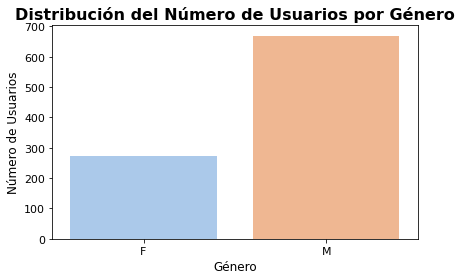

/tmp/ipykernel_186455/3763088214.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grupo de Edad', y='Número de Usuarios', data=age_counts, palette='muted')


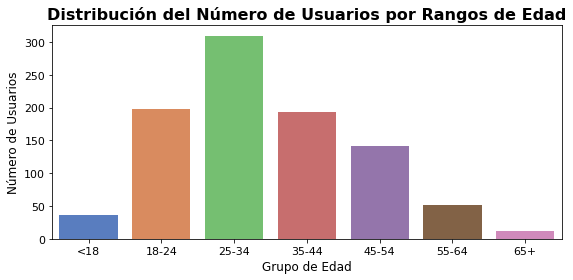

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combina ratings con usuarios
merged_df = pd.merge(ratings_df, users_df, on='UserID')

# ============================
# 1. DISTRIBUCIÓN POR GÉNERO
# ============================
gender_counts = merged_df[['UserID', 'Gender']].drop_duplicates().groupby('Gender')['UserID'].count().reset_index()
gender_counts.columns = ['Género', 'Número de Usuarios']

plt.figure(figsize=(6, 4))
sns.barplot(x='Género', y='Número de Usuarios', data=gender_counts, palette='pastel')
plt.title('Distribución del Número de Usuarios por Género', fontsize=16, fontweight='bold')
plt.ylabel('Número de Usuarios', fontsize=12)
plt.xlabel('Género', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# ============================
# 2. DISTRIBUCIÓN POR RANGOS DE EDAD
# ============================

# Define los rangos de edad
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
users_df['AgeGroup'] = pd.cut(users_df['Age'], bins=bins, labels=labels, right=False)

age_counts = users_df.groupby('AgeGroup')['UserID'].nunique().reset_index()
age_counts.columns = ['Grupo de Edad', 'Número de Usuarios']

plt.figure(figsize=(8, 4))
sns.barplot(x='Grupo de Edad', y='Número de Usuarios', data=age_counts, palette='muted')
plt.title('Distribución del Número de Usuarios por Rangos de Edad', fontsize=16, fontweight='bold')
plt.ylabel('Número de Usuarios', fontsize=12)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


/tmp/ipykernel_108159/1803037236.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Género', y='Número de Ratings', data=gender_counts, palette='pastel')


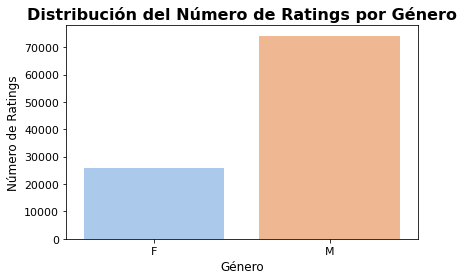

/tmp/ipykernel_108159/1803037236.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grupo de Edad', y='Número de Ratings', data=age_counts, palette='muted')


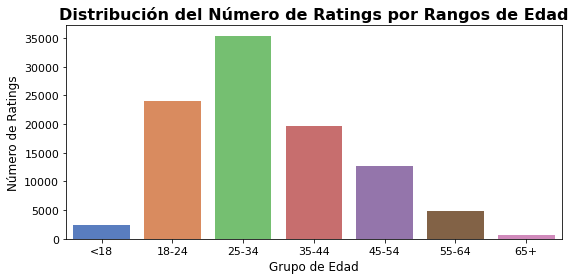

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combina ratings con usuarios
merged_df = pd.merge(ratings_df, users_df, on='UserID')

# ============================
# 1. DISTRIBUCIÓN POR GÉNERO
# ============================
gender_counts = merged_df.groupby('Gender')['Rating'].count().reset_index()
gender_counts.columns = ['Género', 'Número de Ratings']

plt.figure(figsize=(6, 4))
sns.barplot(x='Género', y='Número de Ratings', data=gender_counts, palette='pastel')
plt.title('Distribución del Número de Ratings por Género', fontsize=16, fontweight='bold')
plt.ylabel('Número de Ratings', fontsize=12)
plt.xlabel('Género', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# ============================
# 2. DISTRIBUCIÓN POR RANGOS DE EDAD
# ============================

# Define los rangos de edad
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=False)

age_counts = merged_df.groupby('AgeGroup')['Rating'].count().reset_index()
age_counts.columns = ['Grupo de Edad', 'Número de Ratings']

plt.figure(figsize=(8, 4))
sns.barplot(x='Grupo de Edad', y='Número de Ratings', data=age_counts, palette='muted')
plt.title('Distribución del Número de Ratings por Rangos de Edad', fontsize=16, fontweight='bold')
plt.ylabel('Número de Ratings', fontsize=12)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()



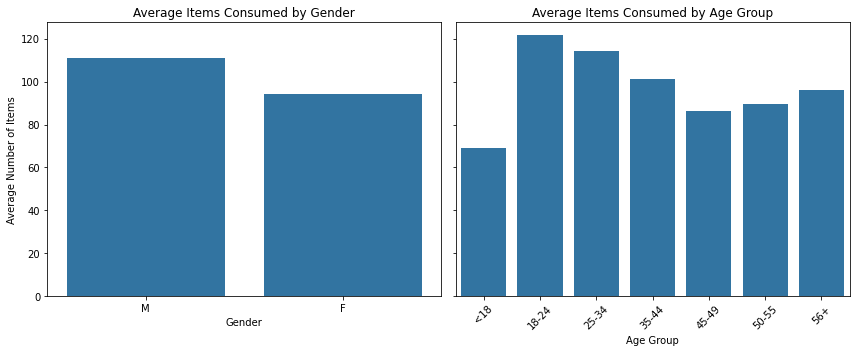

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unir ratings con datos de usuario
merged_df = pd.merge(ratings_df, users_df, on='UserID')

# Contar cuántos ítems consumió cada usuario
user_item_counts = merged_df.groupby('UserID')['MovieID'].count().reset_index(name='ItemsConsumed')

# Unir con info demográfica
user_item_counts = pd.merge(user_item_counts, users_df, on='UserID')

# Mapear edades a rangos de edad
age_bins = [0, 17, 24, 34, 44, 49, 55, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
user_item_counts['AgeGroup'] = pd.cut(user_item_counts['Age'], bins=age_bins, labels=age_labels, right=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Plot 1: Average items consumed by Gender ---
sns.barplot(
    data=user_item_counts,
    x='Gender',
    y='ItemsConsumed',
    estimator='mean',
    errorbar=None,
    ax=axes[0]
)
axes[0].set_title('Average Items Consumed by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Number of Items')

# --- Plot 2: Average items consumed by Age Group ---
sns.barplot(
    data=user_item_counts,
    x='AgeGroup',
    y='ItemsConsumed',
    estimator='mean',
    order=age_labels,
    errorbar=None,
    ax=axes[1]
)
axes[1].set_title('Average Items Consumed by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('')  # Oculta el segundo eje Y para limpieza
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




## <font color="blue"> 4.1 Demographic Bias

### <font color="blue"> 4.1.1 Data Splitting – 5-Fold Cross-Validation
    
 
<font color="blue"> PART 1    
    
Split all users into 5 folds.

For each fold:

Select the users in the test set.

For each test user, randomly select 5 of their ratings to form the test set.

All other ratings (from train users and the remaining ratings from test users) go into the train set.



In [2]:
from sklearn.model_selection import KFold
import numpy as np

# Number of folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Unique user IDs
user_ids = users_df['UserID'].unique()

# Store folds in a list of dictionaries
folds = []

for train_idx, test_idx in kf.split(user_ids):
    train_users = user_ids[train_idx]
    test_users = user_ids[test_idx]
    
    folds.append({
        'train_users': train_users,
        'test_users': test_users
    })


<font color="blue"> PART 2

In [3]:
def split_train_test_ratings(ratings_df, test_users, n_test_ratings=5):
    """Split ratings into train and test sets for a fold, selecting 5 ratings per test user."""
    test_ratings_list = []
    train_ratings_list = []
    
    for user in test_users:
        user_ratings = ratings_df[ratings_df['UserID'] == user]
        
        if len(user_ratings) < n_test_ratings:
            continue  # Skip users with too few ratings
        
        test_ratings = user_ratings.sample(n=n_test_ratings, random_state=42)
        train_ratings = user_ratings.drop(test_ratings.index)

        test_ratings_list.append(test_ratings)
        train_ratings_list.append(train_ratings)
    
    # All ratings from non-test users go into the train set
    non_test_ratings = ratings_df[~ratings_df['UserID'].isin(test_users)]
    
    # Combine everything
    train_df = pd.concat([non_test_ratings] + train_ratings_list)
    test_df = pd.concat(test_ratings_list)
    
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)


### <font color="blue"> 4.1.2 Implementing nDCG for MovieLens

In [4]:
def get_user_item_utility(test_ratings):
    """Creates a dictionary: {user_id: {item_id: rating}} from the test set."""
    utility = {}

    for _, row in test_ratings.iterrows():
        user = row['UserID']
        item = row['MovieID']
        rating = row['Rating']
        
        if user not in utility:
            utility[user] = {}
        utility[user][item] = rating
    
    return utility


In [5]:
import math

def dcg(recommended_items, user_utility):
    """Compute DCG based on the recommended list and ground-truth utility values."""
    dcg_value = 0.0
    for i, item in enumerate(recommended_items):
        rel = user_utility.get(item, 0)
        if i == 0:
            dcg_value += rel
        else:
            dcg_value += rel / math.log2(i + 1)
    return dcg_value

def ndcg(recommended_items, user_utility):
    """Compute nDCG for a given recommendation list and user's utility dictionary."""
    dcg_val = dcg(recommended_items, user_utility)
    # Ideal DCG: sort user's ground-truth items by rating
    ideal_items = sorted(user_utility.items(), key=lambda x: x[1], reverse=True)
    ideal_list = [item for item, _ in ideal_items]
    idcg_val = dcg(ideal_list, user_utility)
    
    if idcg_val == 0:
        return 0.0
    return dcg_val / idcg_val


### <font color="blue"> 4.1.3 Implementing Baseline Recommenders

🔹 <font color="blue"> 1 Popular Recommender (Pop)

In [6]:
def popular_recommender(train_ratings, top_k=10):
    """Recommends the most popular items globally based on rating count."""
    pop_scores = train_ratings['MovieID'].value_counts()
    return list(pop_scores.head(top_k).index)


In [7]:
def recommend_popular_to_all_users(train_ratings, users, top_k=10):
    top_items = popular_recommender(train_ratings, top_k)
    return {user: top_items for user in users}


🔹 <font color="blue"> 2 Mean Recommender

In [8]:
def mean_rating_recommender(train_ratings, top_k=10):
    mean_scores = train_ratings.groupby('MovieID')['Rating'].mean()
    top_items = mean_scores.sort_values(ascending=False).head(top_k).index.tolist()
    return top_items


In [9]:
def recommend_mean_to_all_users(train_ratings, users, top_k=10):
    top_items = mean_rating_recommender(train_ratings, top_k)
    return {user: top_items for user in users}


🔹 <font color="blue"> 3 User-Based Collaborative Filtering (user-user CF)

In [14]:
import numpy as np
from tqdm import tqdm

def train_user_user_cf(train_matrix, k=50):
    num_users, num_items = train_matrix.shape

    # Calcular medias por usuario
    user_means = np.array([
        np.nanmean(train_matrix[u]) if np.any(~np.isnan(train_matrix[u])) else 0
        for u in range(num_users)
    ])

    # Calcular matriz de similitud Pearson
    def pearson_similarity(u, v):
        common_items = ~np.isnan(train_matrix[u]) & ~np.isnan(train_matrix[v])
        if np.sum(common_items) == 0:
            return 0
        ru = train_matrix[u, common_items] - user_means[u]
        rv = train_matrix[v, common_items] - user_means[v]
        numerator = np.dot(ru, rv)
        denominator = np.sqrt(np.sum(ru ** 2)) * np.sqrt(np.sum(rv ** 2))
        return 0 if denominator == 0 else numerator / denominator

    similarity_matrix = np.zeros((num_users, num_users))
    for u in tqdm(range(num_users), desc="Computing similarities"):
        for v in range(num_users):
            if u != v:
                similarity_matrix[u, v] = pearson_similarity(u, v)

    return similarity_matrix, user_means

def generate_user_user_recommendations(train_matrix, similarity_matrix, user_means, k=50, top_k=10):
    num_users, num_items = train_matrix.shape
    recommendations = {}

    for u in tqdm(range(num_users), desc="Generating recommendations"):
        scores = np.zeros(num_items)
        for j in range(num_items):
            if not np.isnan(train_matrix[u, j]):
                continue

            neighbors = [v for v in range(num_users) if not np.isnan(train_matrix[v, j]) and v != u]
            sims = [(v, similarity_matrix[u, v]) for v in neighbors]
            sims.sort(key=lambda x: abs(x[1]), reverse=True)
            sims = sims[:k]

            numerator = sum(sim * (train_matrix[v, j] - user_means[v]) for v, sim in sims)
            denominator = sum(abs(sim) for _, sim in sims)

            scores[j] = user_means[u] if denominator == 0 else user_means[u] + numerator / denominator

        top_items = np.argsort(scores)[-top_k:][::-1]
        recommendations[u] = top_items.tolist()

    return recommendations



🔹 <font color="blue"> 4 Item-Based Collaborative Filtering (item-item CF)

In [16]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def train_item_item_cf(train_matrix, k=20):
    """
    Precompute item-item similarity matrix and item means for Item-based CF.
    """
    num_users, num_items = train_matrix.shape
    item_means = np.array([
        np.nanmean(train_matrix[:, j]) if np.any(~np.isnan(train_matrix[:, j])) else 0
        for j in range(num_items)
    ])
    
    # Replace NaN with 0 for cosine similarity
    train_filled = np.nan_to_num(train_matrix)
    similarity_matrix = cosine_similarity(train_filled.T)

    return similarity_matrix, item_means

def generate_item_item_recommendations(train_matrix, similarity_matrix, item_means, k=20, top_k=10):
    """
    Generate top-k recommendations for all users using Item-based CF.
    """
    num_users, num_items = train_matrix.shape
    recommendations = {}

    for u in range(num_users):
        user_ratings = train_matrix[u]
        known_items = np.where(~np.isnan(user_ratings))[0]
        unknown_items = np.where(np.isnan(user_ratings))[0]

        scores = {}
        for j in unknown_items:
            neighbors = [i for i in known_items if i != j]
            if not neighbors:
                score = item_means[j]
            else:
                sims = [(i, similarity_matrix[j, i]) for i in neighbors]
                sims.sort(key=lambda x: abs(x[1]), reverse=True)
                sims = sims[:k]

                numerator = sum(sim * (train_matrix[u, i] - item_means[i]) for i, sim in sims)
                denominator = sum(abs(sim) for _, sim in sims)
                score = item_means[j] if denominator == 0 else item_means[j] + numerator / denominator
            scores[j] = score

        top_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_k]
        recommendations[u] = [j for j, _ in top_items]

    return recommendations


In [17]:
def evaluate_models_on_folds(folds, top_k=10):
    results = []

    for i, (train_df, test_df) in enumerate(folds):
        print(f"\n🔁 Fold {i+1} ----------------")

        users = train_df['UserID'].unique()
        all_users = np.sort(users)
        
        train_matrix = train_df.pivot(index='UserID', columns='MovieID', values='Rating')
        train_matrix = train_matrix.reindex(index=all_users)
        R_train = train_matrix.to_numpy()

        # Ground truth (relevance dictionary) from test
        user_utilities = get_user_item_utility(test_df)

        # Recommenders
        fold_results = {'Fold': i + 1}

        ### 1. Mean Recommender
        mean_recs = recommend_mean_to_all_users(train_df, all_users, top_k)
        ndcgs = [ndcg(mean_recs[u], user_utilities.get(u, {})) for u in mean_recs]
        fold_results['Mean'] = np.mean(ndcgs)

        ### 2. User-User CF
        sim, means = train_user_user_cf(R_train, k=50)
        user_user_recs = generate_user_user_recommendations(R_train, sim, means, k=50, top_k=top_k)
        ndcgs = [ndcg(user_user_recs[u], user_utilities.get(u, {})) for u in user_user_recs]
        fold_results['User-CF'] = np.mean(ndcgs)

        ### 3. Item-Item CF
        sim, means = train_item_item_cf(R_train, k=20)
        item_item_recs = generate_item_item_recommendations(R_train, sim, means, k=20, top_k=top_k)
        ndcgs = [ndcg(item_item_recs[u], user_utilities.get(u, {})) for u in item_item_recs]
        fold_results['Item-CF'] = np.mean(ndcgs)

        ### 4. Popular Recommender
        popular_recs = recommend_popular_to_all_users(train_df, all_users, top_k)
        ndcgs = [ndcg(popular_recs[u], user_utilities.get(u, {})) for u in popular_recs]
        fold_results['Popular'] = np.mean(ndcgs)

        results.append(fold_results)

    return pd.DataFrame(results)


In [20]:
# ratings_df: dataframe original con columnas ['UserID', 'MovieID', 'Rating']
# folds: lista de diccionarios, ej: folds[0] = {'train_users': [...], 'test_users': [...]}

folds_correctos = []
for fold in folds:
    train_users = fold['train_users']
    test_users = fold['test_users']
    
    train_df = ratings_df[ratings_df['UserID'].isin(train_users)].copy()
    test_df = ratings_df[ratings_df['UserID'].isin(test_users)].copy()
    
    folds_correctos.append((train_df, test_df))

# Ahora sí, evaluamos con la función que definiste
results_df = evaluate_models_on_folds(folds_correctos, top_k=10)

print(results_df)




🔁 Fold 1 ----------------


Generating recommendations: 100%|██████████| 754/754 [20:27<00:00,  1.63s/it]



🔁 Fold 2 ----------------


Generating recommendations: 100%|██████████| 754/754 [20:49<00:00,  1.66s/it]



🔁 Fold 3 ----------------


Generating recommendations: 100%|██████████| 754/754 [20:42<00:00,  1.65s/it]



🔁 Fold 4 ----------------


Generating recommendations: 100%|██████████| 755/755 [20:34<00:00,  1.64s/it]



🔁 Fold 5 ----------------


Generating recommendations: 100%|██████████| 755/755 [20:41<00:00,  1.64s/it]


   Fold  Mean   User-CF   Item-CF  Popular
0     1   0.0  0.000379  0.000476      0.0
1     2   0.0  0.000181  0.000380      0.0
2     3   0.0  0.000198  0.000134      0.0
3     4   0.0  0.000598  0.001434      0.0
4     5   0.0  0.000518  0.000462      0.0
